In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import sys
sys.path.append('/content/drive/MyDrive/stat940project')

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
%reload_ext autoreload

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
from torch.utils.data import DataLoader, Dataset
import os
import numpy as np
import random
import math
import torch.optim as optim
from tqdm.auto import tqdm, trange

In [6]:
from dataset import load_data, ModelNet40Dataset
from utils.augmentations import *
from utils.utils import run, set_seed
from models import Pointnet, DGCNN

In [7]:
set_seed(1)

In [8]:
parent_dir = '/content/drive/MyDrive/stat940project'
checkpoint_path = os.path.join(parent_dir, 'checkpoints/pointnet')

if not os.path.exists(checkpoint_path):
    os.mkdir(checkpoint_path)

data_path = os.path.join(parent_dir, 'data/ModelNet40')

In [9]:
train_X, train_y = load_data(data_path)
test_X, test_y = load_data(data_path, mode='test')

In [10]:
default_transforms = transforms.Compose(
    [
        Normalize(),
        ToTensor()]
)

train_transforms = transforms.Compose(
    [
        Normalize(),
        RandomNoise(),
        RandomRotate(),
        ToTensor()]
)

In [11]:
trainset = ModelNet40Dataset(train_X, train_y, transforms=train_transforms)
testset = ModelNet40Dataset(test_X, test_y, transforms=default_transforms)

trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
testloader = DataLoader(testset, batch_size=32, shuffle=True)

In [12]:
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('running on GPU')

else:
    device = torch.device('cpu')
    print('running on CPU')

running on GPU


In [13]:
model = Pointnet(device=device).to(device)
n_epochs = 200
print(device)
train_hist, test_hist = run(model, n_epochs, device, trainloader, testloader, model_name="pointnet", checkpoint_path=checkpoint_path)

cuda:0


Epochs:   0%|          | 0/201 [00:00<?, ?it/s]


Epoch 0:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 3.55961
    Train [1248/9843]	 | 	Loss: 3.04950
    Train [1888/9843]	 | 	Loss: 2.55934
    Train [2528/9843]	 | 	Loss: 2.47489
    Train [3168/9843]	 | 	Loss: 2.51616
    Train [3808/9843]	 | 	Loss: 2.62624
    Train [4448/9843]	 | 	Loss: 2.30716
    Train [5088/9843]	 | 	Loss: 2.03215
    Train [5728/9843]	 | 	Loss: 2.03001
    Train [6368/9843]	 | 	Loss: 2.49034
    Train [7008/9843]	 | 	Loss: 2.35449
    Train [7648/9843]	 | 	Loss: 1.87093
    Train [8288/9843]	 | 	Loss: 2.24556
    Train [8928/9843]	 | 	Loss: 2.29455
    Train [9568/9843]	 | 	Loss: 2.37115
==> Train | Average loss: 2.6946
==> Test  | Average loss: 2.5238
==> Test  | Accuracy: 30.1053
Best epoch: 0
Best accuracy: 30.105348460291737

Epoch 1:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.86075
    Train [1248/9843]	 | 	Loss: 2.14302
    Train [1888/9843]	 | 	Loss: 2.16302
    Train [2528/9843]	 | 	Loss: 2.01480
    Train [3168/9843]	 | 	Loss: 2.05926
    Train [3808/9843]	 | 	Loss: 1.76090
    Train [4448/9843]	 | 	Loss: 1.83357
    Train [5088/9843]	 | 	Loss: 1.85539
    Train [5728/9843]	 | 	Loss: 2.12780
    Train [6368/9843]	 | 	Loss: 2.17396
    Train [7008/9843]	 | 	Loss: 1.75451
    Train [7648/9843]	 | 	Loss: 1.86845
    Train [8288/9843]	 | 	Loss: 2.03702
    Train [8928/9843]	 | 	Loss: 1.73997
    Train [9568/9843]	 | 	Loss: 1.91588
==> Train | Average loss: 1.9657
==> Test  | Average loss: 1.9508
==> Test  | Accuracy: 40.9643
Best epoch: 1
Best accuracy: 40.9643435980551

Epoch 2:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.71938
    Train [1248/9843]	 | 	Loss: 1.33533
    Train [1888/9843]	 | 	Loss: 1.69243
    Train [2528/9843]	 | 	Loss: 1.93408
    Train [3168/9843]	 | 	Loss: 1.77944
    Train [3808/9843]	 | 	Loss: 1.65672
    Train [4448/9843]	 | 	Loss: 2.11738
    Train [5088/9843]	 | 	Loss: 1.60941
    Train [5728/9843]	 | 	Loss: 1.48860
    Train [6368/9843]	 | 	Loss: 1.52167
    Train [7008/9843]	 | 	Loss: 1.99593
    Train [7648/9843]	 | 	Loss: 1.50943
    Train [8288/9843]	 | 	Loss: 1.97500
    Train [8928/9843]	 | 	Loss: 1.40449
    Train [9568/9843]	 | 	Loss: 1.47125
==> Train | Average loss: 1.6733
==> Test  | Average loss: 1.7182
==> Test  | Accuracy: 48.1767
Best epoch: 2
Best accuracy: 48.176661264181526

Epoch 3:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.41317
    Train [1248/9843]	 | 	Loss: 1.73543
    Train [1888/9843]	 | 	Loss: 1.80932
    Train [2528/9843]	 | 	Loss: 1.08536
    Train [3168/9843]	 | 	Loss: 1.93287
    Train [3808/9843]	 | 	Loss: 1.75521
    Train [4448/9843]	 | 	Loss: 1.50836
    Train [5088/9843]	 | 	Loss: 1.58339
    Train [5728/9843]	 | 	Loss: 1.79415
    Train [6368/9843]	 | 	Loss: 1.86986
    Train [7008/9843]	 | 	Loss: 1.66062
    Train [7648/9843]	 | 	Loss: 1.61896
    Train [8288/9843]	 | 	Loss: 1.56970
    Train [8928/9843]	 | 	Loss: 1.53866
    Train [9568/9843]	 | 	Loss: 1.26179
==> Train | Average loss: 1.6106
==> Test  | Average loss: 1.5328
==> Test  | Accuracy: 52.9984
Best epoch: 3
Best accuracy: 52.99837925445705

Epoch 4:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.23797
    Train [1248/9843]	 | 	Loss: 1.22984
    Train [1888/9843]	 | 	Loss: 1.35148
    Train [2528/9843]	 | 	Loss: 1.33895
    Train [3168/9843]	 | 	Loss: 2.49041
    Train [3808/9843]	 | 	Loss: 1.31851
    Train [4448/9843]	 | 	Loss: 1.62925
    Train [5088/9843]	 | 	Loss: 1.71594
    Train [5728/9843]	 | 	Loss: 1.39117
    Train [6368/9843]	 | 	Loss: 1.33727
    Train [7008/9843]	 | 	Loss: 1.29351
    Train [7648/9843]	 | 	Loss: 1.95135
    Train [8288/9843]	 | 	Loss: 1.17597
    Train [8928/9843]	 | 	Loss: 1.43793
    Train [9568/9843]	 | 	Loss: 1.63745
==> Train | Average loss: 1.4136
==> Test  | Average loss: 2.0040
==> Test  | Accuracy: 41.5721
Best epoch: 3
Best accuracy: 52.99837925445705

Epoch 5:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.51580
    Train [1248/9843]	 | 	Loss: 1.26069
    Train [1888/9843]	 | 	Loss: 1.13753
    Train [2528/9843]	 | 	Loss: 1.36145
    Train [3168/9843]	 | 	Loss: 1.62215
    Train [3808/9843]	 | 	Loss: 1.46857
    Train [4448/9843]	 | 	Loss: 1.43109
    Train [5088/9843]	 | 	Loss: 1.46492
    Train [5728/9843]	 | 	Loss: 1.57636
    Train [6368/9843]	 | 	Loss: 1.30223
    Train [7008/9843]	 | 	Loss: 1.42169
    Train [7648/9843]	 | 	Loss: 0.99940
    Train [8288/9843]	 | 	Loss: 1.32619
    Train [8928/9843]	 | 	Loss: 1.28880
    Train [9568/9843]	 | 	Loss: 1.01632
==> Train | Average loss: 1.3624
==> Test  | Average loss: 1.3173
==> Test  | Accuracy: 56.5235
Best epoch: 5
Best accuracy: 56.523500810372774

Epoch 6:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.41177
    Train [1248/9843]	 | 	Loss: 1.72069
    Train [1888/9843]	 | 	Loss: 0.90863
    Train [2528/9843]	 | 	Loss: 1.34274
    Train [3168/9843]	 | 	Loss: 1.27485
    Train [3808/9843]	 | 	Loss: 1.56149
    Train [4448/9843]	 | 	Loss: 1.23832
    Train [5088/9843]	 | 	Loss: 0.87270
    Train [5728/9843]	 | 	Loss: 1.07294
    Train [6368/9843]	 | 	Loss: 1.30313
    Train [7008/9843]	 | 	Loss: 1.52899
    Train [7648/9843]	 | 	Loss: 1.25941
    Train [8288/9843]	 | 	Loss: 1.13860
    Train [8928/9843]	 | 	Loss: 1.45873
    Train [9568/9843]	 | 	Loss: 1.23780
==> Train | Average loss: 1.2610
==> Test  | Average loss: 1.1633
==> Test  | Accuracy: 63.0875
Best epoch: 6
Best accuracy: 63.087520259319284

Epoch 7:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.23134
    Train [1248/9843]	 | 	Loss: 1.06119
    Train [1888/9843]	 | 	Loss: 1.06908
    Train [2528/9843]	 | 	Loss: 0.95945
    Train [3168/9843]	 | 	Loss: 0.99960
    Train [3808/9843]	 | 	Loss: 1.13313
    Train [4448/9843]	 | 	Loss: 1.29497
    Train [5088/9843]	 | 	Loss: 1.25979
    Train [5728/9843]	 | 	Loss: 1.01530
    Train [6368/9843]	 | 	Loss: 0.80103
    Train [7008/9843]	 | 	Loss: 0.82654
    Train [7648/9843]	 | 	Loss: 1.16712
    Train [8288/9843]	 | 	Loss: 1.52730
    Train [8928/9843]	 | 	Loss: 1.25285
    Train [9568/9843]	 | 	Loss: 1.24019
==> Train | Average loss: 1.2199
==> Test  | Average loss: 1.4548
==> Test  | Accuracy: 55.6321
Best epoch: 6
Best accuracy: 63.087520259319284

Epoch 8:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.85425
    Train [1248/9843]	 | 	Loss: 0.94848
    Train [1888/9843]	 | 	Loss: 1.32182
    Train [2528/9843]	 | 	Loss: 0.87977
    Train [3168/9843]	 | 	Loss: 1.17350
    Train [3808/9843]	 | 	Loss: 0.89097
    Train [4448/9843]	 | 	Loss: 1.40780
    Train [5088/9843]	 | 	Loss: 1.76271
    Train [5728/9843]	 | 	Loss: 0.75696
    Train [6368/9843]	 | 	Loss: 1.41279
    Train [7008/9843]	 | 	Loss: 1.08492
    Train [7648/9843]	 | 	Loss: 1.07710
    Train [8288/9843]	 | 	Loss: 0.82914
    Train [8928/9843]	 | 	Loss: 1.29422
    Train [9568/9843]	 | 	Loss: 1.06409
==> Train | Average loss: 1.1805
==> Test  | Average loss: 1.1563
==> Test  | Accuracy: 64.9514
Best epoch: 8
Best accuracy: 64.9513776337115

Epoch 9:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.37823
    Train [1248/9843]	 | 	Loss: 0.53717
    Train [1888/9843]	 | 	Loss: 0.66456
    Train [2528/9843]	 | 	Loss: 2.21225
    Train [3168/9843]	 | 	Loss: 1.01284
    Train [3808/9843]	 | 	Loss: 1.25629
    Train [4448/9843]	 | 	Loss: 1.33911
    Train [5088/9843]	 | 	Loss: 1.14529
    Train [5728/9843]	 | 	Loss: 0.88029
    Train [6368/9843]	 | 	Loss: 0.88027
    Train [7008/9843]	 | 	Loss: 1.08441
    Train [7648/9843]	 | 	Loss: 1.33181
    Train [8288/9843]	 | 	Loss: 1.06925
    Train [8928/9843]	 | 	Loss: 1.01395
    Train [9568/9843]	 | 	Loss: 1.16894
==> Train | Average loss: 1.1222
==> Test  | Average loss: 1.3688
==> Test  | Accuracy: 58.7115
Best epoch: 8
Best accuracy: 64.9513776337115

Epoch 10:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.86330
    Train [1248/9843]	 | 	Loss: 1.55339
    Train [1888/9843]	 | 	Loss: 1.09467
    Train [2528/9843]	 | 	Loss: 1.18909
    Train [3168/9843]	 | 	Loss: 1.23340
    Train [3808/9843]	 | 	Loss: 1.27836
    Train [4448/9843]	 | 	Loss: 1.14969
    Train [5088/9843]	 | 	Loss: 1.27405
    Train [5728/9843]	 | 	Loss: 1.35309
    Train [6368/9843]	 | 	Loss: 1.49243
    Train [7008/9843]	 | 	Loss: 0.97279
    Train [7648/9843]	 | 	Loss: 1.21510
    Train [8288/9843]	 | 	Loss: 0.98708
    Train [8928/9843]	 | 	Loss: 1.08140
    Train [9568/9843]	 | 	Loss: 1.10753
==> Train | Average loss: 1.1895
==> Test  | Average loss: 1.2387
==> Test  | Accuracy: 63.8169
Best epoch: 8
Best accuracy: 64.9513776337115

Epoch 11:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.07766
    Train [1248/9843]	 | 	Loss: 1.51849
    Train [1888/9843]	 | 	Loss: 0.83214
    Train [2528/9843]	 | 	Loss: 1.51385
    Train [3168/9843]	 | 	Loss: 1.34215
    Train [3808/9843]	 | 	Loss: 0.73933
    Train [4448/9843]	 | 	Loss: 0.79564
    Train [5088/9843]	 | 	Loss: 1.00476
    Train [5728/9843]	 | 	Loss: 1.07240
    Train [6368/9843]	 | 	Loss: 1.00324
    Train [7008/9843]	 | 	Loss: 0.91749
    Train [7648/9843]	 | 	Loss: 1.17541
    Train [8288/9843]	 | 	Loss: 0.57914
    Train [8928/9843]	 | 	Loss: 1.17308
    Train [9568/9843]	 | 	Loss: 0.86380
==> Train | Average loss: 1.0636
==> Test  | Average loss: 1.1585
==> Test  | Accuracy: 62.1556
Best epoch: 8
Best accuracy: 64.9513776337115

Epoch 12:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.04639
    Train [1248/9843]	 | 	Loss: 1.19677
    Train [1888/9843]	 | 	Loss: 0.66183
    Train [2528/9843]	 | 	Loss: 1.09633
    Train [3168/9843]	 | 	Loss: 0.92436
    Train [3808/9843]	 | 	Loss: 1.04267
    Train [4448/9843]	 | 	Loss: 0.74337
    Train [5088/9843]	 | 	Loss: 0.90106
    Train [5728/9843]	 | 	Loss: 0.82400
    Train [6368/9843]	 | 	Loss: 1.00671
    Train [7008/9843]	 | 	Loss: 1.35168
    Train [7648/9843]	 | 	Loss: 0.89268
    Train [8288/9843]	 | 	Loss: 0.90428
    Train [8928/9843]	 | 	Loss: 0.88714
    Train [9568/9843]	 | 	Loss: 1.00546
==> Train | Average loss: 1.0192
==> Test  | Average loss: 0.9815
==> Test  | Accuracy: 70.7050
Best epoch: 12
Best accuracy: 70.70502431118314

Epoch 13:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.28702
    Train [1248/9843]	 | 	Loss: 1.46625
    Train [1888/9843]	 | 	Loss: 0.78859
    Train [2528/9843]	 | 	Loss: 0.76843
    Train [3168/9843]	 | 	Loss: 1.19543
    Train [3808/9843]	 | 	Loss: 1.26634
    Train [4448/9843]	 | 	Loss: 1.08256
    Train [5088/9843]	 | 	Loss: 0.95193
    Train [5728/9843]	 | 	Loss: 0.72074
    Train [6368/9843]	 | 	Loss: 0.98338
    Train [7008/9843]	 | 	Loss: 1.14777
    Train [7648/9843]	 | 	Loss: 1.15171
    Train [8288/9843]	 | 	Loss: 1.12296
    Train [8928/9843]	 | 	Loss: 0.81725
    Train [9568/9843]	 | 	Loss: 0.52314
==> Train | Average loss: 1.0145
==> Test  | Average loss: 1.0880
==> Test  | Accuracy: 66.7342
Best epoch: 12
Best accuracy: 70.70502431118314

Epoch 14:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.84367
    Train [1248/9843]	 | 	Loss: 0.95534
    Train [1888/9843]	 | 	Loss: 0.82115
    Train [2528/9843]	 | 	Loss: 0.58238
    Train [3168/9843]	 | 	Loss: 0.94233
    Train [3808/9843]	 | 	Loss: 1.20123
    Train [4448/9843]	 | 	Loss: 0.95190
    Train [5088/9843]	 | 	Loss: 0.89550
    Train [5728/9843]	 | 	Loss: 0.86664
    Train [6368/9843]	 | 	Loss: 0.79100
    Train [7008/9843]	 | 	Loss: 1.19523
    Train [7648/9843]	 | 	Loss: 1.07767
    Train [8288/9843]	 | 	Loss: 1.27493
    Train [8928/9843]	 | 	Loss: 1.19055
    Train [9568/9843]	 | 	Loss: 0.90705
==> Train | Average loss: 0.9978
==> Test  | Average loss: 1.5453
==> Test  | Accuracy: 57.6580
Best epoch: 12
Best accuracy: 70.70502431118314

Epoch 15:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.78940
    Train [1248/9843]	 | 	Loss: 0.97200
    Train [1888/9843]	 | 	Loss: 1.14346
    Train [2528/9843]	 | 	Loss: 1.35181
    Train [3168/9843]	 | 	Loss: 0.97992
    Train [3808/9843]	 | 	Loss: 0.96670
    Train [4448/9843]	 | 	Loss: 1.20423
    Train [5088/9843]	 | 	Loss: 1.22426
    Train [5728/9843]	 | 	Loss: 1.48134
    Train [6368/9843]	 | 	Loss: 0.99390
    Train [7008/9843]	 | 	Loss: 0.60111
    Train [7648/9843]	 | 	Loss: 1.19263
    Train [8288/9843]	 | 	Loss: 0.80062
    Train [8928/9843]	 | 	Loss: 1.16162
    Train [9568/9843]	 | 	Loss: 0.79715
==> Train | Average loss: 1.0196
==> Test  | Average loss: 1.1170
==> Test  | Accuracy: 65.5186
Best epoch: 12
Best accuracy: 70.70502431118314

Epoch 16:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.93169
    Train [1248/9843]	 | 	Loss: 0.84155
    Train [1888/9843]	 | 	Loss: 1.03327
    Train [2528/9843]	 | 	Loss: 0.91501
    Train [3168/9843]	 | 	Loss: 1.19842
    Train [3808/9843]	 | 	Loss: 0.95554
    Train [4448/9843]	 | 	Loss: 0.70979
    Train [5088/9843]	 | 	Loss: 1.20294
    Train [5728/9843]	 | 	Loss: 0.95618
    Train [6368/9843]	 | 	Loss: 1.02364
    Train [7008/9843]	 | 	Loss: 0.63723
    Train [7648/9843]	 | 	Loss: 0.39594
    Train [8288/9843]	 | 	Loss: 0.90540
    Train [8928/9843]	 | 	Loss: 0.72570
    Train [9568/9843]	 | 	Loss: 1.12810
==> Train | Average loss: 0.9771
==> Test  | Average loss: 0.9750
==> Test  | Accuracy: 70.7050
Best epoch: 16
Best accuracy: 70.70502431118314

Epoch 17:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.89079
    Train [1248/9843]	 | 	Loss: 0.39080
    Train [1888/9843]	 | 	Loss: 0.94693
    Train [2528/9843]	 | 	Loss: 1.22752
    Train [3168/9843]	 | 	Loss: 0.91294
    Train [3808/9843]	 | 	Loss: 0.87212
    Train [4448/9843]	 | 	Loss: 1.08900
    Train [5088/9843]	 | 	Loss: 1.01028
    Train [5728/9843]	 | 	Loss: 0.80331
    Train [6368/9843]	 | 	Loss: 1.53102
    Train [7008/9843]	 | 	Loss: 0.61799
    Train [7648/9843]	 | 	Loss: 0.42100
    Train [8288/9843]	 | 	Loss: 0.60516
    Train [8928/9843]	 | 	Loss: 0.71454
    Train [9568/9843]	 | 	Loss: 0.95198
==> Train | Average loss: 0.9322
==> Test  | Average loss: 0.8710
==> Test  | Accuracy: 73.1767
Best epoch: 17
Best accuracy: 73.17666126418152

Epoch 18:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.32236
    Train [1248/9843]	 | 	Loss: 1.13707
    Train [1888/9843]	 | 	Loss: 1.03517
    Train [2528/9843]	 | 	Loss: 0.86072
    Train [3168/9843]	 | 	Loss: 1.19871
    Train [3808/9843]	 | 	Loss: 0.64742
    Train [4448/9843]	 | 	Loss: 0.38809
    Train [5088/9843]	 | 	Loss: 1.02394
    Train [5728/9843]	 | 	Loss: 0.83566
    Train [6368/9843]	 | 	Loss: 1.57615
    Train [7008/9843]	 | 	Loss: 1.17066
    Train [7648/9843]	 | 	Loss: 1.09758
    Train [8288/9843]	 | 	Loss: 0.71158
    Train [8928/9843]	 | 	Loss: 1.32679
    Train [9568/9843]	 | 	Loss: 1.16908
==> Train | Average loss: 0.9485
==> Test  | Average loss: 1.1854
==> Test  | Accuracy: 63.4117
Best epoch: 17
Best accuracy: 73.17666126418152

Epoch 19:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.74467
    Train [1248/9843]	 | 	Loss: 0.74591
    Train [1888/9843]	 | 	Loss: 0.84373
    Train [2528/9843]	 | 	Loss: 0.71985
    Train [3168/9843]	 | 	Loss: 1.02702
    Train [3808/9843]	 | 	Loss: 0.97468
    Train [4448/9843]	 | 	Loss: 0.65055
    Train [5088/9843]	 | 	Loss: 0.93379
    Train [5728/9843]	 | 	Loss: 1.04064
    Train [6368/9843]	 | 	Loss: 0.90070
    Train [7008/9843]	 | 	Loss: 0.59176
    Train [7648/9843]	 | 	Loss: 1.00473
    Train [8288/9843]	 | 	Loss: 0.76841
    Train [8928/9843]	 | 	Loss: 0.79709
    Train [9568/9843]	 | 	Loss: 3.01738
==> Train | Average loss: 0.8984
==> Test  | Average loss: 1.1621
==> Test  | Accuracy: 66.0454
Best epoch: 17
Best accuracy: 73.17666126418152

Epoch 20:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.04183
    Train [1248/9843]	 | 	Loss: 1.23894
    Train [1888/9843]	 | 	Loss: 0.97741
    Train [2528/9843]	 | 	Loss: 0.93772
    Train [3168/9843]	 | 	Loss: 1.11818
    Train [3808/9843]	 | 	Loss: 0.78866
    Train [4448/9843]	 | 	Loss: 0.95975
    Train [5088/9843]	 | 	Loss: 0.70125
    Train [5728/9843]	 | 	Loss: 0.59949
    Train [6368/9843]	 | 	Loss: 0.55406
    Train [7008/9843]	 | 	Loss: 0.75888
    Train [7648/9843]	 | 	Loss: 0.71853
    Train [8288/9843]	 | 	Loss: 0.88344
    Train [8928/9843]	 | 	Loss: 1.33138
    Train [9568/9843]	 | 	Loss: 0.98236
==> Train | Average loss: 0.9151
==> Test  | Average loss: 0.8271
==> Test  | Accuracy: 75.4052
Best epoch: 20
Best accuracy: 75.40518638573744

Epoch 21:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.59049
    Train [1248/9843]	 | 	Loss: 0.72013
    Train [1888/9843]	 | 	Loss: 0.74392
    Train [2528/9843]	 | 	Loss: 0.42097
    Train [3168/9843]	 | 	Loss: 1.26998
    Train [3808/9843]	 | 	Loss: 0.88574
    Train [4448/9843]	 | 	Loss: 0.55974
    Train [5088/9843]	 | 	Loss: 0.55171
    Train [5728/9843]	 | 	Loss: 0.94793
    Train [6368/9843]	 | 	Loss: 0.81674
    Train [7008/9843]	 | 	Loss: 0.75897
    Train [7648/9843]	 | 	Loss: 0.94024
    Train [8288/9843]	 | 	Loss: 1.01778
    Train [8928/9843]	 | 	Loss: 0.94448
    Train [9568/9843]	 | 	Loss: 0.76490
==> Train | Average loss: 0.8194
==> Test  | Average loss: 0.7845
==> Test  | Accuracy: 75.1621
Best epoch: 20
Best accuracy: 75.40518638573744

Epoch 22:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.68265
    Train [1248/9843]	 | 	Loss: 0.74040
    Train [1888/9843]	 | 	Loss: 0.81038
    Train [2528/9843]	 | 	Loss: 0.66924
    Train [3168/9843]	 | 	Loss: 0.54353
    Train [3808/9843]	 | 	Loss: 0.65732
    Train [4448/9843]	 | 	Loss: 0.79585
    Train [5088/9843]	 | 	Loss: 0.71009
    Train [5728/9843]	 | 	Loss: 0.90099
    Train [6368/9843]	 | 	Loss: 0.89580
    Train [7008/9843]	 | 	Loss: 1.00651
    Train [7648/9843]	 | 	Loss: 0.76696
    Train [8288/9843]	 | 	Loss: 0.67259
    Train [8928/9843]	 | 	Loss: 1.07100
    Train [9568/9843]	 | 	Loss: 0.84730
==> Train | Average loss: 0.7901
==> Test  | Average loss: 0.7955
==> Test  | Accuracy: 75.4052
Best epoch: 22
Best accuracy: 75.40518638573744

Epoch 23:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.70328
    Train [1248/9843]	 | 	Loss: 0.80157
    Train [1888/9843]	 | 	Loss: 0.68472
    Train [2528/9843]	 | 	Loss: 0.57728
    Train [3168/9843]	 | 	Loss: 0.64737
    Train [3808/9843]	 | 	Loss: 0.64092
    Train [4448/9843]	 | 	Loss: 0.48197
    Train [5088/9843]	 | 	Loss: 0.70053
    Train [5728/9843]	 | 	Loss: 0.88074
    Train [6368/9843]	 | 	Loss: 0.71408
    Train [7008/9843]	 | 	Loss: 1.14003
    Train [7648/9843]	 | 	Loss: 0.53719
    Train [8288/9843]	 | 	Loss: 0.79500
    Train [8928/9843]	 | 	Loss: 1.16211
    Train [9568/9843]	 | 	Loss: 0.87178
==> Train | Average loss: 0.7847
==> Test  | Average loss: 0.8076
==> Test  | Accuracy: 74.7974
Best epoch: 22
Best accuracy: 75.40518638573744

Epoch 24:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.71954
    Train [1248/9843]	 | 	Loss: 0.92719
    Train [1888/9843]	 | 	Loss: 0.68865
    Train [2528/9843]	 | 	Loss: 0.73675
    Train [3168/9843]	 | 	Loss: 0.95099
    Train [3808/9843]	 | 	Loss: 1.03821
    Train [4448/9843]	 | 	Loss: 0.44046
    Train [5088/9843]	 | 	Loss: 0.91531
    Train [5728/9843]	 | 	Loss: 0.79852
    Train [6368/9843]	 | 	Loss: 0.75797
    Train [7008/9843]	 | 	Loss: 0.36234
    Train [7648/9843]	 | 	Loss: 0.54948
    Train [8288/9843]	 | 	Loss: 1.02349
    Train [8928/9843]	 | 	Loss: 0.87315
    Train [9568/9843]	 | 	Loss: 1.42360
==> Train | Average loss: 0.7646
==> Test  | Average loss: 0.8517
==> Test  | Accuracy: 73.8655
Best epoch: 22
Best accuracy: 75.40518638573744

Epoch 25:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.79379
    Train [1248/9843]	 | 	Loss: 0.69833
    Train [1888/9843]	 | 	Loss: 0.83989
    Train [2528/9843]	 | 	Loss: 0.64910
    Train [3168/9843]	 | 	Loss: 0.48509
    Train [3808/9843]	 | 	Loss: 0.79520
    Train [4448/9843]	 | 	Loss: 0.83255
    Train [5088/9843]	 | 	Loss: 0.83424
    Train [5728/9843]	 | 	Loss: 0.63442
    Train [6368/9843]	 | 	Loss: 0.58704
    Train [7008/9843]	 | 	Loss: 0.96736
    Train [7648/9843]	 | 	Loss: 0.68784
    Train [8288/9843]	 | 	Loss: 0.69746
    Train [8928/9843]	 | 	Loss: 0.44557
    Train [9568/9843]	 | 	Loss: 0.50012
==> Train | Average loss: 0.7451
==> Test  | Average loss: 0.7839
==> Test  | Accuracy: 76.4587
Best epoch: 25
Best accuracy: 76.45867098865479

Epoch 26:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.78793
    Train [1248/9843]	 | 	Loss: 0.51750
    Train [1888/9843]	 | 	Loss: 0.99556
    Train [2528/9843]	 | 	Loss: 0.99184
    Train [3168/9843]	 | 	Loss: 0.95169
    Train [3808/9843]	 | 	Loss: 0.67701
    Train [4448/9843]	 | 	Loss: 0.76520
    Train [5088/9843]	 | 	Loss: 0.60977
    Train [5728/9843]	 | 	Loss: 0.80643
    Train [6368/9843]	 | 	Loss: 0.85825
    Train [7008/9843]	 | 	Loss: 0.79505
    Train [7648/9843]	 | 	Loss: 0.82751
    Train [8288/9843]	 | 	Loss: 0.86409
    Train [8928/9843]	 | 	Loss: 0.65088
    Train [9568/9843]	 | 	Loss: 0.45393
==> Train | Average loss: 0.7317
==> Test  | Average loss: 0.9660
==> Test  | Accuracy: 70.2188
Best epoch: 25
Best accuracy: 76.45867098865479

Epoch 27:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.87599
    Train [1248/9843]	 | 	Loss: 0.72334
    Train [1888/9843]	 | 	Loss: 0.78620
    Train [2528/9843]	 | 	Loss: 0.90112
    Train [3168/9843]	 | 	Loss: 0.80149
    Train [3808/9843]	 | 	Loss: 0.57534
    Train [4448/9843]	 | 	Loss: 0.74327
    Train [5088/9843]	 | 	Loss: 0.52282
    Train [5728/9843]	 | 	Loss: 0.47516
    Train [6368/9843]	 | 	Loss: 0.70802
    Train [7008/9843]	 | 	Loss: 0.49264
    Train [7648/9843]	 | 	Loss: 0.53412
    Train [8288/9843]	 | 	Loss: 0.67831
    Train [8928/9843]	 | 	Loss: 0.87943
    Train [9568/9843]	 | 	Loss: 0.78615
==> Train | Average loss: 0.7229
==> Test  | Average loss: 0.9303
==> Test  | Accuracy: 71.1102
Best epoch: 25
Best accuracy: 76.45867098865479

Epoch 28:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.50357
    Train [1248/9843]	 | 	Loss: 0.74088
    Train [1888/9843]	 | 	Loss: 0.75486
    Train [2528/9843]	 | 	Loss: 0.51385
    Train [3168/9843]	 | 	Loss: 0.71237
    Train [3808/9843]	 | 	Loss: 0.93515
    Train [4448/9843]	 | 	Loss: 0.55755
    Train [5088/9843]	 | 	Loss: 1.10922
    Train [5728/9843]	 | 	Loss: 0.80358
    Train [6368/9843]	 | 	Loss: 0.55645
    Train [7008/9843]	 | 	Loss: 0.89634
    Train [7648/9843]	 | 	Loss: 1.01037
    Train [8288/9843]	 | 	Loss: 0.74686
    Train [8928/9843]	 | 	Loss: 0.47840
    Train [9568/9843]	 | 	Loss: 0.33698
==> Train | Average loss: 0.7136
==> Test  | Average loss: 0.7501
==> Test  | Accuracy: 77.3906
Best epoch: 28
Best accuracy: 77.3905996758509

Epoch 29:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 1.16474
    Train [1248/9843]	 | 	Loss: 0.67959
    Train [1888/9843]	 | 	Loss: 0.66877
    Train [2528/9843]	 | 	Loss: 0.83604
    Train [3168/9843]	 | 	Loss: 0.70320
    Train [3808/9843]	 | 	Loss: 0.87505
    Train [4448/9843]	 | 	Loss: 0.50557
    Train [5088/9843]	 | 	Loss: 0.61101
    Train [5728/9843]	 | 	Loss: 0.58691
    Train [6368/9843]	 | 	Loss: 0.91591
    Train [7008/9843]	 | 	Loss: 0.74537
    Train [7648/9843]	 | 	Loss: 0.63819
    Train [8288/9843]	 | 	Loss: 0.68164
    Train [8928/9843]	 | 	Loss: 0.49151
    Train [9568/9843]	 | 	Loss: 0.71919
==> Train | Average loss: 0.7129
==> Test  | Average loss: 0.7378
==> Test  | Accuracy: 77.4311
Best epoch: 29
Best accuracy: 77.43111831442464

Epoch 30:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.36735
    Train [1248/9843]	 | 	Loss: 0.53469
    Train [1888/9843]	 | 	Loss: 0.92026
    Train [2528/9843]	 | 	Loss: 0.61807
    Train [3168/9843]	 | 	Loss: 0.63168
    Train [3808/9843]	 | 	Loss: 0.53631
    Train [4448/9843]	 | 	Loss: 0.84868
    Train [5088/9843]	 | 	Loss: 0.94117
    Train [5728/9843]	 | 	Loss: 0.40214
    Train [6368/9843]	 | 	Loss: 0.57024
    Train [7008/9843]	 | 	Loss: 0.89231
    Train [7648/9843]	 | 	Loss: 0.84359
    Train [8288/9843]	 | 	Loss: 0.43620
    Train [8928/9843]	 | 	Loss: 0.57657
    Train [9568/9843]	 | 	Loss: 0.68090
==> Train | Average loss: 0.7023
==> Test  | Average loss: 0.7084
==> Test  | Accuracy: 78.4441
Best epoch: 30
Best accuracy: 78.44408427876823

Epoch 31:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.75437
    Train [1248/9843]	 | 	Loss: 0.52380
    Train [1888/9843]	 | 	Loss: 0.81849
    Train [2528/9843]	 | 	Loss: 0.40345
    Train [3168/9843]	 | 	Loss: 0.78604
    Train [3808/9843]	 | 	Loss: 0.69224
    Train [4448/9843]	 | 	Loss: 0.65181
    Train [5088/9843]	 | 	Loss: 0.57093
    Train [5728/9843]	 | 	Loss: 0.38892
    Train [6368/9843]	 | 	Loss: 0.66150
    Train [7008/9843]	 | 	Loss: 0.75053
    Train [7648/9843]	 | 	Loss: 0.53496
    Train [8288/9843]	 | 	Loss: 0.68234
    Train [8928/9843]	 | 	Loss: 0.74480
    Train [9568/9843]	 | 	Loss: 0.83827
==> Train | Average loss: 0.6948
==> Test  | Average loss: 0.7773
==> Test  | Accuracy: 75.9724
Best epoch: 30
Best accuracy: 78.44408427876823

Epoch 32:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.61899
    Train [1248/9843]	 | 	Loss: 0.67690
    Train [1888/9843]	 | 	Loss: 0.59411
    Train [2528/9843]	 | 	Loss: 0.50300
    Train [3168/9843]	 | 	Loss: 0.68340
    Train [3808/9843]	 | 	Loss: 1.17610
    Train [4448/9843]	 | 	Loss: 0.63149
    Train [5088/9843]	 | 	Loss: 0.90039
    Train [5728/9843]	 | 	Loss: 0.63009
    Train [6368/9843]	 | 	Loss: 0.54922
    Train [7008/9843]	 | 	Loss: 0.99675
    Train [7648/9843]	 | 	Loss: 0.43965
    Train [8288/9843]	 | 	Loss: 0.53830
    Train [8928/9843]	 | 	Loss: 0.51017
    Train [9568/9843]	 | 	Loss: 0.38318
==> Train | Average loss: 0.6739
==> Test  | Average loss: 0.6814
==> Test  | Accuracy: 77.9984
Best epoch: 30
Best accuracy: 78.44408427876823

Epoch 33:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.36015
    Train [1248/9843]	 | 	Loss: 1.13396
    Train [1888/9843]	 | 	Loss: 0.81233
    Train [2528/9843]	 | 	Loss: 0.71487
    Train [3168/9843]	 | 	Loss: 0.37430
    Train [3808/9843]	 | 	Loss: 1.04521
    Train [4448/9843]	 | 	Loss: 0.46976
    Train [5088/9843]	 | 	Loss: 0.97233
    Train [5728/9843]	 | 	Loss: 0.88204
    Train [6368/9843]	 | 	Loss: 0.64108
    Train [7008/9843]	 | 	Loss: 0.79264
    Train [7648/9843]	 | 	Loss: 0.70704
    Train [8288/9843]	 | 	Loss: 0.65701
    Train [8928/9843]	 | 	Loss: 0.60694
    Train [9568/9843]	 | 	Loss: 0.55708
==> Train | Average loss: 0.6776
==> Test  | Average loss: 0.7051
==> Test  | Accuracy: 78.6872
Best epoch: 33
Best accuracy: 78.6871961102107

Epoch 34:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.88418
    Train [1248/9843]	 | 	Loss: 0.44701
    Train [1888/9843]	 | 	Loss: 0.37363
    Train [2528/9843]	 | 	Loss: 0.55385
    Train [3168/9843]	 | 	Loss: 0.61938
    Train [3808/9843]	 | 	Loss: 0.81223
    Train [4448/9843]	 | 	Loss: 0.87076
    Train [5088/9843]	 | 	Loss: 0.65452
    Train [5728/9843]	 | 	Loss: 0.63407
    Train [6368/9843]	 | 	Loss: 0.66912
    Train [7008/9843]	 | 	Loss: 0.56072
    Train [7648/9843]	 | 	Loss: 0.72588
    Train [8288/9843]	 | 	Loss: 0.63751
    Train [8928/9843]	 | 	Loss: 0.49837
    Train [9568/9843]	 | 	Loss: 0.93551
==> Train | Average loss: 0.6559
==> Test  | Average loss: 0.7314
==> Test  | Accuracy: 77.0259
Best epoch: 33
Best accuracy: 78.6871961102107

Epoch 35:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.90149
    Train [1248/9843]	 | 	Loss: 0.65853
    Train [1888/9843]	 | 	Loss: 0.57344
    Train [2528/9843]	 | 	Loss: 0.40823
    Train [3168/9843]	 | 	Loss: 0.34041
    Train [3808/9843]	 | 	Loss: 0.55694
    Train [4448/9843]	 | 	Loss: 0.68305
    Train [5088/9843]	 | 	Loss: 0.74239
    Train [5728/9843]	 | 	Loss: 0.41445
    Train [6368/9843]	 | 	Loss: 0.70013
    Train [7008/9843]	 | 	Loss: 0.75530
    Train [7648/9843]	 | 	Loss: 0.53145
    Train [8288/9843]	 | 	Loss: 0.77955
    Train [8928/9843]	 | 	Loss: 1.02204
    Train [9568/9843]	 | 	Loss: 0.69204
==> Train | Average loss: 0.6694
==> Test  | Average loss: 0.7319
==> Test  | Accuracy: 77.5527
Best epoch: 33
Best accuracy: 78.6871961102107

Epoch 36:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.80329
    Train [1248/9843]	 | 	Loss: 0.49478
    Train [1888/9843]	 | 	Loss: 0.85131
    Train [2528/9843]	 | 	Loss: 0.53957
    Train [3168/9843]	 | 	Loss: 0.79057
    Train [3808/9843]	 | 	Loss: 0.56745
    Train [4448/9843]	 | 	Loss: 0.53914
    Train [5088/9843]	 | 	Loss: 0.62465
    Train [5728/9843]	 | 	Loss: 0.72742
    Train [6368/9843]	 | 	Loss: 0.69241
    Train [7008/9843]	 | 	Loss: 0.74256
    Train [7648/9843]	 | 	Loss: 0.30505
    Train [8288/9843]	 | 	Loss: 0.35170
    Train [8928/9843]	 | 	Loss: 0.55138
    Train [9568/9843]	 | 	Loss: 0.62048
==> Train | Average loss: 0.6950
==> Test  | Average loss: 0.7787
==> Test  | Accuracy: 76.9449
Best epoch: 33
Best accuracy: 78.6871961102107

Epoch 37:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.77355
    Train [1248/9843]	 | 	Loss: 0.78704
    Train [1888/9843]	 | 	Loss: 0.62334
    Train [2528/9843]	 | 	Loss: 0.46866
    Train [3168/9843]	 | 	Loss: 0.71710
    Train [3808/9843]	 | 	Loss: 0.70481
    Train [4448/9843]	 | 	Loss: 0.70813
    Train [5088/9843]	 | 	Loss: 0.83520
    Train [5728/9843]	 | 	Loss: 0.80758
    Train [6368/9843]	 | 	Loss: 0.76816
    Train [7008/9843]	 | 	Loss: 0.42227
    Train [7648/9843]	 | 	Loss: 0.75386
    Train [8288/9843]	 | 	Loss: 0.32254
    Train [8928/9843]	 | 	Loss: 0.70869
    Train [9568/9843]	 | 	Loss: 0.56034
==> Train | Average loss: 0.6659
==> Test  | Average loss: 0.6879
==> Test  | Accuracy: 79.9433
Best epoch: 37
Best accuracy: 79.94327390599676

Epoch 38:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.40945
    Train [1248/9843]	 | 	Loss: 0.49832
    Train [1888/9843]	 | 	Loss: 0.53649
    Train [2528/9843]	 | 	Loss: 0.78602
    Train [3168/9843]	 | 	Loss: 0.52626
    Train [3808/9843]	 | 	Loss: 0.73866
    Train [4448/9843]	 | 	Loss: 0.41979
    Train [5088/9843]	 | 	Loss: 1.05303
    Train [5728/9843]	 | 	Loss: 0.44562
    Train [6368/9843]	 | 	Loss: 0.41400
    Train [7008/9843]	 | 	Loss: 0.49915
    Train [7648/9843]	 | 	Loss: 0.53344
    Train [8288/9843]	 | 	Loss: 0.45118
    Train [8928/9843]	 | 	Loss: 0.75893
    Train [9568/9843]	 | 	Loss: 0.33559
==> Train | Average loss: 0.6430
==> Test  | Average loss: 0.6709
==> Test  | Accuracy: 79.6596
Best epoch: 37
Best accuracy: 79.94327390599676

Epoch 39:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.79372
    Train [1248/9843]	 | 	Loss: 0.71265
    Train [1888/9843]	 | 	Loss: 0.92882
    Train [2528/9843]	 | 	Loss: 0.45587
    Train [3168/9843]	 | 	Loss: 0.79391
    Train [3808/9843]	 | 	Loss: 0.56390
    Train [4448/9843]	 | 	Loss: 0.56047
    Train [5088/9843]	 | 	Loss: 0.64123
    Train [5728/9843]	 | 	Loss: 0.44802
    Train [6368/9843]	 | 	Loss: 0.60275
    Train [7008/9843]	 | 	Loss: 0.36795
    Train [7648/9843]	 | 	Loss: 0.59677
    Train [8288/9843]	 | 	Loss: 0.63918
    Train [8928/9843]	 | 	Loss: 0.29738
    Train [9568/9843]	 | 	Loss: 1.03797
==> Train | Average loss: 0.6012
==> Test  | Average loss: 0.6368
==> Test  | Accuracy: 80.3485
Best epoch: 39
Best accuracy: 80.3484602917342

Epoch 40:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.48300
    Train [1248/9843]	 | 	Loss: 0.54196
    Train [1888/9843]	 | 	Loss: 0.77506
    Train [2528/9843]	 | 	Loss: 0.63124
    Train [3168/9843]	 | 	Loss: 0.48719
    Train [3808/9843]	 | 	Loss: 0.41326
    Train [4448/9843]	 | 	Loss: 0.84267
    Train [5088/9843]	 | 	Loss: 0.55468
    Train [5728/9843]	 | 	Loss: 0.36633
    Train [6368/9843]	 | 	Loss: 0.48567
    Train [7008/9843]	 | 	Loss: 0.34221
    Train [7648/9843]	 | 	Loss: 0.46963
    Train [8288/9843]	 | 	Loss: 0.47737
    Train [8928/9843]	 | 	Loss: 0.65288
    Train [9568/9843]	 | 	Loss: 0.49997
==> Train | Average loss: 0.5803
==> Test  | Average loss: 0.5885
==> Test  | Accuracy: 81.9287
Best epoch: 40
Best accuracy: 81.9286871961102

Epoch 41:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.58001
    Train [1248/9843]	 | 	Loss: 0.68080
    Train [1888/9843]	 | 	Loss: 0.79619
    Train [2528/9843]	 | 	Loss: 0.63999
    Train [3168/9843]	 | 	Loss: 0.78479
    Train [3808/9843]	 | 	Loss: 0.45691
    Train [4448/9843]	 | 	Loss: 0.60275
    Train [5088/9843]	 | 	Loss: 0.58731
    Train [5728/9843]	 | 	Loss: 0.42104
    Train [6368/9843]	 | 	Loss: 0.48234
    Train [7008/9843]	 | 	Loss: 1.35396
    Train [7648/9843]	 | 	Loss: 0.97685
    Train [8288/9843]	 | 	Loss: 0.44136
    Train [8928/9843]	 | 	Loss: 0.62931
    Train [9568/9843]	 | 	Loss: 0.53833
==> Train | Average loss: 0.5769
==> Test  | Average loss: 0.5985
==> Test  | Accuracy: 81.4019
Best epoch: 40
Best accuracy: 81.9286871961102

Epoch 42:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.68696
    Train [1248/9843]	 | 	Loss: 0.69811
    Train [1888/9843]	 | 	Loss: 0.34129
    Train [2528/9843]	 | 	Loss: 0.54512
    Train [3168/9843]	 | 	Loss: 0.41198
    Train [3808/9843]	 | 	Loss: 1.00295
    Train [4448/9843]	 | 	Loss: 0.60165
    Train [5088/9843]	 | 	Loss: 0.64115
    Train [5728/9843]	 | 	Loss: 0.58140
    Train [6368/9843]	 | 	Loss: 0.55440
    Train [7008/9843]	 | 	Loss: 0.64345
    Train [7648/9843]	 | 	Loss: 0.58746
    Train [8288/9843]	 | 	Loss: 0.48467
    Train [8928/9843]	 | 	Loss: 0.21522
    Train [9568/9843]	 | 	Loss: 0.60246
==> Train | Average loss: 0.5633
==> Test  | Average loss: 0.5888
==> Test  | Accuracy: 82.2934
Best epoch: 42
Best accuracy: 82.29335494327391

Epoch 43:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.60803
    Train [1248/9843]	 | 	Loss: 0.62674
    Train [1888/9843]	 | 	Loss: 0.50988
    Train [2528/9843]	 | 	Loss: 0.50979
    Train [3168/9843]	 | 	Loss: 0.69259
    Train [3808/9843]	 | 	Loss: 0.27638
    Train [4448/9843]	 | 	Loss: 0.61598
    Train [5088/9843]	 | 	Loss: 0.61313
    Train [5728/9843]	 | 	Loss: 0.82869
    Train [6368/9843]	 | 	Loss: 0.45853
    Train [7008/9843]	 | 	Loss: 0.43508
    Train [7648/9843]	 | 	Loss: 0.54828
    Train [8288/9843]	 | 	Loss: 0.32281
    Train [8928/9843]	 | 	Loss: 0.47834
    Train [9568/9843]	 | 	Loss: 0.61636
==> Train | Average loss: 0.5440
==> Test  | Average loss: 0.6347
==> Test  | Accuracy: 81.5640
Best epoch: 42
Best accuracy: 82.29335494327391

Epoch 44:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.82773
    Train [1248/9843]	 | 	Loss: 0.40135
    Train [1888/9843]	 | 	Loss: 0.54782
    Train [2528/9843]	 | 	Loss: 0.53208
    Train [3168/9843]	 | 	Loss: 0.56263
    Train [3808/9843]	 | 	Loss: 0.53521
    Train [4448/9843]	 | 	Loss: 0.69383
    Train [5088/9843]	 | 	Loss: 0.71405
    Train [5728/9843]	 | 	Loss: 0.33267
    Train [6368/9843]	 | 	Loss: 0.61027
    Train [7008/9843]	 | 	Loss: 0.63885
    Train [7648/9843]	 | 	Loss: 0.51213
    Train [8288/9843]	 | 	Loss: 0.60424
    Train [8928/9843]	 | 	Loss: 0.99257
    Train [9568/9843]	 | 	Loss: 0.60901
==> Train | Average loss: 0.5565
==> Test  | Average loss: 0.5798
==> Test  | Accuracy: 81.6856
Best epoch: 42
Best accuracy: 82.29335494327391

Epoch 45:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.60322
    Train [1248/9843]	 | 	Loss: 0.81470
    Train [1888/9843]	 | 	Loss: 0.66630
    Train [2528/9843]	 | 	Loss: 0.45859
    Train [3168/9843]	 | 	Loss: 0.99086
    Train [3808/9843]	 | 	Loss: 0.58518
    Train [4448/9843]	 | 	Loss: 0.31361
    Train [5088/9843]	 | 	Loss: 0.73440
    Train [5728/9843]	 | 	Loss: 0.63161
    Train [6368/9843]	 | 	Loss: 0.56265
    Train [7008/9843]	 | 	Loss: 0.76596
    Train [7648/9843]	 | 	Loss: 0.34419
    Train [8288/9843]	 | 	Loss: 0.33451
    Train [8928/9843]	 | 	Loss: 0.41886
    Train [9568/9843]	 | 	Loss: 0.69641
==> Train | Average loss: 0.5473
==> Test  | Average loss: 0.5696
==> Test  | Accuracy: 82.7796
Best epoch: 45
Best accuracy: 82.77957860615884

Epoch 46:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.37594
    Train [1248/9843]	 | 	Loss: 0.31710
    Train [1888/9843]	 | 	Loss: 0.31198
    Train [2528/9843]	 | 	Loss: 0.37267
    Train [3168/9843]	 | 	Loss: 0.43978
    Train [3808/9843]	 | 	Loss: 0.47621
    Train [4448/9843]	 | 	Loss: 0.46596
    Train [5088/9843]	 | 	Loss: 0.53763
    Train [5728/9843]	 | 	Loss: 0.54757
    Train [6368/9843]	 | 	Loss: 0.76850
    Train [7008/9843]	 | 	Loss: 0.23022
    Train [7648/9843]	 | 	Loss: 0.40177
    Train [8288/9843]	 | 	Loss: 1.00960
    Train [8928/9843]	 | 	Loss: 0.63544
    Train [9568/9843]	 | 	Loss: 0.17807
==> Train | Average loss: 0.5386
==> Test  | Average loss: 0.5761
==> Test  | Accuracy: 83.3468
Best epoch: 46
Best accuracy: 83.34683954619125

Epoch 47:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.51404
    Train [1248/9843]	 | 	Loss: 0.57261
    Train [1888/9843]	 | 	Loss: 0.17790
    Train [2528/9843]	 | 	Loss: 0.26305
    Train [3168/9843]	 | 	Loss: 0.31624
    Train [3808/9843]	 | 	Loss: 0.49604
    Train [4448/9843]	 | 	Loss: 0.48338
    Train [5088/9843]	 | 	Loss: 0.44621
    Train [5728/9843]	 | 	Loss: 0.25824
    Train [6368/9843]	 | 	Loss: 0.45850
    Train [7008/9843]	 | 	Loss: 0.76713
    Train [7648/9843]	 | 	Loss: 0.44423
    Train [8288/9843]	 | 	Loss: 0.62193
    Train [8928/9843]	 | 	Loss: 0.27040
    Train [9568/9843]	 | 	Loss: 0.71053
==> Train | Average loss: 0.5272
==> Test  | Average loss: 0.6005
==> Test  | Accuracy: 82.2123
Best epoch: 46
Best accuracy: 83.34683954619125

Epoch 48:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.65204
    Train [1248/9843]	 | 	Loss: 0.71017
    Train [1888/9843]	 | 	Loss: 0.31997
    Train [2528/9843]	 | 	Loss: 0.57861
    Train [3168/9843]	 | 	Loss: 0.30700
    Train [3808/9843]	 | 	Loss: 0.39875
    Train [4448/9843]	 | 	Loss: 0.41733
    Train [5088/9843]	 | 	Loss: 0.18849
    Train [5728/9843]	 | 	Loss: 0.58187
    Train [6368/9843]	 | 	Loss: 0.46064
    Train [7008/9843]	 | 	Loss: 0.86158
    Train [7648/9843]	 | 	Loss: 0.52939
    Train [8288/9843]	 | 	Loss: 0.26730
    Train [8928/9843]	 | 	Loss: 0.40785
    Train [9568/9843]	 | 	Loss: 0.58974
==> Train | Average loss: 0.5270
==> Test  | Average loss: 0.5972
==> Test  | Accuracy: 82.0908
Best epoch: 46
Best accuracy: 83.34683954619125

Epoch 49:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.54587
    Train [1248/9843]	 | 	Loss: 0.85534
    Train [1888/9843]	 | 	Loss: 0.48824
    Train [2528/9843]	 | 	Loss: 0.62695
    Train [3168/9843]	 | 	Loss: 0.31417
    Train [3808/9843]	 | 	Loss: 0.52194
    Train [4448/9843]	 | 	Loss: 0.74635
    Train [5088/9843]	 | 	Loss: 0.36283
    Train [5728/9843]	 | 	Loss: 0.51766
    Train [6368/9843]	 | 	Loss: 0.88648
    Train [7008/9843]	 | 	Loss: 0.43371
    Train [7648/9843]	 | 	Loss: 0.31515
    Train [8288/9843]	 | 	Loss: 0.63100
    Train [8928/9843]	 | 	Loss: 0.49953
    Train [9568/9843]	 | 	Loss: 0.51709
==> Train | Average loss: 0.5184
==> Test  | Average loss: 0.6071
==> Test  | Accuracy: 81.3209
Best epoch: 46
Best accuracy: 83.34683954619125

Epoch 50:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.73524
    Train [1248/9843]	 | 	Loss: 0.74597
    Train [1888/9843]	 | 	Loss: 0.66997
    Train [2528/9843]	 | 	Loss: 0.50172
    Train [3168/9843]	 | 	Loss: 0.38462
    Train [3808/9843]	 | 	Loss: 0.28978
    Train [4448/9843]	 | 	Loss: 0.38540
    Train [5088/9843]	 | 	Loss: 0.40269
    Train [5728/9843]	 | 	Loss: 0.49103
    Train [6368/9843]	 | 	Loss: 0.49390
    Train [7008/9843]	 | 	Loss: 0.50637
    Train [7648/9843]	 | 	Loss: 0.26774
    Train [8288/9843]	 | 	Loss: 0.70206
    Train [8928/9843]	 | 	Loss: 0.46166
    Train [9568/9843]	 | 	Loss: 0.52573
==> Train | Average loss: 0.5229
==> Test  | Average loss: 0.5620
==> Test  | Accuracy: 83.5494
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 51:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.52085
    Train [1248/9843]	 | 	Loss: 0.37375
    Train [1888/9843]	 | 	Loss: 0.84126
    Train [2528/9843]	 | 	Loss: 0.41650
    Train [3168/9843]	 | 	Loss: 0.50379
    Train [3808/9843]	 | 	Loss: 0.70672
    Train [4448/9843]	 | 	Loss: 0.19365
    Train [5088/9843]	 | 	Loss: 0.86304
    Train [5728/9843]	 | 	Loss: 0.46201
    Train [6368/9843]	 | 	Loss: 0.76994
    Train [7008/9843]	 | 	Loss: 0.39382
    Train [7648/9843]	 | 	Loss: 0.48544
    Train [8288/9843]	 | 	Loss: 0.33794
    Train [8928/9843]	 | 	Loss: 0.41448
    Train [9568/9843]	 | 	Loss: 0.53003
==> Train | Average loss: 0.5101
==> Test  | Average loss: 0.5747
==> Test  | Accuracy: 81.9287
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 52:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.27673
    Train [1248/9843]	 | 	Loss: 0.48273
    Train [1888/9843]	 | 	Loss: 0.69177
    Train [2528/9843]	 | 	Loss: 0.37803
    Train [3168/9843]	 | 	Loss: 0.44536
    Train [3808/9843]	 | 	Loss: 0.39920
    Train [4448/9843]	 | 	Loss: 0.37877
    Train [5088/9843]	 | 	Loss: 0.48784
    Train [5728/9843]	 | 	Loss: 0.47855
    Train [6368/9843]	 | 	Loss: 0.50534
    Train [7008/9843]	 | 	Loss: 0.53447
    Train [7648/9843]	 | 	Loss: 0.28043
    Train [8288/9843]	 | 	Loss: 0.42385
    Train [8928/9843]	 | 	Loss: 0.55373
    Train [9568/9843]	 | 	Loss: 0.40246
==> Train | Average loss: 0.5127
==> Test  | Average loss: 0.5745
==> Test  | Accuracy: 82.6985
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 53:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.33067
    Train [1248/9843]	 | 	Loss: 0.64015
    Train [1888/9843]	 | 	Loss: 0.87277
    Train [2528/9843]	 | 	Loss: 0.46638
    Train [3168/9843]	 | 	Loss: 0.71174
    Train [3808/9843]	 | 	Loss: 0.47816
    Train [4448/9843]	 | 	Loss: 0.24712
    Train [5088/9843]	 | 	Loss: 0.29276
    Train [5728/9843]	 | 	Loss: 0.15168
    Train [6368/9843]	 | 	Loss: 0.52842
    Train [7008/9843]	 | 	Loss: 0.85767
    Train [7648/9843]	 | 	Loss: 0.34856
    Train [8288/9843]	 | 	Loss: 0.49972
    Train [8928/9843]	 | 	Loss: 0.68873
    Train [9568/9843]	 | 	Loss: 0.60674
==> Train | Average loss: 0.5056
==> Test  | Average loss: 0.5637
==> Test  | Accuracy: 82.8201
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 54:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28007
    Train [1248/9843]	 | 	Loss: 0.27307
    Train [1888/9843]	 | 	Loss: 0.26775
    Train [2528/9843]	 | 	Loss: 0.88245
    Train [3168/9843]	 | 	Loss: 0.31735
    Train [3808/9843]	 | 	Loss: 0.41696
    Train [4448/9843]	 | 	Loss: 0.68411
    Train [5088/9843]	 | 	Loss: 0.34074
    Train [5728/9843]	 | 	Loss: 0.30540
    Train [6368/9843]	 | 	Loss: 0.45968
    Train [7008/9843]	 | 	Loss: 0.55244
    Train [7648/9843]	 | 	Loss: 0.24427
    Train [8288/9843]	 | 	Loss: 0.65309
    Train [8928/9843]	 | 	Loss: 0.53784
    Train [9568/9843]	 | 	Loss: 0.24209
==> Train | Average loss: 0.4921
==> Test  | Average loss: 0.5799
==> Test  | Accuracy: 81.6045
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 55:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.35751
    Train [1248/9843]	 | 	Loss: 0.44634
    Train [1888/9843]	 | 	Loss: 0.44498
    Train [2528/9843]	 | 	Loss: 0.55176
    Train [3168/9843]	 | 	Loss: 0.29230
    Train [3808/9843]	 | 	Loss: 0.49552
    Train [4448/9843]	 | 	Loss: 0.46868
    Train [5088/9843]	 | 	Loss: 0.38324
    Train [5728/9843]	 | 	Loss: 0.29873
    Train [6368/9843]	 | 	Loss: 0.43161
    Train [7008/9843]	 | 	Loss: 0.26212
    Train [7648/9843]	 | 	Loss: 0.47647
    Train [8288/9843]	 | 	Loss: 0.31507
    Train [8928/9843]	 | 	Loss: 0.45762
    Train [9568/9843]	 | 	Loss: 0.53480
==> Train | Average loss: 0.4891
==> Test  | Average loss: 0.5631
==> Test  | Accuracy: 82.6580
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 56:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.48247
    Train [1248/9843]	 | 	Loss: 0.91974
    Train [1888/9843]	 | 	Loss: 0.51268
    Train [2528/9843]	 | 	Loss: 0.37189
    Train [3168/9843]	 | 	Loss: 0.42733
    Train [3808/9843]	 | 	Loss: 0.51314
    Train [4448/9843]	 | 	Loss: 0.59276
    Train [5088/9843]	 | 	Loss: 0.82891
    Train [5728/9843]	 | 	Loss: 0.51174
    Train [6368/9843]	 | 	Loss: 0.39077
    Train [7008/9843]	 | 	Loss: 0.33633
    Train [7648/9843]	 | 	Loss: 0.82966
    Train [8288/9843]	 | 	Loss: 0.37687
    Train [8928/9843]	 | 	Loss: 0.36026
    Train [9568/9843]	 | 	Loss: 0.11281
==> Train | Average loss: 0.4921
==> Test  | Average loss: 0.5954
==> Test  | Accuracy: 82.3339
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 57:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.70278
    Train [1248/9843]	 | 	Loss: 0.68433
    Train [1888/9843]	 | 	Loss: 0.57998
    Train [2528/9843]	 | 	Loss: 1.02326
    Train [3168/9843]	 | 	Loss: 0.47704
    Train [3808/9843]	 | 	Loss: 0.41056
    Train [4448/9843]	 | 	Loss: 0.48338
    Train [5088/9843]	 | 	Loss: 0.32060
    Train [5728/9843]	 | 	Loss: 0.79600
    Train [6368/9843]	 | 	Loss: 0.73564
    Train [7008/9843]	 | 	Loss: 0.42009
    Train [7648/9843]	 | 	Loss: 0.64407
    Train [8288/9843]	 | 	Loss: 0.54039
    Train [8928/9843]	 | 	Loss: 0.47286
    Train [9568/9843]	 | 	Loss: 0.45777
==> Train | Average loss: 0.4884
==> Test  | Average loss: 0.6453
==> Test  | Accuracy: 79.5381
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 58:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.72926
    Train [1248/9843]	 | 	Loss: 0.42576
    Train [1888/9843]	 | 	Loss: 0.45902
    Train [2528/9843]	 | 	Loss: 0.60412
    Train [3168/9843]	 | 	Loss: 0.27192
    Train [3808/9843]	 | 	Loss: 0.48025
    Train [4448/9843]	 | 	Loss: 0.54119
    Train [5088/9843]	 | 	Loss: 0.57236
    Train [5728/9843]	 | 	Loss: 0.41894
    Train [6368/9843]	 | 	Loss: 0.55472
    Train [7008/9843]	 | 	Loss: 0.43557
    Train [7648/9843]	 | 	Loss: 1.00727
    Train [8288/9843]	 | 	Loss: 0.64936
    Train [8928/9843]	 | 	Loss: 0.48890
    Train [9568/9843]	 | 	Loss: 0.88483
==> Train | Average loss: 0.4816
==> Test  | Average loss: 0.5602
==> Test  | Accuracy: 82.6985
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 59:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.24721
    Train [1248/9843]	 | 	Loss: 0.31005
    Train [1888/9843]	 | 	Loss: 0.24226
    Train [2528/9843]	 | 	Loss: 0.20217
    Train [3168/9843]	 | 	Loss: 0.56281
    Train [3808/9843]	 | 	Loss: 0.34227
    Train [4448/9843]	 | 	Loss: 0.53471
    Train [5088/9843]	 | 	Loss: 0.71307
    Train [5728/9843]	 | 	Loss: 0.61846
    Train [6368/9843]	 | 	Loss: 0.34725
    Train [7008/9843]	 | 	Loss: 0.41374
    Train [7648/9843]	 | 	Loss: 0.84717
    Train [8288/9843]	 | 	Loss: 0.51214
    Train [8928/9843]	 | 	Loss: 0.36055
    Train [9568/9843]	 | 	Loss: 0.94077
==> Train | Average loss: 0.4558
==> Test  | Average loss: 0.5453
==> Test  | Accuracy: 83.0632
Best epoch: 50
Best accuracy: 83.54943273905997

Epoch 60:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.39922
    Train [1248/9843]	 | 	Loss: 0.51956
    Train [1888/9843]	 | 	Loss: 0.37458
    Train [2528/9843]	 | 	Loss: 0.36131
    Train [3168/9843]	 | 	Loss: 0.39338
    Train [3808/9843]	 | 	Loss: 0.51757
    Train [4448/9843]	 | 	Loss: 0.37846
    Train [5088/9843]	 | 	Loss: 0.30397
    Train [5728/9843]	 | 	Loss: 0.43531
    Train [6368/9843]	 | 	Loss: 0.45260
    Train [7008/9843]	 | 	Loss: 0.27530
    Train [7648/9843]	 | 	Loss: 0.41515
    Train [8288/9843]	 | 	Loss: 0.68623
    Train [8928/9843]	 | 	Loss: 0.47169
    Train [9568/9843]	 | 	Loss: 0.31767
==> Train | Average loss: 0.4543
==> Test  | Average loss: 0.5195
==> Test  | Accuracy: 84.3598
Best epoch: 60
Best accuracy: 84.35980551053484

Epoch 61:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.14730
    Train [1248/9843]	 | 	Loss: 0.21838
    Train [1888/9843]	 | 	Loss: 0.60043
    Train [2528/9843]	 | 	Loss: 0.47458
    Train [3168/9843]	 | 	Loss: 0.44588
    Train [3808/9843]	 | 	Loss: 0.35745
    Train [4448/9843]	 | 	Loss: 0.49517
    Train [5088/9843]	 | 	Loss: 0.24005
    Train [5728/9843]	 | 	Loss: 0.72648
    Train [6368/9843]	 | 	Loss: 0.51452
    Train [7008/9843]	 | 	Loss: 0.58438
    Train [7648/9843]	 | 	Loss: 0.54524
    Train [8288/9843]	 | 	Loss: 0.46909
    Train [8928/9843]	 | 	Loss: 0.23454
    Train [9568/9843]	 | 	Loss: 0.49964
==> Train | Average loss: 0.4466
==> Test  | Average loss: 0.5249
==> Test  | Accuracy: 84.3193
Best epoch: 60
Best accuracy: 84.35980551053484

Epoch 62:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.20926
    Train [1248/9843]	 | 	Loss: 0.30155
    Train [1888/9843]	 | 	Loss: 0.56429
    Train [2528/9843]	 | 	Loss: 0.33934
    Train [3168/9843]	 | 	Loss: 0.32144
    Train [3808/9843]	 | 	Loss: 0.47456
    Train [4448/9843]	 | 	Loss: 0.64318
    Train [5088/9843]	 | 	Loss: 0.18799
    Train [5728/9843]	 | 	Loss: 0.80541
    Train [6368/9843]	 | 	Loss: 0.28416
    Train [7008/9843]	 | 	Loss: 1.04113
    Train [7648/9843]	 | 	Loss: 0.25023
    Train [8288/9843]	 | 	Loss: 0.53989
    Train [8928/9843]	 | 	Loss: 0.19311
    Train [9568/9843]	 | 	Loss: 0.31204
==> Train | Average loss: 0.4386
==> Test  | Average loss: 0.5507
==> Test  | Accuracy: 83.6710
Best epoch: 60
Best accuracy: 84.35980551053484

Epoch 63:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.36086
    Train [1248/9843]	 | 	Loss: 0.32884
    Train [1888/9843]	 | 	Loss: 0.20529
    Train [2528/9843]	 | 	Loss: 0.29147
    Train [3168/9843]	 | 	Loss: 0.21254
    Train [3808/9843]	 | 	Loss: 0.33001
    Train [4448/9843]	 | 	Loss: 0.40315
    Train [5088/9843]	 | 	Loss: 0.40800
    Train [5728/9843]	 | 	Loss: 0.31169
    Train [6368/9843]	 | 	Loss: 0.36427
    Train [7008/9843]	 | 	Loss: 0.53315
    Train [7648/9843]	 | 	Loss: 0.89518
    Train [8288/9843]	 | 	Loss: 0.47087
    Train [8928/9843]	 | 	Loss: 0.33466
    Train [9568/9843]	 | 	Loss: 0.57263
==> Train | Average loss: 0.4462
==> Test  | Average loss: 0.5349
==> Test  | Accuracy: 84.1167
Best epoch: 60
Best accuracy: 84.35980551053484

Epoch 64:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.19930
    Train [1248/9843]	 | 	Loss: 0.35462
    Train [1888/9843]	 | 	Loss: 0.42325
    Train [2528/9843]	 | 	Loss: 0.29424
    Train [3168/9843]	 | 	Loss: 0.34608
    Train [3808/9843]	 | 	Loss: 0.33522
    Train [4448/9843]	 | 	Loss: 0.17824
    Train [5088/9843]	 | 	Loss: 0.71445
    Train [5728/9843]	 | 	Loss: 0.25087
    Train [6368/9843]	 | 	Loss: 0.64303
    Train [7008/9843]	 | 	Loss: 0.31742
    Train [7648/9843]	 | 	Loss: 0.53212
    Train [8288/9843]	 | 	Loss: 0.73392
    Train [8928/9843]	 | 	Loss: 0.31900
    Train [9568/9843]	 | 	Loss: 0.36347
==> Train | Average loss: 0.4244
==> Test  | Average loss: 0.5190
==> Test  | Accuracy: 84.7650
Best epoch: 64
Best accuracy: 84.76499189627229

Epoch 65:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.39331
    Train [1248/9843]	 | 	Loss: 0.17294
    Train [1888/9843]	 | 	Loss: 0.32409
    Train [2528/9843]	 | 	Loss: 0.60429
    Train [3168/9843]	 | 	Loss: 0.73517
    Train [3808/9843]	 | 	Loss: 0.33353
    Train [4448/9843]	 | 	Loss: 0.67485
    Train [5088/9843]	 | 	Loss: 0.24033
    Train [5728/9843]	 | 	Loss: 0.57249
    Train [6368/9843]	 | 	Loss: 0.46841
    Train [7008/9843]	 | 	Loss: 0.31983
    Train [7648/9843]	 | 	Loss: 0.34308
    Train [8288/9843]	 | 	Loss: 0.41693
    Train [8928/9843]	 | 	Loss: 0.59768
    Train [9568/9843]	 | 	Loss: 0.33190
==> Train | Average loss: 0.4274
==> Test  | Average loss: 0.5138
==> Test  | Accuracy: 84.9676
Best epoch: 65
Best accuracy: 84.96758508914101

Epoch 66:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.35988
    Train [1248/9843]	 | 	Loss: 0.59799
    Train [1888/9843]	 | 	Loss: 0.30095
    Train [2528/9843]	 | 	Loss: 0.63384
    Train [3168/9843]	 | 	Loss: 0.29354
    Train [3808/9843]	 | 	Loss: 0.16222
    Train [4448/9843]	 | 	Loss: 0.30493
    Train [5088/9843]	 | 	Loss: 0.28860
    Train [5728/9843]	 | 	Loss: 0.32391
    Train [6368/9843]	 | 	Loss: 0.48217
    Train [7008/9843]	 | 	Loss: 0.44047
    Train [7648/9843]	 | 	Loss: 0.41492
    Train [8288/9843]	 | 	Loss: 0.22998
    Train [8928/9843]	 | 	Loss: 0.16829
    Train [9568/9843]	 | 	Loss: 0.37402
==> Train | Average loss: 0.4273
==> Test  | Average loss: 0.5292
==> Test  | Accuracy: 83.8736
Best epoch: 65
Best accuracy: 84.96758508914101

Epoch 67:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.43353
    Train [1248/9843]	 | 	Loss: 0.26792
    Train [1888/9843]	 | 	Loss: 0.59016
    Train [2528/9843]	 | 	Loss: 0.52360
    Train [3168/9843]	 | 	Loss: 0.37756
    Train [3808/9843]	 | 	Loss: 0.29535
    Train [4448/9843]	 | 	Loss: 0.37949
    Train [5088/9843]	 | 	Loss: 0.18465
    Train [5728/9843]	 | 	Loss: 0.31922
    Train [6368/9843]	 | 	Loss: 0.52915
    Train [7008/9843]	 | 	Loss: 0.32595
    Train [7648/9843]	 | 	Loss: 0.37826
    Train [8288/9843]	 | 	Loss: 0.50691
    Train [8928/9843]	 | 	Loss: 0.50172
    Train [9568/9843]	 | 	Loss: 0.48445
==> Train | Average loss: 0.4208
==> Test  | Average loss: 0.5327
==> Test  | Accuracy: 84.3193
Best epoch: 65
Best accuracy: 84.96758508914101

Epoch 68:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.21111
    Train [1248/9843]	 | 	Loss: 0.32213
    Train [1888/9843]	 | 	Loss: 0.31941
    Train [2528/9843]	 | 	Loss: 0.56526
    Train [3168/9843]	 | 	Loss: 0.41855
    Train [3808/9843]	 | 	Loss: 0.29435
    Train [4448/9843]	 | 	Loss: 0.50752
    Train [5088/9843]	 | 	Loss: 0.26305
    Train [5728/9843]	 | 	Loss: 0.40850
    Train [6368/9843]	 | 	Loss: 0.31599
    Train [7008/9843]	 | 	Loss: 0.56115
    Train [7648/9843]	 | 	Loss: 0.44416
    Train [8288/9843]	 | 	Loss: 0.44399
    Train [8928/9843]	 | 	Loss: 0.47969
    Train [9568/9843]	 | 	Loss: 0.26948
==> Train | Average loss: 0.4197
==> Test  | Average loss: 0.5151
==> Test  | Accuracy: 85.2512
Best epoch: 68
Best accuracy: 85.25121555915722

Epoch 69:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.54270
    Train [1248/9843]	 | 	Loss: 0.21949
    Train [1888/9843]	 | 	Loss: 0.57786
    Train [2528/9843]	 | 	Loss: 0.42247
    Train [3168/9843]	 | 	Loss: 0.56587
    Train [3808/9843]	 | 	Loss: 0.34482
    Train [4448/9843]	 | 	Loss: 0.43271
    Train [5088/9843]	 | 	Loss: 0.23511
    Train [5728/9843]	 | 	Loss: 0.34414
    Train [6368/9843]	 | 	Loss: 0.36537
    Train [7008/9843]	 | 	Loss: 0.28591
    Train [7648/9843]	 | 	Loss: 0.55580
    Train [8288/9843]	 | 	Loss: 0.42026
    Train [8928/9843]	 | 	Loss: 0.31182
    Train [9568/9843]	 | 	Loss: 0.32297
==> Train | Average loss: 0.4226
==> Test  | Average loss: 0.5319
==> Test  | Accuracy: 84.2788
Best epoch: 68
Best accuracy: 85.25121555915722

Epoch 70:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.34094
    Train [1248/9843]	 | 	Loss: 0.20952
    Train [1888/9843]	 | 	Loss: 0.39338
    Train [2528/9843]	 | 	Loss: 0.21805
    Train [3168/9843]	 | 	Loss: 0.44151
    Train [3808/9843]	 | 	Loss: 0.46712
    Train [4448/9843]	 | 	Loss: 0.27652
    Train [5088/9843]	 | 	Loss: 0.40190
    Train [5728/9843]	 | 	Loss: 0.54895
    Train [6368/9843]	 | 	Loss: 0.27946
    Train [7008/9843]	 | 	Loss: 0.79538
    Train [7648/9843]	 | 	Loss: 0.32493
    Train [8288/9843]	 | 	Loss: 0.27940
    Train [8928/9843]	 | 	Loss: 0.38470
    Train [9568/9843]	 | 	Loss: 0.49867
==> Train | Average loss: 0.4105
==> Test  | Average loss: 0.5222
==> Test  | Accuracy: 84.8865
Best epoch: 68
Best accuracy: 85.25121555915722

Epoch 71:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.55982
    Train [1248/9843]	 | 	Loss: 0.32876
    Train [1888/9843]	 | 	Loss: 0.60153
    Train [2528/9843]	 | 	Loss: 0.32631
    Train [3168/9843]	 | 	Loss: 0.31783
    Train [3808/9843]	 | 	Loss: 0.40418
    Train [4448/9843]	 | 	Loss: 0.19005
    Train [5088/9843]	 | 	Loss: 0.66646
    Train [5728/9843]	 | 	Loss: 0.54862
    Train [6368/9843]	 | 	Loss: 0.69427
    Train [7008/9843]	 | 	Loss: 0.26219
    Train [7648/9843]	 | 	Loss: 0.45752
    Train [8288/9843]	 | 	Loss: 0.52946
    Train [8928/9843]	 | 	Loss: 0.63402
    Train [9568/9843]	 | 	Loss: 0.35751
==> Train | Average loss: 0.4189
==> Test  | Average loss: 0.5310
==> Test  | Accuracy: 85.0891
Best epoch: 68
Best accuracy: 85.25121555915722

Epoch 72:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.70527
    Train [1248/9843]	 | 	Loss: 0.54804
    Train [1888/9843]	 | 	Loss: 0.46806
    Train [2528/9843]	 | 	Loss: 0.46718
    Train [3168/9843]	 | 	Loss: 0.39769
    Train [3808/9843]	 | 	Loss: 0.39084
    Train [4448/9843]	 | 	Loss: 0.35543
    Train [5088/9843]	 | 	Loss: 0.31529
    Train [5728/9843]	 | 	Loss: 0.30453
    Train [6368/9843]	 | 	Loss: 0.22130
    Train [7008/9843]	 | 	Loss: 0.53420
    Train [7648/9843]	 | 	Loss: 0.44674
    Train [8288/9843]	 | 	Loss: 0.52383
    Train [8928/9843]	 | 	Loss: 0.45814
    Train [9568/9843]	 | 	Loss: 0.73928
==> Train | Average loss: 0.4147
==> Test  | Average loss: 0.5153
==> Test  | Accuracy: 84.7650
Best epoch: 68
Best accuracy: 85.25121555915722

Epoch 73:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.43494
    Train [1248/9843]	 | 	Loss: 0.36736
    Train [1888/9843]	 | 	Loss: 0.37307
    Train [2528/9843]	 | 	Loss: 0.15531
    Train [3168/9843]	 | 	Loss: 0.39790
    Train [3808/9843]	 | 	Loss: 0.24472
    Train [4448/9843]	 | 	Loss: 0.41908
    Train [5088/9843]	 | 	Loss: 0.48506
    Train [5728/9843]	 | 	Loss: 0.59355
    Train [6368/9843]	 | 	Loss: 0.41070
    Train [7008/9843]	 | 	Loss: 0.29935
    Train [7648/9843]	 | 	Loss: 0.49540
    Train [8288/9843]	 | 	Loss: 0.22751
    Train [8928/9843]	 | 	Loss: 0.25476
    Train [9568/9843]	 | 	Loss: 0.51812
==> Train | Average loss: 0.4056
==> Test  | Average loss: 0.5411
==> Test  | Accuracy: 83.7925
Best epoch: 68
Best accuracy: 85.25121555915722

Epoch 74:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.35561
    Train [1248/9843]	 | 	Loss: 0.35671
    Train [1888/9843]	 | 	Loss: 0.40693
    Train [2528/9843]	 | 	Loss: 0.54649
    Train [3168/9843]	 | 	Loss: 0.60445
    Train [3808/9843]	 | 	Loss: 0.43025
    Train [4448/9843]	 | 	Loss: 0.31418
    Train [5088/9843]	 | 	Loss: 0.35814
    Train [5728/9843]	 | 	Loss: 0.26704
    Train [6368/9843]	 | 	Loss: 0.23474
    Train [7008/9843]	 | 	Loss: 0.21684
    Train [7648/9843]	 | 	Loss: 0.33738
    Train [8288/9843]	 | 	Loss: 0.29657
    Train [8928/9843]	 | 	Loss: 0.32593
    Train [9568/9843]	 | 	Loss: 0.43756
==> Train | Average loss: 0.4121
==> Test  | Average loss: 0.5311
==> Test  | Accuracy: 84.6840
Best epoch: 68
Best accuracy: 85.25121555915722

Epoch 75:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.38048
    Train [1248/9843]	 | 	Loss: 0.53709
    Train [1888/9843]	 | 	Loss: 0.23143
    Train [2528/9843]	 | 	Loss: 0.27094
    Train [3168/9843]	 | 	Loss: 0.30618
    Train [3808/9843]	 | 	Loss: 0.39112
    Train [4448/9843]	 | 	Loss: 0.49665
    Train [5088/9843]	 | 	Loss: 0.67147
    Train [5728/9843]	 | 	Loss: 0.34725
    Train [6368/9843]	 | 	Loss: 0.41089
    Train [7008/9843]	 | 	Loss: 0.61795
    Train [7648/9843]	 | 	Loss: 0.24655
    Train [8288/9843]	 | 	Loss: 0.24095
    Train [8928/9843]	 | 	Loss: 0.28356
    Train [9568/9843]	 | 	Loss: 0.39148
==> Train | Average loss: 0.3925
==> Test  | Average loss: 0.5096
==> Test  | Accuracy: 85.2512
Best epoch: 75
Best accuracy: 85.25121555915722

Epoch 76:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.83678
    Train [1248/9843]	 | 	Loss: 0.32742
    Train [1888/9843]	 | 	Loss: 0.31290
    Train [2528/9843]	 | 	Loss: 0.43197
    Train [3168/9843]	 | 	Loss: 0.25883
    Train [3808/9843]	 | 	Loss: 0.44789
    Train [4448/9843]	 | 	Loss: 0.57506
    Train [5088/9843]	 | 	Loss: 0.67719
    Train [5728/9843]	 | 	Loss: 0.56375
    Train [6368/9843]	 | 	Loss: 0.46580
    Train [7008/9843]	 | 	Loss: 0.26808
    Train [7648/9843]	 | 	Loss: 0.41239
    Train [8288/9843]	 | 	Loss: 0.28443
    Train [8928/9843]	 | 	Loss: 0.84540
    Train [9568/9843]	 | 	Loss: 0.40926
==> Train | Average loss: 0.4037
==> Test  | Average loss: 0.5044
==> Test  | Accuracy: 85.1297
Best epoch: 75
Best accuracy: 85.25121555915722

Epoch 77:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.47871
    Train [1248/9843]	 | 	Loss: 0.37902
    Train [1888/9843]	 | 	Loss: 0.23306
    Train [2528/9843]	 | 	Loss: 0.53635
    Train [3168/9843]	 | 	Loss: 0.65236
    Train [3808/9843]	 | 	Loss: 0.39308
    Train [4448/9843]	 | 	Loss: 0.49002
    Train [5088/9843]	 | 	Loss: 0.55530
    Train [5728/9843]	 | 	Loss: 0.37284
    Train [6368/9843]	 | 	Loss: 0.56758
    Train [7008/9843]	 | 	Loss: 0.88256
    Train [7648/9843]	 | 	Loss: 0.45268
    Train [8288/9843]	 | 	Loss: 0.17211
    Train [8928/9843]	 | 	Loss: 0.19216
    Train [9568/9843]	 | 	Loss: 0.53620
==> Train | Average loss: 0.4204
==> Test  | Average loss: 0.5310
==> Test  | Accuracy: 84.1167
Best epoch: 75
Best accuracy: 85.25121555915722

Epoch 78:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.26906
    Train [1248/9843]	 | 	Loss: 0.72209
    Train [1888/9843]	 | 	Loss: 0.35038
    Train [2528/9843]	 | 	Loss: 0.40854
    Train [3168/9843]	 | 	Loss: 0.36973
    Train [3808/9843]	 | 	Loss: 0.46842
    Train [4448/9843]	 | 	Loss: 0.54848
    Train [5088/9843]	 | 	Loss: 0.34352
    Train [5728/9843]	 | 	Loss: 0.34188
    Train [6368/9843]	 | 	Loss: 0.34154
    Train [7008/9843]	 | 	Loss: 0.41999
    Train [7648/9843]	 | 	Loss: 0.65929
    Train [8288/9843]	 | 	Loss: 0.80795
    Train [8928/9843]	 | 	Loss: 0.38871
    Train [9568/9843]	 | 	Loss: 0.41482
==> Train | Average loss: 0.4101
==> Test  | Average loss: 0.5150
==> Test  | Accuracy: 84.7245
Best epoch: 75
Best accuracy: 85.25121555915722

Epoch 79:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.67823
    Train [1248/9843]	 | 	Loss: 0.76518
    Train [1888/9843]	 | 	Loss: 0.20367
    Train [2528/9843]	 | 	Loss: 0.62097
    Train [3168/9843]	 | 	Loss: 0.39157
    Train [3808/9843]	 | 	Loss: 0.35857
    Train [4448/9843]	 | 	Loss: 0.39806
    Train [5088/9843]	 | 	Loss: 0.76556
    Train [5728/9843]	 | 	Loss: 0.30400
    Train [6368/9843]	 | 	Loss: 0.39303
    Train [7008/9843]	 | 	Loss: 0.37921
    Train [7648/9843]	 | 	Loss: 0.36561
    Train [8288/9843]	 | 	Loss: 0.16828
    Train [8928/9843]	 | 	Loss: 0.21340
    Train [9568/9843]	 | 	Loss: 0.44285
==> Train | Average loss: 0.3929
==> Test  | Average loss: 0.5055
==> Test  | Accuracy: 85.4943
Best epoch: 79
Best accuracy: 85.49432739059968

Epoch 80:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.27699
    Train [1248/9843]	 | 	Loss: 0.35158
    Train [1888/9843]	 | 	Loss: 0.32444
    Train [2528/9843]	 | 	Loss: 0.32687
    Train [3168/9843]	 | 	Loss: 0.16353
    Train [3808/9843]	 | 	Loss: 0.32302
    Train [4448/9843]	 | 	Loss: 0.33607
    Train [5088/9843]	 | 	Loss: 0.58433
    Train [5728/9843]	 | 	Loss: 0.42367
    Train [6368/9843]	 | 	Loss: 0.28058
    Train [7008/9843]	 | 	Loss: 0.67716
    Train [7648/9843]	 | 	Loss: 0.51653
    Train [8288/9843]	 | 	Loss: 0.67304
    Train [8928/9843]	 | 	Loss: 0.29217
    Train [9568/9843]	 | 	Loss: 0.76959
==> Train | Average loss: 0.3915
==> Test  | Average loss: 0.4927
==> Test  | Accuracy: 85.4538
Best epoch: 79
Best accuracy: 85.49432739059968

Epoch 81:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.56263
    Train [1248/9843]	 | 	Loss: 0.38202
    Train [1888/9843]	 | 	Loss: 0.33287
    Train [2528/9843]	 | 	Loss: 0.26534
    Train [3168/9843]	 | 	Loss: 0.75006
    Train [3808/9843]	 | 	Loss: 0.31088
    Train [4448/9843]	 | 	Loss: 0.42349
    Train [5088/9843]	 | 	Loss: 0.24948
    Train [5728/9843]	 | 	Loss: 0.52617
    Train [6368/9843]	 | 	Loss: 0.33163
    Train [7008/9843]	 | 	Loss: 0.29605
    Train [7648/9843]	 | 	Loss: 0.31652
    Train [8288/9843]	 | 	Loss: 0.51788
    Train [8928/9843]	 | 	Loss: 0.34334
    Train [9568/9843]	 | 	Loss: 0.17784
==> Train | Average loss: 0.3761
==> Test  | Average loss: 0.4812
==> Test  | Accuracy: 85.8590
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 82:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.30103
    Train [1248/9843]	 | 	Loss: 0.19216
    Train [1888/9843]	 | 	Loss: 0.24688
    Train [2528/9843]	 | 	Loss: 0.31337
    Train [3168/9843]	 | 	Loss: 0.38681
    Train [3808/9843]	 | 	Loss: 0.35890
    Train [4448/9843]	 | 	Loss: 0.31293
    Train [5088/9843]	 | 	Loss: 0.42738
    Train [5728/9843]	 | 	Loss: 0.46848
    Train [6368/9843]	 | 	Loss: 0.46534
    Train [7008/9843]	 | 	Loss: 0.26227
    Train [7648/9843]	 | 	Loss: 0.25286
    Train [8288/9843]	 | 	Loss: 0.37014
    Train [8928/9843]	 | 	Loss: 0.30043
    Train [9568/9843]	 | 	Loss: 0.29311
==> Train | Average loss: 0.3877
==> Test  | Average loss: 0.4851
==> Test  | Accuracy: 85.3323
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 83:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.27830
    Train [1248/9843]	 | 	Loss: 0.19760
    Train [1888/9843]	 | 	Loss: 0.46426
    Train [2528/9843]	 | 	Loss: 0.42034
    Train [3168/9843]	 | 	Loss: 0.38911
    Train [3808/9843]	 | 	Loss: 0.30047
    Train [4448/9843]	 | 	Loss: 0.46190
    Train [5088/9843]	 | 	Loss: 0.28446
    Train [5728/9843]	 | 	Loss: 0.37582
    Train [6368/9843]	 | 	Loss: 0.28725
    Train [7008/9843]	 | 	Loss: 0.47265
    Train [7648/9843]	 | 	Loss: 0.46649
    Train [8288/9843]	 | 	Loss: 0.16765
    Train [8928/9843]	 | 	Loss: 0.31336
    Train [9568/9843]	 | 	Loss: 0.37984
==> Train | Average loss: 0.3760
==> Test  | Average loss: 0.4941
==> Test  | Accuracy: 85.4538
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 84:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.35860
    Train [1248/9843]	 | 	Loss: 0.38033
    Train [1888/9843]	 | 	Loss: 0.42461
    Train [2528/9843]	 | 	Loss: 0.17513
    Train [3168/9843]	 | 	Loss: 0.31289
    Train [3808/9843]	 | 	Loss: 0.54676
    Train [4448/9843]	 | 	Loss: 0.32297
    Train [5088/9843]	 | 	Loss: 0.44485
    Train [5728/9843]	 | 	Loss: 0.33512
    Train [6368/9843]	 | 	Loss: 0.16433
    Train [7008/9843]	 | 	Loss: 0.20182
    Train [7648/9843]	 | 	Loss: 0.34351
    Train [8288/9843]	 | 	Loss: 0.27136
    Train [8928/9843]	 | 	Loss: 0.52499
    Train [9568/9843]	 | 	Loss: 0.35074
==> Train | Average loss: 0.3786
==> Test  | Average loss: 0.4961
==> Test  | Accuracy: 85.5754
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 85:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.20768
    Train [1248/9843]	 | 	Loss: 0.28160
    Train [1888/9843]	 | 	Loss: 0.22669
    Train [2528/9843]	 | 	Loss: 0.27396
    Train [3168/9843]	 | 	Loss: 0.22832
    Train [3808/9843]	 | 	Loss: 0.41577
    Train [4448/9843]	 | 	Loss: 0.15363
    Train [5088/9843]	 | 	Loss: 0.09041
    Train [5728/9843]	 | 	Loss: 0.43678
    Train [6368/9843]	 | 	Loss: 0.52274
    Train [7008/9843]	 | 	Loss: 0.21699
    Train [7648/9843]	 | 	Loss: 0.27107
    Train [8288/9843]	 | 	Loss: 0.38430
    Train [8928/9843]	 | 	Loss: 0.22808
    Train [9568/9843]	 | 	Loss: 0.16932
==> Train | Average loss: 0.3711
==> Test  | Average loss: 0.4886
==> Test  | Accuracy: 85.7374
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 86:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.16523
    Train [1248/9843]	 | 	Loss: 0.20002
    Train [1888/9843]	 | 	Loss: 0.76480
    Train [2528/9843]	 | 	Loss: 0.30635
    Train [3168/9843]	 | 	Loss: 0.39591
    Train [3808/9843]	 | 	Loss: 0.14621
    Train [4448/9843]	 | 	Loss: 0.12906
    Train [5088/9843]	 | 	Loss: 0.31531
    Train [5728/9843]	 | 	Loss: 0.64615
    Train [6368/9843]	 | 	Loss: 0.14792
    Train [7008/9843]	 | 	Loss: 0.27879
    Train [7648/9843]	 | 	Loss: 0.34670
    Train [8288/9843]	 | 	Loss: 0.42010
    Train [8928/9843]	 | 	Loss: 0.39935
    Train [9568/9843]	 | 	Loss: 0.44470
==> Train | Average loss: 0.3687
==> Test  | Average loss: 0.4879
==> Test  | Accuracy: 85.7374
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 87:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.41891
    Train [1248/9843]	 | 	Loss: 0.46152
    Train [1888/9843]	 | 	Loss: 0.24042
    Train [2528/9843]	 | 	Loss: 0.37962
    Train [3168/9843]	 | 	Loss: 0.29965
    Train [3808/9843]	 | 	Loss: 0.17768
    Train [4448/9843]	 | 	Loss: 0.50036
    Train [5088/9843]	 | 	Loss: 0.21563
    Train [5728/9843]	 | 	Loss: 0.48678
    Train [6368/9843]	 | 	Loss: 0.20425
    Train [7008/9843]	 | 	Loss: 0.13831
    Train [7648/9843]	 | 	Loss: 0.39775
    Train [8288/9843]	 | 	Loss: 0.32361
    Train [8928/9843]	 | 	Loss: 0.11208
    Train [9568/9843]	 | 	Loss: 0.30439
==> Train | Average loss: 0.3683
==> Test  | Average loss: 0.5243
==> Test  | Accuracy: 84.8865
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 88:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.26563
    Train [1248/9843]	 | 	Loss: 0.40117
    Train [1888/9843]	 | 	Loss: 0.42633
    Train [2528/9843]	 | 	Loss: 0.45305
    Train [3168/9843]	 | 	Loss: 0.44449
    Train [3808/9843]	 | 	Loss: 0.50057
    Train [4448/9843]	 | 	Loss: 0.34329
    Train [5088/9843]	 | 	Loss: 0.54902
    Train [5728/9843]	 | 	Loss: 0.37159
    Train [6368/9843]	 | 	Loss: 0.48668
    Train [7008/9843]	 | 	Loss: 0.38196
    Train [7648/9843]	 | 	Loss: 0.35716
    Train [8288/9843]	 | 	Loss: 0.15291
    Train [8928/9843]	 | 	Loss: 0.57728
    Train [9568/9843]	 | 	Loss: 0.45319
==> Train | Average loss: 0.3776
==> Test  | Average loss: 0.4881
==> Test  | Accuracy: 85.7374
Best epoch: 81
Best accuracy: 85.85899513776337

Epoch 89:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.44350
    Train [1248/9843]	 | 	Loss: 0.40986
    Train [1888/9843]	 | 	Loss: 0.44641
    Train [2528/9843]	 | 	Loss: 0.25899
    Train [3168/9843]	 | 	Loss: 0.29092
    Train [3808/9843]	 | 	Loss: 0.35370
    Train [4448/9843]	 | 	Loss: 0.38887
    Train [5088/9843]	 | 	Loss: 0.27130
    Train [5728/9843]	 | 	Loss: 0.28809
    Train [6368/9843]	 | 	Loss: 0.37165
    Train [7008/9843]	 | 	Loss: 0.29139
    Train [7648/9843]	 | 	Loss: 0.15658
    Train [8288/9843]	 | 	Loss: 0.20058
    Train [8928/9843]	 | 	Loss: 0.26757
    Train [9568/9843]	 | 	Loss: 0.41462
==> Train | Average loss: 0.3717
==> Test  | Average loss: 0.4969
==> Test  | Accuracy: 86.0616
Best epoch: 89
Best accuracy: 86.06158833063209

Epoch 90:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.37742
    Train [1248/9843]	 | 	Loss: 0.34710
    Train [1888/9843]	 | 	Loss: 0.64246
    Train [2528/9843]	 | 	Loss: 0.40231
    Train [3168/9843]	 | 	Loss: 0.34829
    Train [3808/9843]	 | 	Loss: 0.14753
    Train [4448/9843]	 | 	Loss: 0.47482
    Train [5088/9843]	 | 	Loss: 0.27178
    Train [5728/9843]	 | 	Loss: 0.56106
    Train [6368/9843]	 | 	Loss: 0.45593
    Train [7008/9843]	 | 	Loss: 0.43389
    Train [7648/9843]	 | 	Loss: 0.43016
    Train [8288/9843]	 | 	Loss: 0.43618
    Train [8928/9843]	 | 	Loss: 1.42987
    Train [9568/9843]	 | 	Loss: 0.49340
==> Train | Average loss: 0.3726
==> Test  | Average loss: 0.4908
==> Test  | Accuracy: 85.9400
Best epoch: 89
Best accuracy: 86.06158833063209

Epoch 91:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.16502
    Train [1248/9843]	 | 	Loss: 0.16169
    Train [1888/9843]	 | 	Loss: 0.15321
    Train [2528/9843]	 | 	Loss: 0.28402
    Train [3168/9843]	 | 	Loss: 0.32602
    Train [3808/9843]	 | 	Loss: 0.38051
    Train [4448/9843]	 | 	Loss: 0.43675
    Train [5088/9843]	 | 	Loss: 0.41839
    Train [5728/9843]	 | 	Loss: 0.38582
    Train [6368/9843]	 | 	Loss: 0.34840
    Train [7008/9843]	 | 	Loss: 0.21103
    Train [7648/9843]	 | 	Loss: 0.69983
    Train [8288/9843]	 | 	Loss: 0.54040
    Train [8928/9843]	 | 	Loss: 0.39432
    Train [9568/9843]	 | 	Loss: 0.21512
==> Train | Average loss: 0.3655
==> Test  | Average loss: 0.4985
==> Test  | Accuracy: 85.0486
Best epoch: 89
Best accuracy: 86.06158833063209

Epoch 92:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.34109
    Train [1248/9843]	 | 	Loss: 0.41256
    Train [1888/9843]	 | 	Loss: 0.40660
    Train [2528/9843]	 | 	Loss: 0.50227
    Train [3168/9843]	 | 	Loss: 0.31851
    Train [3808/9843]	 | 	Loss: 0.15125
    Train [4448/9843]	 | 	Loss: 0.36261
    Train [5088/9843]	 | 	Loss: 0.55791
    Train [5728/9843]	 | 	Loss: 0.25815
    Train [6368/9843]	 | 	Loss: 0.36920
    Train [7008/9843]	 | 	Loss: 0.36102
    Train [7648/9843]	 | 	Loss: 0.18023
    Train [8288/9843]	 | 	Loss: 0.15855
    Train [8928/9843]	 | 	Loss: 0.44213
    Train [9568/9843]	 | 	Loss: 0.46062
==> Train | Average loss: 0.3552
==> Test  | Average loss: 0.4841
==> Test  | Accuracy: 86.1426
Best epoch: 92
Best accuracy: 86.14262560777958

Epoch 93:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.36314
    Train [1248/9843]	 | 	Loss: 0.24792
    Train [1888/9843]	 | 	Loss: 0.26452
    Train [2528/9843]	 | 	Loss: 0.22218
    Train [3168/9843]	 | 	Loss: 0.26130
    Train [3808/9843]	 | 	Loss: 0.13635
    Train [4448/9843]	 | 	Loss: 0.44071
    Train [5088/9843]	 | 	Loss: 0.45155
    Train [5728/9843]	 | 	Loss: 0.26082
    Train [6368/9843]	 | 	Loss: 0.11292
    Train [7008/9843]	 | 	Loss: 0.43323
    Train [7648/9843]	 | 	Loss: 0.65860
    Train [8288/9843]	 | 	Loss: 0.46969
    Train [8928/9843]	 | 	Loss: 0.41990
    Train [9568/9843]	 | 	Loss: 0.58225
==> Train | Average loss: 0.3695
==> Test  | Average loss: 0.5020
==> Test  | Accuracy: 85.6564
Best epoch: 92
Best accuracy: 86.14262560777958

Epoch 94:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.10915
    Train [1248/9843]	 | 	Loss: 0.43465
    Train [1888/9843]	 | 	Loss: 0.49974
    Train [2528/9843]	 | 	Loss: 0.37393
    Train [3168/9843]	 | 	Loss: 0.21808
    Train [3808/9843]	 | 	Loss: 0.31809
    Train [4448/9843]	 | 	Loss: 0.23272
    Train [5088/9843]	 | 	Loss: 0.16573
    Train [5728/9843]	 | 	Loss: 0.32393
    Train [6368/9843]	 | 	Loss: 0.57846
    Train [7008/9843]	 | 	Loss: 0.65157
    Train [7648/9843]	 | 	Loss: 0.37757
    Train [8288/9843]	 | 	Loss: 0.25745
    Train [8928/9843]	 | 	Loss: 0.37384
    Train [9568/9843]	 | 	Loss: 0.31702
==> Train | Average loss: 0.3599
==> Test  | Average loss: 0.4875
==> Test  | Accuracy: 85.9806
Best epoch: 92
Best accuracy: 86.14262560777958

Epoch 95:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.52317
    Train [1248/9843]	 | 	Loss: 0.20572
    Train [1888/9843]	 | 	Loss: 0.19044
    Train [2528/9843]	 | 	Loss: 0.25027
    Train [3168/9843]	 | 	Loss: 0.26749
    Train [3808/9843]	 | 	Loss: 0.14940
    Train [4448/9843]	 | 	Loss: 0.32381
    Train [5088/9843]	 | 	Loss: 0.17876
    Train [5728/9843]	 | 	Loss: 0.39746
    Train [6368/9843]	 | 	Loss: 0.54342
    Train [7008/9843]	 | 	Loss: 0.84190
    Train [7648/9843]	 | 	Loss: 0.49410
    Train [8288/9843]	 | 	Loss: 0.40431
    Train [8928/9843]	 | 	Loss: 0.52121
    Train [9568/9843]	 | 	Loss: 0.29003
==> Train | Average loss: 0.3616
==> Test  | Average loss: 0.4914
==> Test  | Accuracy: 86.2237
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 96:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.32935
    Train [1248/9843]	 | 	Loss: 0.44118
    Train [1888/9843]	 | 	Loss: 0.36736
    Train [2528/9843]	 | 	Loss: 0.45095
    Train [3168/9843]	 | 	Loss: 0.39983
    Train [3808/9843]	 | 	Loss: 0.40215
    Train [4448/9843]	 | 	Loss: 0.30999
    Train [5088/9843]	 | 	Loss: 0.16665
    Train [5728/9843]	 | 	Loss: 0.32431
    Train [6368/9843]	 | 	Loss: 0.25774
    Train [7008/9843]	 | 	Loss: 0.25707
    Train [7648/9843]	 | 	Loss: 0.51991
    Train [8288/9843]	 | 	Loss: 0.47946
    Train [8928/9843]	 | 	Loss: 0.29775
    Train [9568/9843]	 | 	Loss: 0.42104
==> Train | Average loss: 0.3638
==> Test  | Average loss: 0.4884
==> Test  | Accuracy: 85.7780
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 97:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.29331
    Train [1248/9843]	 | 	Loss: 0.34826
    Train [1888/9843]	 | 	Loss: 0.18430
    Train [2528/9843]	 | 	Loss: 0.25522
    Train [3168/9843]	 | 	Loss: 0.40359
    Train [3808/9843]	 | 	Loss: 0.42238
    Train [4448/9843]	 | 	Loss: 0.36711
    Train [5088/9843]	 | 	Loss: 0.53504
    Train [5728/9843]	 | 	Loss: 0.41788
    Train [6368/9843]	 | 	Loss: 0.42413
    Train [7008/9843]	 | 	Loss: 0.40336
    Train [7648/9843]	 | 	Loss: 0.34811
    Train [8288/9843]	 | 	Loss: 0.08493
    Train [8928/9843]	 | 	Loss: 0.60680
    Train [9568/9843]	 | 	Loss: 0.38728
==> Train | Average loss: 0.3574
==> Test  | Average loss: 0.4882
==> Test  | Accuracy: 85.6969
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 98:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.33288
    Train [1248/9843]	 | 	Loss: 0.18071
    Train [1888/9843]	 | 	Loss: 0.39461
    Train [2528/9843]	 | 	Loss: 0.38334
    Train [3168/9843]	 | 	Loss: 0.44822
    Train [3808/9843]	 | 	Loss: 0.30342
    Train [4448/9843]	 | 	Loss: 0.50863
    Train [5088/9843]	 | 	Loss: 0.29743
    Train [5728/9843]	 | 	Loss: 0.21497
    Train [6368/9843]	 | 	Loss: 0.16700
    Train [7008/9843]	 | 	Loss: 0.37932
    Train [7648/9843]	 | 	Loss: 0.52027
    Train [8288/9843]	 | 	Loss: 0.21589
    Train [8928/9843]	 | 	Loss: 0.18106
    Train [9568/9843]	 | 	Loss: 0.37864
==> Train | Average loss: 0.3486
==> Test  | Average loss: 0.4880
==> Test  | Accuracy: 85.7780
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 99:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.44245
    Train [1248/9843]	 | 	Loss: 0.36932
    Train [1888/9843]	 | 	Loss: 0.27989
    Train [2528/9843]	 | 	Loss: 0.20745
    Train [3168/9843]	 | 	Loss: 0.12421
    Train [3808/9843]	 | 	Loss: 0.16348
    Train [4448/9843]	 | 	Loss: 0.27737
    Train [5088/9843]	 | 	Loss: 0.41927
    Train [5728/9843]	 | 	Loss: 0.20246
    Train [6368/9843]	 | 	Loss: 0.27163
    Train [7008/9843]	 | 	Loss: 0.38553
    Train [7648/9843]	 | 	Loss: 0.33274
    Train [8288/9843]	 | 	Loss: 0.13065
    Train [8928/9843]	 | 	Loss: 0.27621
    Train [9568/9843]	 | 	Loss: 0.20725
==> Train | Average loss: 0.3438
==> Test  | Average loss: 0.4853
==> Test  | Accuracy: 86.0616
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 100:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.76152
    Train [1248/9843]	 | 	Loss: 0.34420
    Train [1888/9843]	 | 	Loss: 0.26208
    Train [2528/9843]	 | 	Loss: 0.24554
    Train [3168/9843]	 | 	Loss: 0.46172
    Train [3808/9843]	 | 	Loss: 0.52613
    Train [4448/9843]	 | 	Loss: 0.31728
    Train [5088/9843]	 | 	Loss: 0.26952
    Train [5728/9843]	 | 	Loss: 0.19591
    Train [6368/9843]	 | 	Loss: 0.35914
    Train [7008/9843]	 | 	Loss: 0.39166
    Train [7648/9843]	 | 	Loss: 0.31461
    Train [8288/9843]	 | 	Loss: 0.33507
    Train [8928/9843]	 | 	Loss: 0.31902
    Train [9568/9843]	 | 	Loss: 0.53890
==> Train | Average loss: 0.3455
==> Test  | Average loss: 0.4865
==> Test  | Accuracy: 85.8590
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 101:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.48516
    Train [1248/9843]	 | 	Loss: 0.28247
    Train [1888/9843]	 | 	Loss: 0.20369
    Train [2528/9843]	 | 	Loss: 0.55073
    Train [3168/9843]	 | 	Loss: 0.63660
    Train [3808/9843]	 | 	Loss: 0.22068
    Train [4448/9843]	 | 	Loss: 0.31768
    Train [5088/9843]	 | 	Loss: 0.23124
    Train [5728/9843]	 | 	Loss: 0.18712
    Train [6368/9843]	 | 	Loss: 0.15500
    Train [7008/9843]	 | 	Loss: 0.53387
    Train [7648/9843]	 | 	Loss: 0.40014
    Train [8288/9843]	 | 	Loss: 0.42538
    Train [8928/9843]	 | 	Loss: 0.52537
    Train [9568/9843]	 | 	Loss: 0.21297
==> Train | Average loss: 0.3497
==> Test  | Average loss: 0.4930
==> Test  | Accuracy: 85.8995
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 102:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.21195
    Train [1248/9843]	 | 	Loss: 0.26100
    Train [1888/9843]	 | 	Loss: 0.47616
    Train [2528/9843]	 | 	Loss: 0.29148
    Train [3168/9843]	 | 	Loss: 0.57806
    Train [3808/9843]	 | 	Loss: 0.26525
    Train [4448/9843]	 | 	Loss: 0.31873
    Train [5088/9843]	 | 	Loss: 0.17716
    Train [5728/9843]	 | 	Loss: 0.11377
    Train [6368/9843]	 | 	Loss: 0.50600
    Train [7008/9843]	 | 	Loss: 0.27546
    Train [7648/9843]	 | 	Loss: 0.34722
    Train [8288/9843]	 | 	Loss: 0.55656
    Train [8928/9843]	 | 	Loss: 0.16234
    Train [9568/9843]	 | 	Loss: 0.40694
==> Train | Average loss: 0.3558
==> Test  | Average loss: 0.4828
==> Test  | Accuracy: 85.9806
Best epoch: 95
Best accuracy: 86.22366288492707

Epoch 103:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.31417
    Train [1248/9843]	 | 	Loss: 0.22054
    Train [1888/9843]	 | 	Loss: 0.27500
    Train [2528/9843]	 | 	Loss: 0.42780
    Train [3168/9843]	 | 	Loss: 0.41537
    Train [3808/9843]	 | 	Loss: 0.53927
    Train [4448/9843]	 | 	Loss: 0.42985
    Train [5088/9843]	 | 	Loss: 0.56224
    Train [5728/9843]	 | 	Loss: 0.48649
    Train [6368/9843]	 | 	Loss: 0.34924
    Train [7008/9843]	 | 	Loss: 0.51850
    Train [7648/9843]	 | 	Loss: 0.63293
    Train [8288/9843]	 | 	Loss: 0.38296
    Train [8928/9843]	 | 	Loss: 0.30933
    Train [9568/9843]	 | 	Loss: 0.53598
==> Train | Average loss: 0.3484
==> Test  | Average loss: 0.4859
==> Test  | Accuracy: 86.3452
Best epoch: 103
Best accuracy: 86.3452188006483

Epoch 104:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.18417
    Train [1248/9843]	 | 	Loss: 0.35648
    Train [1888/9843]	 | 	Loss: 0.32419
    Train [2528/9843]	 | 	Loss: 0.24132
    Train [3168/9843]	 | 	Loss: 0.36350
    Train [3808/9843]	 | 	Loss: 0.38573
    Train [4448/9843]	 | 	Loss: 0.47795
    Train [5088/9843]	 | 	Loss: 0.22099
    Train [5728/9843]	 | 	Loss: 0.32246
    Train [6368/9843]	 | 	Loss: 0.37630
    Train [7008/9843]	 | 	Loss: 0.22336
    Train [7648/9843]	 | 	Loss: 0.39634
    Train [8288/9843]	 | 	Loss: 0.13958
    Train [8928/9843]	 | 	Loss: 0.22702
    Train [9568/9843]	 | 	Loss: 0.35676
==> Train | Average loss: 0.3349
==> Test  | Average loss: 0.4821
==> Test  | Accuracy: 86.1831
Best epoch: 103
Best accuracy: 86.3452188006483

Epoch 105:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.40154
    Train [1248/9843]	 | 	Loss: 0.27093
    Train [1888/9843]	 | 	Loss: 0.56647
    Train [2528/9843]	 | 	Loss: 0.51740
    Train [3168/9843]	 | 	Loss: 0.36923
    Train [3808/9843]	 | 	Loss: 0.43463
    Train [4448/9843]	 | 	Loss: 0.25247
    Train [5088/9843]	 | 	Loss: 0.34773
    Train [5728/9843]	 | 	Loss: 0.39741
    Train [6368/9843]	 | 	Loss: 0.20659
    Train [7008/9843]	 | 	Loss: 0.55237
    Train [7648/9843]	 | 	Loss: 0.22876
    Train [8288/9843]	 | 	Loss: 0.39320
    Train [8928/9843]	 | 	Loss: 0.27235
    Train [9568/9843]	 | 	Loss: 0.35948
==> Train | Average loss: 0.3473
==> Test  | Average loss: 0.4845
==> Test  | Accuracy: 86.1021
Best epoch: 103
Best accuracy: 86.3452188006483

Epoch 106:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.20434
    Train [1248/9843]	 | 	Loss: 0.51563
    Train [1888/9843]	 | 	Loss: 0.22328
    Train [2528/9843]	 | 	Loss: 0.21695
    Train [3168/9843]	 | 	Loss: 0.41799
    Train [3808/9843]	 | 	Loss: 0.28946
    Train [4448/9843]	 | 	Loss: 0.16690
    Train [5088/9843]	 | 	Loss: 0.37143
    Train [5728/9843]	 | 	Loss: 0.18488
    Train [6368/9843]	 | 	Loss: 0.27215
    Train [7008/9843]	 | 	Loss: 0.23593
    Train [7648/9843]	 | 	Loss: 0.31607
    Train [8288/9843]	 | 	Loss: 0.20017
    Train [8928/9843]	 | 	Loss: 0.71132
    Train [9568/9843]	 | 	Loss: 0.40967
==> Train | Average loss: 0.3361
==> Test  | Average loss: 0.4801
==> Test  | Accuracy: 86.2237
Best epoch: 103
Best accuracy: 86.3452188006483

Epoch 107:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.30864
    Train [1248/9843]	 | 	Loss: 0.71484
    Train [1888/9843]	 | 	Loss: 0.23885
    Train [2528/9843]	 | 	Loss: 0.35781
    Train [3168/9843]	 | 	Loss: 0.26304
    Train [3808/9843]	 | 	Loss: 0.21710
    Train [4448/9843]	 | 	Loss: 0.16538
    Train [5088/9843]	 | 	Loss: 0.28324
    Train [5728/9843]	 | 	Loss: 0.31099
    Train [6368/9843]	 | 	Loss: 0.56202
    Train [7008/9843]	 | 	Loss: 0.19681
    Train [7648/9843]	 | 	Loss: 0.30505
    Train [8288/9843]	 | 	Loss: 0.59396
    Train [8928/9843]	 | 	Loss: 0.71531
    Train [9568/9843]	 | 	Loss: 0.28821
==> Train | Average loss: 0.3465
==> Test  | Average loss: 0.4834
==> Test  | Accuracy: 86.1021
Best epoch: 103
Best accuracy: 86.3452188006483

Epoch 108:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.36213
    Train [1248/9843]	 | 	Loss: 0.19981
    Train [1888/9843]	 | 	Loss: 0.49434
    Train [2528/9843]	 | 	Loss: 0.68589
    Train [3168/9843]	 | 	Loss: 0.59989
    Train [3808/9843]	 | 	Loss: 0.33107
    Train [4448/9843]	 | 	Loss: 0.46530
    Train [5088/9843]	 | 	Loss: 0.18813
    Train [5728/9843]	 | 	Loss: 0.24458
    Train [6368/9843]	 | 	Loss: 0.18904
    Train [7008/9843]	 | 	Loss: 0.25831
    Train [7648/9843]	 | 	Loss: 0.21917
    Train [8288/9843]	 | 	Loss: 0.25192
    Train [8928/9843]	 | 	Loss: 0.35437
    Train [9568/9843]	 | 	Loss: 0.17380
==> Train | Average loss: 0.3517
==> Test  | Average loss: 0.4850
==> Test  | Accuracy: 86.5478
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 109:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.21712
    Train [1248/9843]	 | 	Loss: 0.20765
    Train [1888/9843]	 | 	Loss: 0.40546
    Train [2528/9843]	 | 	Loss: 0.27261
    Train [3168/9843]	 | 	Loss: 0.63009
    Train [3808/9843]	 | 	Loss: 0.32182
    Train [4448/9843]	 | 	Loss: 0.43424
    Train [5088/9843]	 | 	Loss: 0.68461
    Train [5728/9843]	 | 	Loss: 0.56379
    Train [6368/9843]	 | 	Loss: 0.15004
    Train [7008/9843]	 | 	Loss: 0.25364
    Train [7648/9843]	 | 	Loss: 0.50169
    Train [8288/9843]	 | 	Loss: 0.26093
    Train [8928/9843]	 | 	Loss: 0.23429
    Train [9568/9843]	 | 	Loss: 0.31778
==> Train | Average loss: 0.3337
==> Test  | Average loss: 0.4821
==> Test  | Accuracy: 86.1426
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 110:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.33496
    Train [1248/9843]	 | 	Loss: 0.51238
    Train [1888/9843]	 | 	Loss: 0.38167
    Train [2528/9843]	 | 	Loss: 0.25653
    Train [3168/9843]	 | 	Loss: 0.43431
    Train [3808/9843]	 | 	Loss: 0.37517
    Train [4448/9843]	 | 	Loss: 0.40674
    Train [5088/9843]	 | 	Loss: 0.19423
    Train [5728/9843]	 | 	Loss: 0.32179
    Train [6368/9843]	 | 	Loss: 0.25976
    Train [7008/9843]	 | 	Loss: 0.51722
    Train [7648/9843]	 | 	Loss: 0.38367
    Train [8288/9843]	 | 	Loss: 0.17390
    Train [8928/9843]	 | 	Loss: 0.39321
    Train [9568/9843]	 | 	Loss: 0.40097
==> Train | Average loss: 0.3366
==> Test  | Average loss: 0.4768
==> Test  | Accuracy: 86.4668
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 111:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28812
    Train [1248/9843]	 | 	Loss: 0.30993
    Train [1888/9843]	 | 	Loss: 0.28570
    Train [2528/9843]	 | 	Loss: 0.26958
    Train [3168/9843]	 | 	Loss: 0.71252
    Train [3808/9843]	 | 	Loss: 0.68980
    Train [4448/9843]	 | 	Loss: 0.20797
    Train [5088/9843]	 | 	Loss: 0.23632
    Train [5728/9843]	 | 	Loss: 0.38294
    Train [6368/9843]	 | 	Loss: 0.16838
    Train [7008/9843]	 | 	Loss: 0.30466
    Train [7648/9843]	 | 	Loss: 0.37560
    Train [8288/9843]	 | 	Loss: 0.38129
    Train [8928/9843]	 | 	Loss: 0.19422
    Train [9568/9843]	 | 	Loss: 0.28879
==> Train | Average loss: 0.3396
==> Test  | Average loss: 0.5075
==> Test  | Accuracy: 85.9806
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 112:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.19602
    Train [1248/9843]	 | 	Loss: 0.22434
    Train [1888/9843]	 | 	Loss: 0.28247
    Train [2528/9843]	 | 	Loss: 0.38042
    Train [3168/9843]	 | 	Loss: 0.64554
    Train [3808/9843]	 | 	Loss: 0.60637
    Train [4448/9843]	 | 	Loss: 0.39957
    Train [5088/9843]	 | 	Loss: 0.25668
    Train [5728/9843]	 | 	Loss: 0.17871
    Train [6368/9843]	 | 	Loss: 0.23242
    Train [7008/9843]	 | 	Loss: 0.41662
    Train [7648/9843]	 | 	Loss: 0.43862
    Train [8288/9843]	 | 	Loss: 0.09133
    Train [8928/9843]	 | 	Loss: 0.23974
    Train [9568/9843]	 | 	Loss: 0.19079
==> Train | Average loss: 0.3373
==> Test  | Average loss: 0.4879
==> Test  | Accuracy: 85.7780
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 113:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.32841
    Train [1248/9843]	 | 	Loss: 0.36377
    Train [1888/9843]	 | 	Loss: 0.15196
    Train [2528/9843]	 | 	Loss: 0.48754
    Train [3168/9843]	 | 	Loss: 0.31588
    Train [3808/9843]	 | 	Loss: 0.25138
    Train [4448/9843]	 | 	Loss: 0.60775
    Train [5088/9843]	 | 	Loss: 0.76214
    Train [5728/9843]	 | 	Loss: 0.36038
    Train [6368/9843]	 | 	Loss: 0.16343
    Train [7008/9843]	 | 	Loss: 0.20776
    Train [7648/9843]	 | 	Loss: 0.42240
    Train [8288/9843]	 | 	Loss: 0.68021
    Train [8928/9843]	 | 	Loss: 0.33278
    Train [9568/9843]	 | 	Loss: 0.33396
==> Train | Average loss: 0.3409
==> Test  | Average loss: 0.4913
==> Test  | Accuracy: 86.2237
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 114:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.27040
    Train [1248/9843]	 | 	Loss: 0.17873
    Train [1888/9843]	 | 	Loss: 0.55663
    Train [2528/9843]	 | 	Loss: 0.39222
    Train [3168/9843]	 | 	Loss: 0.40741
    Train [3808/9843]	 | 	Loss: 0.56149
    Train [4448/9843]	 | 	Loss: 0.22094
    Train [5088/9843]	 | 	Loss: 0.56611
    Train [5728/9843]	 | 	Loss: 0.51756
    Train [6368/9843]	 | 	Loss: 0.36761
    Train [7008/9843]	 | 	Loss: 0.25220
    Train [7648/9843]	 | 	Loss: 0.42666
    Train [8288/9843]	 | 	Loss: 0.44033
    Train [8928/9843]	 | 	Loss: 0.28499
    Train [9568/9843]	 | 	Loss: 0.34699
==> Train | Average loss: 0.3366
==> Test  | Average loss: 0.4810
==> Test  | Accuracy: 86.3857
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 115:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.41054
    Train [1248/9843]	 | 	Loss: 0.20396
    Train [1888/9843]	 | 	Loss: 0.21266
    Train [2528/9843]	 | 	Loss: 0.34954
    Train [3168/9843]	 | 	Loss: 0.12415
    Train [3808/9843]	 | 	Loss: 0.22209
    Train [4448/9843]	 | 	Loss: 0.44600
    Train [5088/9843]	 | 	Loss: 0.12152
    Train [5728/9843]	 | 	Loss: 0.16517
    Train [6368/9843]	 | 	Loss: 0.25435
    Train [7008/9843]	 | 	Loss: 0.37770
    Train [7648/9843]	 | 	Loss: 0.40702
    Train [8288/9843]	 | 	Loss: 0.25205
    Train [8928/9843]	 | 	Loss: 0.27438
    Train [9568/9843]	 | 	Loss: 0.44148
==> Train | Average loss: 0.3323
==> Test  | Average loss: 0.4951
==> Test  | Accuracy: 86.4668
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 116:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.40635
    Train [1248/9843]	 | 	Loss: 0.26941
    Train [1888/9843]	 | 	Loss: 0.18765
    Train [2528/9843]	 | 	Loss: 0.18196
    Train [3168/9843]	 | 	Loss: 0.34196
    Train [3808/9843]	 | 	Loss: 0.84378
    Train [4448/9843]	 | 	Loss: 0.42265
    Train [5088/9843]	 | 	Loss: 0.26784
    Train [5728/9843]	 | 	Loss: 0.19919
    Train [6368/9843]	 | 	Loss: 0.30256
    Train [7008/9843]	 | 	Loss: 0.25148
    Train [7648/9843]	 | 	Loss: 0.58774
    Train [8288/9843]	 | 	Loss: 0.35616
    Train [8928/9843]	 | 	Loss: 0.35304
    Train [9568/9843]	 | 	Loss: 0.45564
==> Train | Average loss: 0.3277
==> Test  | Average loss: 0.4809
==> Test  | Accuracy: 86.4263
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 117:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.39997
    Train [1248/9843]	 | 	Loss: 0.27299
    Train [1888/9843]	 | 	Loss: 0.29140
    Train [2528/9843]	 | 	Loss: 0.22759
    Train [3168/9843]	 | 	Loss: 0.82159
    Train [3808/9843]	 | 	Loss: 0.34225
    Train [4448/9843]	 | 	Loss: 0.71766
    Train [5088/9843]	 | 	Loss: 0.11459
    Train [5728/9843]	 | 	Loss: 0.20031
    Train [6368/9843]	 | 	Loss: 0.15507
    Train [7008/9843]	 | 	Loss: 0.32185
    Train [7648/9843]	 | 	Loss: 0.34792
    Train [8288/9843]	 | 	Loss: 0.45847
    Train [8928/9843]	 | 	Loss: 0.22707
    Train [9568/9843]	 | 	Loss: 0.34947
==> Train | Average loss: 0.3301
==> Test  | Average loss: 0.4863
==> Test  | Accuracy: 86.5073
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 118:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.57418
    Train [1248/9843]	 | 	Loss: 0.10682
    Train [1888/9843]	 | 	Loss: 0.69062
    Train [2528/9843]	 | 	Loss: 0.16664
    Train [3168/9843]	 | 	Loss: 0.31400
    Train [3808/9843]	 | 	Loss: 0.19201
    Train [4448/9843]	 | 	Loss: 0.70484
    Train [5088/9843]	 | 	Loss: 0.54889
    Train [5728/9843]	 | 	Loss: 0.67693
    Train [6368/9843]	 | 	Loss: 0.33460
    Train [7008/9843]	 | 	Loss: 0.39290
    Train [7648/9843]	 | 	Loss: 0.37631
    Train [8288/9843]	 | 	Loss: 0.14926
    Train [8928/9843]	 | 	Loss: 0.47766
    Train [9568/9843]	 | 	Loss: 0.29142
==> Train | Average loss: 0.3310
==> Test  | Average loss: 0.4867
==> Test  | Accuracy: 86.4263
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 119:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.18704
    Train [1248/9843]	 | 	Loss: 0.14461
    Train [1888/9843]	 | 	Loss: 0.26813
    Train [2528/9843]	 | 	Loss: 0.25460
    Train [3168/9843]	 | 	Loss: 0.22823
    Train [3808/9843]	 | 	Loss: 0.26283
    Train [4448/9843]	 | 	Loss: 0.26562
    Train [5088/9843]	 | 	Loss: 0.48744
    Train [5728/9843]	 | 	Loss: 0.39857
    Train [6368/9843]	 | 	Loss: 0.89603
    Train [7008/9843]	 | 	Loss: 0.04529
    Train [7648/9843]	 | 	Loss: 0.31160
    Train [8288/9843]	 | 	Loss: 0.32075
    Train [8928/9843]	 | 	Loss: 0.41858
    Train [9568/9843]	 | 	Loss: 0.53881
==> Train | Average loss: 0.3257
==> Test  | Average loss: 0.4793
==> Test  | Accuracy: 86.2642
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 120:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28162
    Train [1248/9843]	 | 	Loss: 0.31651
    Train [1888/9843]	 | 	Loss: 0.34895
    Train [2528/9843]	 | 	Loss: 0.07731
    Train [3168/9843]	 | 	Loss: 0.35312
    Train [3808/9843]	 | 	Loss: 0.74719
    Train [4448/9843]	 | 	Loss: 0.15294
    Train [5088/9843]	 | 	Loss: 0.51888
    Train [5728/9843]	 | 	Loss: 0.58533
    Train [6368/9843]	 | 	Loss: 0.37664
    Train [7008/9843]	 | 	Loss: 0.35198
    Train [7648/9843]	 | 	Loss: 0.50396
    Train [8288/9843]	 | 	Loss: 0.43528
    Train [8928/9843]	 | 	Loss: 0.42323
    Train [9568/9843]	 | 	Loss: 0.28679
==> Train | Average loss: 0.3308
==> Test  | Average loss: 0.4812
==> Test  | Accuracy: 86.3452
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 121:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28457
    Train [1248/9843]	 | 	Loss: 0.55944
    Train [1888/9843]	 | 	Loss: 0.25170
    Train [2528/9843]	 | 	Loss: 0.25645
    Train [3168/9843]	 | 	Loss: 0.31426
    Train [3808/9843]	 | 	Loss: 0.18282
    Train [4448/9843]	 | 	Loss: 0.28016
    Train [5088/9843]	 | 	Loss: 0.31886
    Train [5728/9843]	 | 	Loss: 0.33425
    Train [6368/9843]	 | 	Loss: 0.41794
    Train [7008/9843]	 | 	Loss: 0.39509
    Train [7648/9843]	 | 	Loss: 0.22995
    Train [8288/9843]	 | 	Loss: 0.37007
    Train [8928/9843]	 | 	Loss: 0.56168
    Train [9568/9843]	 | 	Loss: 0.22404
==> Train | Average loss: 0.3272
==> Test  | Average loss: 0.5032
==> Test  | Accuracy: 85.9806
Best epoch: 108
Best accuracy: 86.54781199351702

Epoch 122:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.13947
    Train [1248/9843]	 | 	Loss: 0.32594
    Train [1888/9843]	 | 	Loss: 0.25921
    Train [2528/9843]	 | 	Loss: 0.27245
    Train [3168/9843]	 | 	Loss: 0.67510
    Train [3808/9843]	 | 	Loss: 0.18468
    Train [4448/9843]	 | 	Loss: 0.26903
    Train [5088/9843]	 | 	Loss: 0.33334
    Train [5728/9843]	 | 	Loss: 0.14782
    Train [6368/9843]	 | 	Loss: 0.67256
    Train [7008/9843]	 | 	Loss: 0.31215
    Train [7648/9843]	 | 	Loss: 0.30017
    Train [8288/9843]	 | 	Loss: 0.33401
    Train [8928/9843]	 | 	Loss: 0.15499
    Train [9568/9843]	 | 	Loss: 0.22471
==> Train | Average loss: 0.3192
==> Test  | Average loss: 0.4775
==> Test  | Accuracy: 86.5883
Best epoch: 122
Best accuracy: 86.58833063209076

Epoch 123:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.27446
    Train [1248/9843]	 | 	Loss: 0.27972
    Train [1888/9843]	 | 	Loss: 0.34634
    Train [2528/9843]	 | 	Loss: 0.21876
    Train [3168/9843]	 | 	Loss: 0.27276
    Train [3808/9843]	 | 	Loss: 0.29229
    Train [4448/9843]	 | 	Loss: 0.44069
    Train [5088/9843]	 | 	Loss: 0.44522
    Train [5728/9843]	 | 	Loss: 0.34552
    Train [6368/9843]	 | 	Loss: 0.36520
    Train [7008/9843]	 | 	Loss: 0.22798
    Train [7648/9843]	 | 	Loss: 0.24622
    Train [8288/9843]	 | 	Loss: 0.34412
    Train [8928/9843]	 | 	Loss: 0.24905
    Train [9568/9843]	 | 	Loss: 0.31483
==> Train | Average loss: 0.3208
==> Test  | Average loss: 0.4852
==> Test  | Accuracy: 86.1426
Best epoch: 122
Best accuracy: 86.58833063209076

Epoch 124:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.47544
    Train [1248/9843]	 | 	Loss: 0.25147
    Train [1888/9843]	 | 	Loss: 0.28701
    Train [2528/9843]	 | 	Loss: 0.25648
    Train [3168/9843]	 | 	Loss: 0.24645
    Train [3808/9843]	 | 	Loss: 0.09537
    Train [4448/9843]	 | 	Loss: 0.24814
    Train [5088/9843]	 | 	Loss: 0.28499
    Train [5728/9843]	 | 	Loss: 0.11036
    Train [6368/9843]	 | 	Loss: 0.23612
    Train [7008/9843]	 | 	Loss: 0.34713
    Train [7648/9843]	 | 	Loss: 0.25929
    Train [8288/9843]	 | 	Loss: 0.34410
    Train [8928/9843]	 | 	Loss: 0.45777
    Train [9568/9843]	 | 	Loss: 0.47376
==> Train | Average loss: 0.3185
==> Test  | Average loss: 0.4811
==> Test  | Accuracy: 86.4263
Best epoch: 122
Best accuracy: 86.58833063209076

Epoch 125:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.45520
    Train [1248/9843]	 | 	Loss: 0.31202
    Train [1888/9843]	 | 	Loss: 0.37083
    Train [2528/9843]	 | 	Loss: 0.23347
    Train [3168/9843]	 | 	Loss: 0.23197
    Train [3808/9843]	 | 	Loss: 0.24014
    Train [4448/9843]	 | 	Loss: 0.61134
    Train [5088/9843]	 | 	Loss: 0.42866
    Train [5728/9843]	 | 	Loss: 0.47603
    Train [6368/9843]	 | 	Loss: 0.36933
    Train [7008/9843]	 | 	Loss: 0.24179
    Train [7648/9843]	 | 	Loss: 0.39830
    Train [8288/9843]	 | 	Loss: 0.34874
    Train [8928/9843]	 | 	Loss: 0.24336
    Train [9568/9843]	 | 	Loss: 0.47534
==> Train | Average loss: 0.3276
==> Test  | Average loss: 0.4802
==> Test  | Accuracy: 86.6694
Best epoch: 125
Best accuracy: 86.66936790923825

Epoch 126:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.20113
    Train [1248/9843]	 | 	Loss: 0.30525
    Train [1888/9843]	 | 	Loss: 0.26798
    Train [2528/9843]	 | 	Loss: 0.41833
    Train [3168/9843]	 | 	Loss: 0.40190
    Train [3808/9843]	 | 	Loss: 0.28531
    Train [4448/9843]	 | 	Loss: 0.31427
    Train [5088/9843]	 | 	Loss: 0.42786
    Train [5728/9843]	 | 	Loss: 0.46920
    Train [6368/9843]	 | 	Loss: 0.34828
    Train [7008/9843]	 | 	Loss: 0.39543
    Train [7648/9843]	 | 	Loss: 0.24032
    Train [8288/9843]	 | 	Loss: 0.40412
    Train [8928/9843]	 | 	Loss: 0.30886
    Train [9568/9843]	 | 	Loss: 0.65822
==> Train | Average loss: 0.3130
==> Test  | Average loss: 0.4792
==> Test  | Accuracy: 86.4668
Best epoch: 125
Best accuracy: 86.66936790923825

Epoch 127:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.17922
    Train [1248/9843]	 | 	Loss: 0.20489
    Train [1888/9843]	 | 	Loss: 0.24893
    Train [2528/9843]	 | 	Loss: 0.40045
    Train [3168/9843]	 | 	Loss: 0.19767
    Train [3808/9843]	 | 	Loss: 0.27952
    Train [4448/9843]	 | 	Loss: 0.53703
    Train [5088/9843]	 | 	Loss: 0.15975
    Train [5728/9843]	 | 	Loss: 0.66504
    Train [6368/9843]	 | 	Loss: 0.29776
    Train [7008/9843]	 | 	Loss: 0.29540
    Train [7648/9843]	 | 	Loss: 0.13533
    Train [8288/9843]	 | 	Loss: 0.35224
    Train [8928/9843]	 | 	Loss: 0.11204
    Train [9568/9843]	 | 	Loss: 0.27952
==> Train | Average loss: 0.3248
==> Test  | Average loss: 0.4755
==> Test  | Accuracy: 86.5478
Best epoch: 125
Best accuracy: 86.66936790923825

Epoch 128:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.32569
    Train [1248/9843]	 | 	Loss: 0.14044
    Train [1888/9843]	 | 	Loss: 0.24095
    Train [2528/9843]	 | 	Loss: 0.75403
    Train [3168/9843]	 | 	Loss: 0.16941
    Train [3808/9843]	 | 	Loss: 0.77506
    Train [4448/9843]	 | 	Loss: 0.09626
    Train [5088/9843]	 | 	Loss: 0.25901
    Train [5728/9843]	 | 	Loss: 0.46050
    Train [6368/9843]	 | 	Loss: 0.60848
    Train [7008/9843]	 | 	Loss: 0.28674
    Train [7648/9843]	 | 	Loss: 0.26735
    Train [8288/9843]	 | 	Loss: 0.51251
    Train [8928/9843]	 | 	Loss: 0.42272
    Train [9568/9843]	 | 	Loss: 0.12948
==> Train | Average loss: 0.3312
==> Test  | Average loss: 0.4819
==> Test  | Accuracy: 86.2237
Best epoch: 125
Best accuracy: 86.66936790923825

Epoch 129:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.22996
    Train [1248/9843]	 | 	Loss: 0.29013
    Train [1888/9843]	 | 	Loss: 0.25146
    Train [2528/9843]	 | 	Loss: 0.25664
    Train [3168/9843]	 | 	Loss: 0.62505
    Train [3808/9843]	 | 	Loss: 0.39086
    Train [4448/9843]	 | 	Loss: 0.41671
    Train [5088/9843]	 | 	Loss: 0.49063
    Train [5728/9843]	 | 	Loss: 0.27500
    Train [6368/9843]	 | 	Loss: 0.32340
    Train [7008/9843]	 | 	Loss: 0.15670
    Train [7648/9843]	 | 	Loss: 0.29542
    Train [8288/9843]	 | 	Loss: 0.30982
    Train [8928/9843]	 | 	Loss: 0.36933
    Train [9568/9843]	 | 	Loss: 0.59823
==> Train | Average loss: 0.3280
==> Test  | Average loss: 0.4759
==> Test  | Accuracy: 86.9125
Best epoch: 129
Best accuracy: 86.91247974068071

Epoch 130:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.23135
    Train [1248/9843]	 | 	Loss: 0.33780
    Train [1888/9843]	 | 	Loss: 0.29838
    Train [2528/9843]	 | 	Loss: 0.37625
    Train [3168/9843]	 | 	Loss: 0.46052
    Train [3808/9843]	 | 	Loss: 0.36141
    Train [4448/9843]	 | 	Loss: 0.10798
    Train [5088/9843]	 | 	Loss: 0.34355
    Train [5728/9843]	 | 	Loss: 0.32478
    Train [6368/9843]	 | 	Loss: 0.09749
    Train [7008/9843]	 | 	Loss: 0.20158
    Train [7648/9843]	 | 	Loss: 0.23487
    Train [8288/9843]	 | 	Loss: 0.38360
    Train [8928/9843]	 | 	Loss: 0.11640
    Train [9568/9843]	 | 	Loss: 0.65247
==> Train | Average loss: 0.3197
==> Test  | Average loss: 0.4817
==> Test  | Accuracy: 86.7504
Best epoch: 129
Best accuracy: 86.91247974068071

Epoch 131:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.39722
    Train [1248/9843]	 | 	Loss: 0.10075
    Train [1888/9843]	 | 	Loss: 0.45130
    Train [2528/9843]	 | 	Loss: 0.70828
    Train [3168/9843]	 | 	Loss: 0.23225
    Train [3808/9843]	 | 	Loss: 0.33791
    Train [4448/9843]	 | 	Loss: 0.20589
    Train [5088/9843]	 | 	Loss: 0.29853
    Train [5728/9843]	 | 	Loss: 0.49821
    Train [6368/9843]	 | 	Loss: 0.28201
    Train [7008/9843]	 | 	Loss: 0.09382
    Train [7648/9843]	 | 	Loss: 0.36360
    Train [8288/9843]	 | 	Loss: 0.47917
    Train [8928/9843]	 | 	Loss: 0.16073
    Train [9568/9843]	 | 	Loss: 0.13576
==> Train | Average loss: 0.3172
==> Test  | Average loss: 0.4906
==> Test  | Accuracy: 85.8590
Best epoch: 129
Best accuracy: 86.91247974068071

Epoch 132:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.50184
    Train [1248/9843]	 | 	Loss: 0.43742
    Train [1888/9843]	 | 	Loss: 0.51006
    Train [2528/9843]	 | 	Loss: 0.42304
    Train [3168/9843]	 | 	Loss: 0.50397
    Train [3808/9843]	 | 	Loss: 0.35111
    Train [4448/9843]	 | 	Loss: 0.32654
    Train [5088/9843]	 | 	Loss: 0.16140
    Train [5728/9843]	 | 	Loss: 0.40215
    Train [6368/9843]	 | 	Loss: 0.78498
    Train [7008/9843]	 | 	Loss: 0.20777
    Train [7648/9843]	 | 	Loss: 0.13938
    Train [8288/9843]	 | 	Loss: 0.51549
    Train [8928/9843]	 | 	Loss: 0.25706
    Train [9568/9843]	 | 	Loss: 0.19039
==> Train | Average loss: 0.3277
==> Test  | Average loss: 0.4822
==> Test  | Accuracy: 86.2642
Best epoch: 129
Best accuracy: 86.91247974068071

Epoch 133:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.42556
    Train [1248/9843]	 | 	Loss: 0.18389
    Train [1888/9843]	 | 	Loss: 0.49231
    Train [2528/9843]	 | 	Loss: 0.26509
    Train [3168/9843]	 | 	Loss: 0.35603
    Train [3808/9843]	 | 	Loss: 0.42407
    Train [4448/9843]	 | 	Loss: 0.14858
    Train [5088/9843]	 | 	Loss: 0.27094
    Train [5728/9843]	 | 	Loss: 0.18039
    Train [6368/9843]	 | 	Loss: 0.25624
    Train [7008/9843]	 | 	Loss: 0.25767
    Train [7648/9843]	 | 	Loss: 0.38590
    Train [8288/9843]	 | 	Loss: 0.25533
    Train [8928/9843]	 | 	Loss: 0.32971
    Train [9568/9843]	 | 	Loss: 0.35546
==> Train | Average loss: 0.3248
==> Test  | Average loss: 0.5023
==> Test  | Accuracy: 86.6694
Best epoch: 129
Best accuracy: 86.91247974068071

Epoch 134:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.25867
    Train [1248/9843]	 | 	Loss: 0.25853
    Train [1888/9843]	 | 	Loss: 0.26479
    Train [2528/9843]	 | 	Loss: 0.55814
    Train [3168/9843]	 | 	Loss: 0.27440
    Train [3808/9843]	 | 	Loss: 0.45404
    Train [4448/9843]	 | 	Loss: 0.30067
    Train [5088/9843]	 | 	Loss: 0.09201
    Train [5728/9843]	 | 	Loss: 0.48281
    Train [6368/9843]	 | 	Loss: 0.26678
    Train [7008/9843]	 | 	Loss: 0.26065
    Train [7648/9843]	 | 	Loss: 0.35405
    Train [8288/9843]	 | 	Loss: 0.15951
    Train [8928/9843]	 | 	Loss: 0.20695
    Train [9568/9843]	 | 	Loss: 0.08337
==> Train | Average loss: 0.3245
==> Test  | Average loss: 0.4715
==> Test  | Accuracy: 87.0340
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 135:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.49084
    Train [1248/9843]	 | 	Loss: 0.17777
    Train [1888/9843]	 | 	Loss: 0.41523
    Train [2528/9843]	 | 	Loss: 0.34847
    Train [3168/9843]	 | 	Loss: 0.26126
    Train [3808/9843]	 | 	Loss: 0.22418
    Train [4448/9843]	 | 	Loss: 0.26204
    Train [5088/9843]	 | 	Loss: 0.26140
    Train [5728/9843]	 | 	Loss: 0.28974
    Train [6368/9843]	 | 	Loss: 0.19430
    Train [7008/9843]	 | 	Loss: 0.45763
    Train [7648/9843]	 | 	Loss: 0.30856
    Train [8288/9843]	 | 	Loss: 0.71126
    Train [8928/9843]	 | 	Loss: 0.26581
    Train [9568/9843]	 | 	Loss: 0.27163
==> Train | Average loss: 0.3258
==> Test  | Average loss: 0.4787
==> Test  | Accuracy: 86.3047
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 136:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.18547
    Train [1248/9843]	 | 	Loss: 0.45638
    Train [1888/9843]	 | 	Loss: 0.30508
    Train [2528/9843]	 | 	Loss: 0.36795
    Train [3168/9843]	 | 	Loss: 0.46018
    Train [3808/9843]	 | 	Loss: 0.62355
    Train [4448/9843]	 | 	Loss: 0.22428
    Train [5088/9843]	 | 	Loss: 0.24986
    Train [5728/9843]	 | 	Loss: 0.44941
    Train [6368/9843]	 | 	Loss: 0.15157
    Train [7008/9843]	 | 	Loss: 0.32308
    Train [7648/9843]	 | 	Loss: 0.30203
    Train [8288/9843]	 | 	Loss: 0.44154
    Train [8928/9843]	 | 	Loss: 0.23896
    Train [9568/9843]	 | 	Loss: 0.30848
==> Train | Average loss: 0.3158
==> Test  | Average loss: 0.4853
==> Test  | Accuracy: 86.1831
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 137:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.24571
    Train [1248/9843]	 | 	Loss: 0.27680
    Train [1888/9843]	 | 	Loss: 0.38494
    Train [2528/9843]	 | 	Loss: 0.12185
    Train [3168/9843]	 | 	Loss: 0.49395
    Train [3808/9843]	 | 	Loss: 0.27988
    Train [4448/9843]	 | 	Loss: 0.61451
    Train [5088/9843]	 | 	Loss: 0.50585
    Train [5728/9843]	 | 	Loss: 0.25119
    Train [6368/9843]	 | 	Loss: 0.38926
    Train [7008/9843]	 | 	Loss: 0.55252
    Train [7648/9843]	 | 	Loss: 0.19634
    Train [8288/9843]	 | 	Loss: 0.33870
    Train [8928/9843]	 | 	Loss: 0.40646
    Train [9568/9843]	 | 	Loss: 0.54288
==> Train | Average loss: 0.3207
==> Test  | Average loss: 0.4949
==> Test  | Accuracy: 86.1021
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 138:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.39081
    Train [1248/9843]	 | 	Loss: 0.19236
    Train [1888/9843]	 | 	Loss: 0.43281
    Train [2528/9843]	 | 	Loss: 0.50150
    Train [3168/9843]	 | 	Loss: 0.32466
    Train [3808/9843]	 | 	Loss: 0.20381
    Train [4448/9843]	 | 	Loss: 0.47220
    Train [5088/9843]	 | 	Loss: 0.62401
    Train [5728/9843]	 | 	Loss: 0.12164
    Train [6368/9843]	 | 	Loss: 0.24453
    Train [7008/9843]	 | 	Loss: 0.18992
    Train [7648/9843]	 | 	Loss: 0.25096
    Train [8288/9843]	 | 	Loss: 0.25613
    Train [8928/9843]	 | 	Loss: 0.24036
    Train [9568/9843]	 | 	Loss: 0.24358
==> Train | Average loss: 0.3242
==> Test  | Average loss: 0.4827
==> Test  | Accuracy: 86.4668
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 139:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.41659
    Train [1248/9843]	 | 	Loss: 0.28156
    Train [1888/9843]	 | 	Loss: 0.22547
    Train [2528/9843]	 | 	Loss: 0.30641
    Train [3168/9843]	 | 	Loss: 0.39131
    Train [3808/9843]	 | 	Loss: 0.18336
    Train [4448/9843]	 | 	Loss: 0.23888
    Train [5088/9843]	 | 	Loss: 0.34113
    Train [5728/9843]	 | 	Loss: 0.24244
    Train [6368/9843]	 | 	Loss: 0.11231
    Train [7008/9843]	 | 	Loss: 0.61726
    Train [7648/9843]	 | 	Loss: 0.32126
    Train [8288/9843]	 | 	Loss: 0.07016
    Train [8928/9843]	 | 	Loss: 0.08591
    Train [9568/9843]	 | 	Loss: 0.27466
==> Train | Average loss: 0.3275
==> Test  | Average loss: 0.4887
==> Test  | Accuracy: 86.4668
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 140:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.36064
    Train [1248/9843]	 | 	Loss: 0.32653
    Train [1888/9843]	 | 	Loss: 0.14291
    Train [2528/9843]	 | 	Loss: 0.34415
    Train [3168/9843]	 | 	Loss: 0.37871
    Train [3808/9843]	 | 	Loss: 0.28322
    Train [4448/9843]	 | 	Loss: 0.26456
    Train [5088/9843]	 | 	Loss: 0.49095
    Train [5728/9843]	 | 	Loss: 0.21292
    Train [6368/9843]	 | 	Loss: 0.48551
    Train [7008/9843]	 | 	Loss: 0.48014
    Train [7648/9843]	 | 	Loss: 0.47538
    Train [8288/9843]	 | 	Loss: 0.31403
    Train [8928/9843]	 | 	Loss: 0.21911
    Train [9568/9843]	 | 	Loss: 0.62284
==> Train | Average loss: 0.3149
==> Test  | Average loss: 0.4877
==> Test  | Accuracy: 86.4263
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 141:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.42099
    Train [1248/9843]	 | 	Loss: 0.48689
    Train [1888/9843]	 | 	Loss: 0.12138
    Train [2528/9843]	 | 	Loss: 0.28819
    Train [3168/9843]	 | 	Loss: 0.34078
    Train [3808/9843]	 | 	Loss: 0.41413
    Train [4448/9843]	 | 	Loss: 0.27660
    Train [5088/9843]	 | 	Loss: 0.55629
    Train [5728/9843]	 | 	Loss: 0.28052
    Train [6368/9843]	 | 	Loss: 0.41081
    Train [7008/9843]	 | 	Loss: 0.37738
    Train [7648/9843]	 | 	Loss: 0.33445
    Train [8288/9843]	 | 	Loss: 0.19384
    Train [8928/9843]	 | 	Loss: 0.32274
    Train [9568/9843]	 | 	Loss: 0.19887
==> Train | Average loss: 0.3197
==> Test  | Average loss: 0.4843
==> Test  | Accuracy: 86.3857
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 142:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.19441
    Train [1248/9843]	 | 	Loss: 0.37153
    Train [1888/9843]	 | 	Loss: 0.25664
    Train [2528/9843]	 | 	Loss: 0.24960
    Train [3168/9843]	 | 	Loss: 0.19501
    Train [3808/9843]	 | 	Loss: 0.22936
    Train [4448/9843]	 | 	Loss: 0.18333
    Train [5088/9843]	 | 	Loss: 0.24282
    Train [5728/9843]	 | 	Loss: 0.55281
    Train [6368/9843]	 | 	Loss: 0.37427
    Train [7008/9843]	 | 	Loss: 0.22210
    Train [7648/9843]	 | 	Loss: 0.41715
    Train [8288/9843]	 | 	Loss: 0.23167
    Train [8928/9843]	 | 	Loss: 0.16407
    Train [9568/9843]	 | 	Loss: 0.23779
==> Train | Average loss: 0.3191
==> Test  | Average loss: 0.4770
==> Test  | Accuracy: 86.6694
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 143:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.10809
    Train [1248/9843]	 | 	Loss: 0.40864
    Train [1888/9843]	 | 	Loss: 0.20201
    Train [2528/9843]	 | 	Loss: 0.42930
    Train [3168/9843]	 | 	Loss: 0.56707
    Train [3808/9843]	 | 	Loss: 0.14671
    Train [4448/9843]	 | 	Loss: 0.14779
    Train [5088/9843]	 | 	Loss: 0.16393
    Train [5728/9843]	 | 	Loss: 0.39825
    Train [6368/9843]	 | 	Loss: 0.48764
    Train [7008/9843]	 | 	Loss: 0.38454
    Train [7648/9843]	 | 	Loss: 0.21352
    Train [8288/9843]	 | 	Loss: 0.20709
    Train [8928/9843]	 | 	Loss: 0.36070
    Train [9568/9843]	 | 	Loss: 0.13863
==> Train | Average loss: 0.3258
==> Test  | Average loss: 0.4699
==> Test  | Accuracy: 86.2642
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 144:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.11434
    Train [1248/9843]	 | 	Loss: 0.38946
    Train [1888/9843]	 | 	Loss: 0.39158
    Train [2528/9843]	 | 	Loss: 0.41017
    Train [3168/9843]	 | 	Loss: 0.28848
    Train [3808/9843]	 | 	Loss: 0.16093
    Train [4448/9843]	 | 	Loss: 0.56420
    Train [5088/9843]	 | 	Loss: 0.33865
    Train [5728/9843]	 | 	Loss: 0.21065
    Train [6368/9843]	 | 	Loss: 0.60741
    Train [7008/9843]	 | 	Loss: 0.28242
    Train [7648/9843]	 | 	Loss: 0.54183
    Train [8288/9843]	 | 	Loss: 0.31046
    Train [8928/9843]	 | 	Loss: 0.19235
    Train [9568/9843]	 | 	Loss: 0.35441
==> Train | Average loss: 0.3136
==> Test  | Average loss: 0.4777
==> Test  | Accuracy: 86.2642
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 145:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.20280
    Train [1248/9843]	 | 	Loss: 0.29529
    Train [1888/9843]	 | 	Loss: 0.17166
    Train [2528/9843]	 | 	Loss: 0.51546
    Train [3168/9843]	 | 	Loss: 0.23095
    Train [3808/9843]	 | 	Loss: 0.29568
    Train [4448/9843]	 | 	Loss: 0.62494
    Train [5088/9843]	 | 	Loss: 0.25058
    Train [5728/9843]	 | 	Loss: 0.31694
    Train [6368/9843]	 | 	Loss: 0.28961
    Train [7008/9843]	 | 	Loss: 0.41952
    Train [7648/9843]	 | 	Loss: 0.33157
    Train [8288/9843]	 | 	Loss: 0.19393
    Train [8928/9843]	 | 	Loss: 0.23921
    Train [9568/9843]	 | 	Loss: 0.20953
==> Train | Average loss: 0.3043
==> Test  | Average loss: 0.4759
==> Test  | Accuracy: 86.5073
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 146:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.17436
    Train [1248/9843]	 | 	Loss: 0.35841
    Train [1888/9843]	 | 	Loss: 0.39372
    Train [2528/9843]	 | 	Loss: 0.59321
    Train [3168/9843]	 | 	Loss: 0.19073
    Train [3808/9843]	 | 	Loss: 0.26182
    Train [4448/9843]	 | 	Loss: 0.22935
    Train [5088/9843]	 | 	Loss: 0.40773
    Train [5728/9843]	 | 	Loss: 0.29537
    Train [6368/9843]	 | 	Loss: 0.43559
    Train [7008/9843]	 | 	Loss: 0.29868
    Train [7648/9843]	 | 	Loss: 0.26160
    Train [8288/9843]	 | 	Loss: 0.20850
    Train [8928/9843]	 | 	Loss: 0.20243
    Train [9568/9843]	 | 	Loss: 0.19410
==> Train | Average loss: 0.3107
==> Test  | Average loss: 0.4727
==> Test  | Accuracy: 86.7504
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 147:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.45294
    Train [1248/9843]	 | 	Loss: 0.50579
    Train [1888/9843]	 | 	Loss: 0.14727
    Train [2528/9843]	 | 	Loss: 0.12039
    Train [3168/9843]	 | 	Loss: 0.27580
    Train [3808/9843]	 | 	Loss: 0.07926
    Train [4448/9843]	 | 	Loss: 0.18407
    Train [5088/9843]	 | 	Loss: 0.26428
    Train [5728/9843]	 | 	Loss: 0.20879
    Train [6368/9843]	 | 	Loss: 0.12306
    Train [7008/9843]	 | 	Loss: 0.15757
    Train [7648/9843]	 | 	Loss: 0.17781
    Train [8288/9843]	 | 	Loss: 0.51251
    Train [8928/9843]	 | 	Loss: 0.45226
    Train [9568/9843]	 | 	Loss: 0.27133
==> Train | Average loss: 0.3185
==> Test  | Average loss: 0.4762
==> Test  | Accuracy: 86.7504
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 148:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.34979
    Train [1248/9843]	 | 	Loss: 0.30127
    Train [1888/9843]	 | 	Loss: 0.15235
    Train [2528/9843]	 | 	Loss: 0.23110
    Train [3168/9843]	 | 	Loss: 0.13099
    Train [3808/9843]	 | 	Loss: 0.29084
    Train [4448/9843]	 | 	Loss: 0.19100
    Train [5088/9843]	 | 	Loss: 0.18486
    Train [5728/9843]	 | 	Loss: 0.35589
    Train [6368/9843]	 | 	Loss: 0.36965
    Train [7008/9843]	 | 	Loss: 0.17151
    Train [7648/9843]	 | 	Loss: 0.28608
    Train [8288/9843]	 | 	Loss: 0.20042
    Train [8928/9843]	 | 	Loss: 0.19849
    Train [9568/9843]	 | 	Loss: 0.75382
==> Train | Average loss: 0.3194
==> Test  | Average loss: 0.4778
==> Test  | Accuracy: 86.8314
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 149:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.16019
    Train [1248/9843]	 | 	Loss: 0.46890
    Train [1888/9843]	 | 	Loss: 0.35281
    Train [2528/9843]	 | 	Loss: 0.18908
    Train [3168/9843]	 | 	Loss: 0.21362
    Train [3808/9843]	 | 	Loss: 0.83211
    Train [4448/9843]	 | 	Loss: 0.34275
    Train [5088/9843]	 | 	Loss: 0.21210
    Train [5728/9843]	 | 	Loss: 0.20222
    Train [6368/9843]	 | 	Loss: 0.21985
    Train [7008/9843]	 | 	Loss: 0.43305
    Train [7648/9843]	 | 	Loss: 0.16730
    Train [8288/9843]	 | 	Loss: 0.34825
    Train [8928/9843]	 | 	Loss: 0.12391
    Train [9568/9843]	 | 	Loss: 0.38881
==> Train | Average loss: 0.3116
==> Test  | Average loss: 0.4772
==> Test  | Accuracy: 86.4263
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 150:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28599
    Train [1248/9843]	 | 	Loss: 0.21810
    Train [1888/9843]	 | 	Loss: 0.21779
    Train [2528/9843]	 | 	Loss: 0.30870
    Train [3168/9843]	 | 	Loss: 0.32138
    Train [3808/9843]	 | 	Loss: 0.38692
    Train [4448/9843]	 | 	Loss: 0.24122
    Train [5088/9843]	 | 	Loss: 0.26842
    Train [5728/9843]	 | 	Loss: 0.36833
    Train [6368/9843]	 | 	Loss: 0.32336
    Train [7008/9843]	 | 	Loss: 0.41622
    Train [7648/9843]	 | 	Loss: 0.22915
    Train [8288/9843]	 | 	Loss: 0.73089
    Train [8928/9843]	 | 	Loss: 0.26270
    Train [9568/9843]	 | 	Loss: 0.37290
==> Train | Average loss: 0.3152
==> Test  | Average loss: 0.4824
==> Test  | Accuracy: 86.6694
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 151:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.44895
    Train [1248/9843]	 | 	Loss: 0.27489
    Train [1888/9843]	 | 	Loss: 0.50013
    Train [2528/9843]	 | 	Loss: 0.24166
    Train [3168/9843]	 | 	Loss: 0.31007
    Train [3808/9843]	 | 	Loss: 0.40549
    Train [4448/9843]	 | 	Loss: 0.28606
    Train [5088/9843]	 | 	Loss: 0.38160
    Train [5728/9843]	 | 	Loss: 0.20649
    Train [6368/9843]	 | 	Loss: 0.34497
    Train [7008/9843]	 | 	Loss: 0.26558
    Train [7648/9843]	 | 	Loss: 0.34548
    Train [8288/9843]	 | 	Loss: 0.26702
    Train [8928/9843]	 | 	Loss: 0.68102
    Train [9568/9843]	 | 	Loss: 0.35717
==> Train | Average loss: 0.3120
==> Test  | Average loss: 0.4754
==> Test  | Accuracy: 86.5478
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 152:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.65084
    Train [1248/9843]	 | 	Loss: 0.15085
    Train [1888/9843]	 | 	Loss: 0.23657
    Train [2528/9843]	 | 	Loss: 0.25194
    Train [3168/9843]	 | 	Loss: 0.38600
    Train [3808/9843]	 | 	Loss: 0.45986
    Train [4448/9843]	 | 	Loss: 0.45733
    Train [5088/9843]	 | 	Loss: 0.27873
    Train [5728/9843]	 | 	Loss: 0.41803
    Train [6368/9843]	 | 	Loss: 0.53572
    Train [7008/9843]	 | 	Loss: 0.19219
    Train [7648/9843]	 | 	Loss: 0.46408
    Train [8288/9843]	 | 	Loss: 0.29382
    Train [8928/9843]	 | 	Loss: 0.53454
    Train [9568/9843]	 | 	Loss: 0.17303
==> Train | Average loss: 0.3182
==> Test  | Average loss: 0.4766
==> Test  | Accuracy: 86.7909
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 153:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.17948
    Train [1248/9843]	 | 	Loss: 0.23477
    Train [1888/9843]	 | 	Loss: 0.20748
    Train [2528/9843]	 | 	Loss: 0.12865
    Train [3168/9843]	 | 	Loss: 0.52376
    Train [3808/9843]	 | 	Loss: 0.31396
    Train [4448/9843]	 | 	Loss: 0.19110
    Train [5088/9843]	 | 	Loss: 0.29988
    Train [5728/9843]	 | 	Loss: 0.27399
    Train [6368/9843]	 | 	Loss: 0.34074
    Train [7008/9843]	 | 	Loss: 0.28714
    Train [7648/9843]	 | 	Loss: 0.25910
    Train [8288/9843]	 | 	Loss: 0.34441
    Train [8928/9843]	 | 	Loss: 0.21251
    Train [9568/9843]	 | 	Loss: 0.50071
==> Train | Average loss: 0.3085
==> Test  | Average loss: 0.4765
==> Test  | Accuracy: 86.3452
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 154:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.30930
    Train [1248/9843]	 | 	Loss: 0.21694
    Train [1888/9843]	 | 	Loss: 0.51119
    Train [2528/9843]	 | 	Loss: 0.26294
    Train [3168/9843]	 | 	Loss: 0.12717
    Train [3808/9843]	 | 	Loss: 0.19503
    Train [4448/9843]	 | 	Loss: 0.49033
    Train [5088/9843]	 | 	Loss: 0.30959
    Train [5728/9843]	 | 	Loss: 0.45024
    Train [6368/9843]	 | 	Loss: 0.41149
    Train [7008/9843]	 | 	Loss: 0.16555
    Train [7648/9843]	 | 	Loss: 0.16978
    Train [8288/9843]	 | 	Loss: 0.27953
    Train [8928/9843]	 | 	Loss: 0.51797
    Train [9568/9843]	 | 	Loss: 0.53103
==> Train | Average loss: 0.3124
==> Test  | Average loss: 0.4926
==> Test  | Accuracy: 86.4263
Best epoch: 134
Best accuracy: 87.03403565640194

Epoch 155:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.21200
    Train [1248/9843]	 | 	Loss: 0.28849
    Train [1888/9843]	 | 	Loss: 0.17847
    Train [2528/9843]	 | 	Loss: 0.48151
    Train [3168/9843]	 | 	Loss: 0.36876
    Train [3808/9843]	 | 	Loss: 0.48342
    Train [4448/9843]	 | 	Loss: 0.38026
    Train [5088/9843]	 | 	Loss: 0.32873
    Train [5728/9843]	 | 	Loss: 0.20485
    Train [6368/9843]	 | 	Loss: 0.25450
    Train [7008/9843]	 | 	Loss: 0.34185
    Train [7648/9843]	 | 	Loss: 0.14819
    Train [8288/9843]	 | 	Loss: 0.22859
    Train [8928/9843]	 | 	Loss: 0.24642
    Train [9568/9843]	 | 	Loss: 0.43353
==> Train | Average loss: 0.3125
==> Test  | Average loss: 0.4783
==> Test  | Accuracy: 87.3177
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 156:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.21574
    Train [1248/9843]	 | 	Loss: 0.46064
    Train [1888/9843]	 | 	Loss: 0.15791
    Train [2528/9843]	 | 	Loss: 0.12292
    Train [3168/9843]	 | 	Loss: 0.21684
    Train [3808/9843]	 | 	Loss: 0.39705
    Train [4448/9843]	 | 	Loss: 0.14971
    Train [5088/9843]	 | 	Loss: 0.16919
    Train [5728/9843]	 | 	Loss: 0.39630
    Train [6368/9843]	 | 	Loss: 0.31172
    Train [7008/9843]	 | 	Loss: 0.28337
    Train [7648/9843]	 | 	Loss: 0.18174
    Train [8288/9843]	 | 	Loss: 0.40628
    Train [8928/9843]	 | 	Loss: 0.62787
    Train [9568/9843]	 | 	Loss: 0.22695
==> Train | Average loss: 0.3187
==> Test  | Average loss: 0.4910
==> Test  | Accuracy: 86.7909
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 157:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.46686
    Train [1248/9843]	 | 	Loss: 0.17497
    Train [1888/9843]	 | 	Loss: 0.20327
    Train [2528/9843]	 | 	Loss: 0.29038
    Train [3168/9843]	 | 	Loss: 0.23065
    Train [3808/9843]	 | 	Loss: 0.15177
    Train [4448/9843]	 | 	Loss: 0.08612
    Train [5088/9843]	 | 	Loss: 0.15434
    Train [5728/9843]	 | 	Loss: 0.15026
    Train [6368/9843]	 | 	Loss: 0.25515
    Train [7008/9843]	 | 	Loss: 0.25898
    Train [7648/9843]	 | 	Loss: 0.27292
    Train [8288/9843]	 | 	Loss: 0.22444
    Train [8928/9843]	 | 	Loss: 0.18765
    Train [9568/9843]	 | 	Loss: 0.50510
==> Train | Average loss: 0.3154
==> Test  | Average loss: 0.4730
==> Test  | Accuracy: 86.6288
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 158:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.40683
    Train [1248/9843]	 | 	Loss: 0.36558
    Train [1888/9843]	 | 	Loss: 0.35570
    Train [2528/9843]	 | 	Loss: 0.08668
    Train [3168/9843]	 | 	Loss: 0.27178
    Train [3808/9843]	 | 	Loss: 0.33375
    Train [4448/9843]	 | 	Loss: 0.33121
    Train [5088/9843]	 | 	Loss: 0.36975
    Train [5728/9843]	 | 	Loss: 0.40261
    Train [6368/9843]	 | 	Loss: 0.21613
    Train [7008/9843]	 | 	Loss: 0.30111
    Train [7648/9843]	 | 	Loss: 0.22559
    Train [8288/9843]	 | 	Loss: 0.29324
    Train [8928/9843]	 | 	Loss: 0.26951
    Train [9568/9843]	 | 	Loss: 0.25037
==> Train | Average loss: 0.3138
==> Test  | Average loss: 0.4724
==> Test  | Accuracy: 86.7909
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 159:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.45780
    Train [1248/9843]	 | 	Loss: 0.36235
    Train [1888/9843]	 | 	Loss: 0.18304
    Train [2528/9843]	 | 	Loss: 0.21784
    Train [3168/9843]	 | 	Loss: 0.39072
    Train [3808/9843]	 | 	Loss: 0.34020
    Train [4448/9843]	 | 	Loss: 0.20514
    Train [5088/9843]	 | 	Loss: 0.16352
    Train [5728/9843]	 | 	Loss: 0.43329
    Train [6368/9843]	 | 	Loss: 0.08424
    Train [7008/9843]	 | 	Loss: 0.28438
    Train [7648/9843]	 | 	Loss: 0.61638
    Train [8288/9843]	 | 	Loss: 0.28721
    Train [8928/9843]	 | 	Loss: 0.21312
    Train [9568/9843]	 | 	Loss: 0.26111
==> Train | Average loss: 0.3139
==> Test  | Average loss: 0.4747
==> Test  | Accuracy: 86.9125
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 160:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28165
    Train [1248/9843]	 | 	Loss: 0.15651
    Train [1888/9843]	 | 	Loss: 0.31150
    Train [2528/9843]	 | 	Loss: 0.48516
    Train [3168/9843]	 | 	Loss: 0.33354
    Train [3808/9843]	 | 	Loss: 0.54968
    Train [4448/9843]	 | 	Loss: 0.42210
    Train [5088/9843]	 | 	Loss: 0.22350
    Train [5728/9843]	 | 	Loss: 0.29742
    Train [6368/9843]	 | 	Loss: 0.17072
    Train [7008/9843]	 | 	Loss: 0.17133
    Train [7648/9843]	 | 	Loss: 0.54497
    Train [8288/9843]	 | 	Loss: 0.21007
    Train [8928/9843]	 | 	Loss: 0.18901
    Train [9568/9843]	 | 	Loss: 0.58172
==> Train | Average loss: 0.3134
==> Test  | Average loss: 0.4777
==> Test  | Accuracy: 86.3857
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 161:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.38278
    Train [1248/9843]	 | 	Loss: 0.33691
    Train [1888/9843]	 | 	Loss: 0.21971
    Train [2528/9843]	 | 	Loss: 0.30929
    Train [3168/9843]	 | 	Loss: 0.38057
    Train [3808/9843]	 | 	Loss: 0.31091
    Train [4448/9843]	 | 	Loss: 0.50084
    Train [5088/9843]	 | 	Loss: 0.26377
    Train [5728/9843]	 | 	Loss: 0.40184
    Train [6368/9843]	 | 	Loss: 0.41679
    Train [7008/9843]	 | 	Loss: 0.40580
    Train [7648/9843]	 | 	Loss: 0.35197
    Train [8288/9843]	 | 	Loss: 0.23760
    Train [8928/9843]	 | 	Loss: 0.28253
    Train [9568/9843]	 | 	Loss: 0.33027
==> Train | Average loss: 0.3149
==> Test  | Average loss: 0.4753
==> Test  | Accuracy: 86.4668
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 162:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.51073
    Train [1248/9843]	 | 	Loss: 0.14034
    Train [1888/9843]	 | 	Loss: 0.43271
    Train [2528/9843]	 | 	Loss: 0.35770
    Train [3168/9843]	 | 	Loss: 0.28489
    Train [3808/9843]	 | 	Loss: 0.25034
    Train [4448/9843]	 | 	Loss: 0.33856
    Train [5088/9843]	 | 	Loss: 0.42209
    Train [5728/9843]	 | 	Loss: 0.31738
    Train [6368/9843]	 | 	Loss: 0.17590
    Train [7008/9843]	 | 	Loss: 0.49566
    Train [7648/9843]	 | 	Loss: 0.51172
    Train [8288/9843]	 | 	Loss: 0.41726
    Train [8928/9843]	 | 	Loss: 0.38759
    Train [9568/9843]	 | 	Loss: 0.41072
==> Train | Average loss: 0.3093
==> Test  | Average loss: 0.4741
==> Test  | Accuracy: 86.8314
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 163:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28080
    Train [1248/9843]	 | 	Loss: 0.12358
    Train [1888/9843]	 | 	Loss: 0.31843
    Train [2528/9843]	 | 	Loss: 0.34142
    Train [3168/9843]	 | 	Loss: 0.35765
    Train [3808/9843]	 | 	Loss: 0.50185
    Train [4448/9843]	 | 	Loss: 0.59095
    Train [5088/9843]	 | 	Loss: 0.08857
    Train [5728/9843]	 | 	Loss: 0.26544
    Train [6368/9843]	 | 	Loss: 0.18703
    Train [7008/9843]	 | 	Loss: 0.58511
    Train [7648/9843]	 | 	Loss: 0.18773
    Train [8288/9843]	 | 	Loss: 0.28861
    Train [8928/9843]	 | 	Loss: 0.34016
    Train [9568/9843]	 | 	Loss: 0.51855
==> Train | Average loss: 0.3166
==> Test  | Average loss: 0.4732
==> Test  | Accuracy: 86.4668
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 164:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28808
    Train [1248/9843]	 | 	Loss: 0.27626
    Train [1888/9843]	 | 	Loss: 0.35391
    Train [2528/9843]	 | 	Loss: 0.26732
    Train [3168/9843]	 | 	Loss: 0.16989
    Train [3808/9843]	 | 	Loss: 0.16561
    Train [4448/9843]	 | 	Loss: 0.33981
    Train [5088/9843]	 | 	Loss: 0.14005
    Train [5728/9843]	 | 	Loss: 0.25333
    Train [6368/9843]	 | 	Loss: 0.28811
    Train [7008/9843]	 | 	Loss: 0.31946
    Train [7648/9843]	 | 	Loss: 0.17049
    Train [8288/9843]	 | 	Loss: 0.52639
    Train [8928/9843]	 | 	Loss: 0.53086
    Train [9568/9843]	 | 	Loss: 0.30921
==> Train | Average loss: 0.3102
==> Test  | Average loss: 0.4799
==> Test  | Accuracy: 86.3857
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 165:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.20018
    Train [1248/9843]	 | 	Loss: 0.41514
    Train [1888/9843]	 | 	Loss: 0.31690
    Train [2528/9843]	 | 	Loss: 0.23493
    Train [3168/9843]	 | 	Loss: 0.34501
    Train [3808/9843]	 | 	Loss: 0.29482
    Train [4448/9843]	 | 	Loss: 0.36023
    Train [5088/9843]	 | 	Loss: 0.35327
    Train [5728/9843]	 | 	Loss: 0.97958
    Train [6368/9843]	 | 	Loss: 0.24477
    Train [7008/9843]	 | 	Loss: 0.30906
    Train [7648/9843]	 | 	Loss: 0.35467
    Train [8288/9843]	 | 	Loss: 0.31733
    Train [8928/9843]	 | 	Loss: 0.58042
    Train [9568/9843]	 | 	Loss: 0.25197
==> Train | Average loss: 0.3144
==> Test  | Average loss: 0.4763
==> Test  | Accuracy: 86.5883
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 166:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.26341
    Train [1248/9843]	 | 	Loss: 0.47119
    Train [1888/9843]	 | 	Loss: 0.16517
    Train [2528/9843]	 | 	Loss: 0.28074
    Train [3168/9843]	 | 	Loss: 0.38696
    Train [3808/9843]	 | 	Loss: 0.22373
    Train [4448/9843]	 | 	Loss: 0.33239
    Train [5088/9843]	 | 	Loss: 0.31257
    Train [5728/9843]	 | 	Loss: 0.25549
    Train [6368/9843]	 | 	Loss: 0.29822
    Train [7008/9843]	 | 	Loss: 0.46213
    Train [7648/9843]	 | 	Loss: 0.20805
    Train [8288/9843]	 | 	Loss: 0.18130
    Train [8928/9843]	 | 	Loss: 0.52922
    Train [9568/9843]	 | 	Loss: 0.49298
==> Train | Average loss: 0.3162
==> Test  | Average loss: 0.4794
==> Test  | Accuracy: 86.3047
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 167:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.12646
    Train [1248/9843]	 | 	Loss: 0.36972
    Train [1888/9843]	 | 	Loss: 0.16351
    Train [2528/9843]	 | 	Loss: 0.25696
    Train [3168/9843]	 | 	Loss: 0.48834
    Train [3808/9843]	 | 	Loss: 0.29318
    Train [4448/9843]	 | 	Loss: 0.37951
    Train [5088/9843]	 | 	Loss: 0.22708
    Train [5728/9843]	 | 	Loss: 0.28098
    Train [6368/9843]	 | 	Loss: 0.54943
    Train [7008/9843]	 | 	Loss: 0.26308
    Train [7648/9843]	 | 	Loss: 0.67693
    Train [8288/9843]	 | 	Loss: 0.23278
    Train [8928/9843]	 | 	Loss: 0.25304
    Train [9568/9843]	 | 	Loss: 0.39072
==> Train | Average loss: 0.3175
==> Test  | Average loss: 0.4732
==> Test  | Accuracy: 86.5073
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 168:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28823
    Train [1248/9843]	 | 	Loss: 0.52629
    Train [1888/9843]	 | 	Loss: 0.32386
    Train [2528/9843]	 | 	Loss: 0.38058
    Train [3168/9843]	 | 	Loss: 0.07846
    Train [3808/9843]	 | 	Loss: 0.24061
    Train [4448/9843]	 | 	Loss: 0.19706
    Train [5088/9843]	 | 	Loss: 0.20039
    Train [5728/9843]	 | 	Loss: 0.38920
    Train [6368/9843]	 | 	Loss: 0.25518
    Train [7008/9843]	 | 	Loss: 0.09652
    Train [7648/9843]	 | 	Loss: 0.34102
    Train [8288/9843]	 | 	Loss: 0.61198
    Train [8928/9843]	 | 	Loss: 0.41999
    Train [9568/9843]	 | 	Loss: 0.32633
==> Train | Average loss: 0.3188
==> Test  | Average loss: 0.4839
==> Test  | Accuracy: 86.5883
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 169:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.41380
    Train [1248/9843]	 | 	Loss: 0.35319
    Train [1888/9843]	 | 	Loss: 0.59466
    Train [2528/9843]	 | 	Loss: 0.38476
    Train [3168/9843]	 | 	Loss: 0.15680
    Train [3808/9843]	 | 	Loss: 0.30652
    Train [4448/9843]	 | 	Loss: 0.61616
    Train [5088/9843]	 | 	Loss: 0.31011
    Train [5728/9843]	 | 	Loss: 0.25515
    Train [6368/9843]	 | 	Loss: 0.41564
    Train [7008/9843]	 | 	Loss: 0.36668
    Train [7648/9843]	 | 	Loss: 0.30521
    Train [8288/9843]	 | 	Loss: 0.13422
    Train [8928/9843]	 | 	Loss: 0.37997
    Train [9568/9843]	 | 	Loss: 0.37006
==> Train | Average loss: 0.3223
==> Test  | Average loss: 0.4733
==> Test  | Accuracy: 86.5478
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 170:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.20217
    Train [1248/9843]	 | 	Loss: 0.44425
    Train [1888/9843]	 | 	Loss: 0.12113
    Train [2528/9843]	 | 	Loss: 0.40611
    Train [3168/9843]	 | 	Loss: 0.27686
    Train [3808/9843]	 | 	Loss: 0.35310
    Train [4448/9843]	 | 	Loss: 0.30791
    Train [5088/9843]	 | 	Loss: 0.21280
    Train [5728/9843]	 | 	Loss: 0.21580
    Train [6368/9843]	 | 	Loss: 0.18483
    Train [7008/9843]	 | 	Loss: 0.14146
    Train [7648/9843]	 | 	Loss: 0.61144
    Train [8288/9843]	 | 	Loss: 0.35413
    Train [8928/9843]	 | 	Loss: 0.17659
    Train [9568/9843]	 | 	Loss: 0.29684
==> Train | Average loss: 0.3141
==> Test  | Average loss: 0.4770
==> Test  | Accuracy: 86.8314
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 171:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.44346
    Train [1248/9843]	 | 	Loss: 0.36537
    Train [1888/9843]	 | 	Loss: 0.49045
    Train [2528/9843]	 | 	Loss: 0.31448
    Train [3168/9843]	 | 	Loss: 0.31142
    Train [3808/9843]	 | 	Loss: 0.46449
    Train [4448/9843]	 | 	Loss: 0.15972
    Train [5088/9843]	 | 	Loss: 0.18945
    Train [5728/9843]	 | 	Loss: 0.34822
    Train [6368/9843]	 | 	Loss: 0.16610
    Train [7008/9843]	 | 	Loss: 0.30251
    Train [7648/9843]	 | 	Loss: 0.42901
    Train [8288/9843]	 | 	Loss: 0.36623
    Train [8928/9843]	 | 	Loss: 0.19609
    Train [9568/9843]	 | 	Loss: 0.10892
==> Train | Average loss: 0.3031
==> Test  | Average loss: 0.4750
==> Test  | Accuracy: 86.6288
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 172:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.31305
    Train [1248/9843]	 | 	Loss: 0.50139
    Train [1888/9843]	 | 	Loss: 0.43304
    Train [2528/9843]	 | 	Loss: 0.31136
    Train [3168/9843]	 | 	Loss: 0.19097
    Train [3808/9843]	 | 	Loss: 0.70166
    Train [4448/9843]	 | 	Loss: 0.30035
    Train [5088/9843]	 | 	Loss: 0.20360
    Train [5728/9843]	 | 	Loss: 0.22981
    Train [6368/9843]	 | 	Loss: 0.55875
    Train [7008/9843]	 | 	Loss: 0.30060
    Train [7648/9843]	 | 	Loss: 0.13690
    Train [8288/9843]	 | 	Loss: 0.14127
    Train [8928/9843]	 | 	Loss: 0.37332
    Train [9568/9843]	 | 	Loss: 0.15296
==> Train | Average loss: 0.3206
==> Test  | Average loss: 0.4721
==> Test  | Accuracy: 86.9935
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 173:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.28325
    Train [1248/9843]	 | 	Loss: 0.18657
    Train [1888/9843]	 | 	Loss: 0.30920
    Train [2528/9843]	 | 	Loss: 0.63665
    Train [3168/9843]	 | 	Loss: 0.38890
    Train [3808/9843]	 | 	Loss: 0.24146
    Train [4448/9843]	 | 	Loss: 0.22955
    Train [5088/9843]	 | 	Loss: 0.38645
    Train [5728/9843]	 | 	Loss: 0.30757
    Train [6368/9843]	 | 	Loss: 0.22759
    Train [7008/9843]	 | 	Loss: 0.43297
    Train [7648/9843]	 | 	Loss: 0.27877
    Train [8288/9843]	 | 	Loss: 0.27064
    Train [8928/9843]	 | 	Loss: 0.30026
    Train [9568/9843]	 | 	Loss: 0.34188
==> Train | Average loss: 0.3173
==> Test  | Average loss: 0.4795
==> Test  | Accuracy: 86.5478
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 174:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.22280
    Train [1248/9843]	 | 	Loss: 0.13483
    Train [1888/9843]	 | 	Loss: 0.16239
    Train [2528/9843]	 | 	Loss: 0.39984
    Train [3168/9843]	 | 	Loss: 0.12111
    Train [3808/9843]	 | 	Loss: 0.41313
    Train [4448/9843]	 | 	Loss: 0.19641
    Train [5088/9843]	 | 	Loss: 0.31350
    Train [5728/9843]	 | 	Loss: 0.48984
    Train [6368/9843]	 | 	Loss: 0.14960
    Train [7008/9843]	 | 	Loss: 0.26410
    Train [7648/9843]	 | 	Loss: 0.29826
    Train [8288/9843]	 | 	Loss: 0.21723
    Train [8928/9843]	 | 	Loss: 0.06460
    Train [9568/9843]	 | 	Loss: 0.48838
==> Train | Average loss: 0.3108
==> Test  | Average loss: 0.4810
==> Test  | Accuracy: 86.6694
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 175:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.22840
    Train [1248/9843]	 | 	Loss: 0.23534
    Train [1888/9843]	 | 	Loss: 0.28771
    Train [2528/9843]	 | 	Loss: 0.31674
    Train [3168/9843]	 | 	Loss: 0.24191
    Train [3808/9843]	 | 	Loss: 0.23982
    Train [4448/9843]	 | 	Loss: 0.43180
    Train [5088/9843]	 | 	Loss: 0.34517
    Train [5728/9843]	 | 	Loss: 0.20275
    Train [6368/9843]	 | 	Loss: 0.25197
    Train [7008/9843]	 | 	Loss: 0.37244
    Train [7648/9843]	 | 	Loss: 0.43943
    Train [8288/9843]	 | 	Loss: 0.12412
    Train [8928/9843]	 | 	Loss: 0.29332
    Train [9568/9843]	 | 	Loss: 0.23262
==> Train | Average loss: 0.3040
==> Test  | Average loss: 0.4673
==> Test  | Accuracy: 86.8314
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 176:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.38287
    Train [1248/9843]	 | 	Loss: 0.17133
    Train [1888/9843]	 | 	Loss: 0.26229
    Train [2528/9843]	 | 	Loss: 0.26555
    Train [3168/9843]	 | 	Loss: 0.28024
    Train [3808/9843]	 | 	Loss: 0.41150
    Train [4448/9843]	 | 	Loss: 0.40927
    Train [5088/9843]	 | 	Loss: 0.22207
    Train [5728/9843]	 | 	Loss: 0.29448
    Train [6368/9843]	 | 	Loss: 0.27490
    Train [7008/9843]	 | 	Loss: 0.57071
    Train [7648/9843]	 | 	Loss: 0.33525
    Train [8288/9843]	 | 	Loss: 0.30278
    Train [8928/9843]	 | 	Loss: 0.40644
    Train [9568/9843]	 | 	Loss: 0.18761
==> Train | Average loss: 0.3103
==> Test  | Average loss: 0.4809
==> Test  | Accuracy: 87.1151
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 177:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.41221
    Train [1248/9843]	 | 	Loss: 0.28197
    Train [1888/9843]	 | 	Loss: 0.18814
    Train [2528/9843]	 | 	Loss: 0.55967
    Train [3168/9843]	 | 	Loss: 0.26553
    Train [3808/9843]	 | 	Loss: 0.27604
    Train [4448/9843]	 | 	Loss: 0.30086
    Train [5088/9843]	 | 	Loss: 0.52186
    Train [5728/9843]	 | 	Loss: 0.26080
    Train [6368/9843]	 | 	Loss: 0.41286
    Train [7008/9843]	 | 	Loss: 0.18188
    Train [7648/9843]	 | 	Loss: 0.29858
    Train [8288/9843]	 | 	Loss: 0.27103
    Train [8928/9843]	 | 	Loss: 0.23811
    Train [9568/9843]	 | 	Loss: 0.51887
==> Train | Average loss: 0.3087
==> Test  | Average loss: 0.4673
==> Test  | Accuracy: 86.7099
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 178:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.25393
    Train [1248/9843]	 | 	Loss: 0.16858
    Train [1888/9843]	 | 	Loss: 0.24590
    Train [2528/9843]	 | 	Loss: 0.22793
    Train [3168/9843]	 | 	Loss: 0.29710
    Train [3808/9843]	 | 	Loss: 0.33772
    Train [4448/9843]	 | 	Loss: 0.38094
    Train [5088/9843]	 | 	Loss: 0.15759
    Train [5728/9843]	 | 	Loss: 0.16358
    Train [6368/9843]	 | 	Loss: 0.35641
    Train [7008/9843]	 | 	Loss: 0.47677
    Train [7648/9843]	 | 	Loss: 0.24221
    Train [8288/9843]	 | 	Loss: 0.47876
    Train [8928/9843]	 | 	Loss: 0.21692
    Train [9568/9843]	 | 	Loss: 0.55140
==> Train | Average loss: 0.3039
==> Test  | Average loss: 0.4805
==> Test  | Accuracy: 86.4668
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 179:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.48537
    Train [1248/9843]	 | 	Loss: 0.21951
    Train [1888/9843]	 | 	Loss: 0.35445
    Train [2528/9843]	 | 	Loss: 0.15526
    Train [3168/9843]	 | 	Loss: 0.27861
    Train [3808/9843]	 | 	Loss: 0.29565
    Train [4448/9843]	 | 	Loss: 0.46807
    Train [5088/9843]	 | 	Loss: 0.11232
    Train [5728/9843]	 | 	Loss: 0.21146
    Train [6368/9843]	 | 	Loss: 0.53502
    Train [7008/9843]	 | 	Loss: 0.33094
    Train [7648/9843]	 | 	Loss: 0.29130
    Train [8288/9843]	 | 	Loss: 0.19283
    Train [8928/9843]	 | 	Loss: 0.32912
    Train [9568/9843]	 | 	Loss: 0.18523
==> Train | Average loss: 0.3083
==> Test  | Average loss: 0.4826
==> Test  | Accuracy: 86.4263
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 180:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.12331
    Train [1248/9843]	 | 	Loss: 0.31113
    Train [1888/9843]	 | 	Loss: 0.42223
    Train [2528/9843]	 | 	Loss: 0.52665
    Train [3168/9843]	 | 	Loss: 0.34186
    Train [3808/9843]	 | 	Loss: 0.38353
    Train [4448/9843]	 | 	Loss: 0.18468
    Train [5088/9843]	 | 	Loss: 0.44980
    Train [5728/9843]	 | 	Loss: 0.27467
    Train [6368/9843]	 | 	Loss: 0.35217
    Train [7008/9843]	 | 	Loss: 0.34151
    Train [7648/9843]	 | 	Loss: 0.26485
    Train [8288/9843]	 | 	Loss: 0.28525
    Train [8928/9843]	 | 	Loss: 0.26109
    Train [9568/9843]	 | 	Loss: 0.17258
==> Train | Average loss: 0.3089
==> Test  | Average loss: 0.4696
==> Test  | Accuracy: 86.9125
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 181:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.16515
    Train [1248/9843]	 | 	Loss: 0.25577
    Train [1888/9843]	 | 	Loss: 0.21579
    Train [2528/9843]	 | 	Loss: 0.20471
    Train [3168/9843]	 | 	Loss: 0.37627
    Train [3808/9843]	 | 	Loss: 0.52971
    Train [4448/9843]	 | 	Loss: 0.27047
    Train [5088/9843]	 | 	Loss: 0.54445
    Train [5728/9843]	 | 	Loss: 0.30457
    Train [6368/9843]	 | 	Loss: 0.19789
    Train [7008/9843]	 | 	Loss: 0.23206
    Train [7648/9843]	 | 	Loss: 0.32281
    Train [8288/9843]	 | 	Loss: 0.12938
    Train [8928/9843]	 | 	Loss: 0.38741
    Train [9568/9843]	 | 	Loss: 0.28196
==> Train | Average loss: 0.3100
==> Test  | Average loss: 0.4697
==> Test  | Accuracy: 86.7909
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 182:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.18344
    Train [1248/9843]	 | 	Loss: 0.36171
    Train [1888/9843]	 | 	Loss: 0.21572
    Train [2528/9843]	 | 	Loss: 0.39904
    Train [3168/9843]	 | 	Loss: 0.23376
    Train [3808/9843]	 | 	Loss: 0.39024
    Train [4448/9843]	 | 	Loss: 0.37598
    Train [5088/9843]	 | 	Loss: 0.35782
    Train [5728/9843]	 | 	Loss: 0.20995
    Train [6368/9843]	 | 	Loss: 0.12771
    Train [7008/9843]	 | 	Loss: 0.18334
    Train [7648/9843]	 | 	Loss: 0.13861
    Train [8288/9843]	 | 	Loss: 0.33266
    Train [8928/9843]	 | 	Loss: 0.44248
    Train [9568/9843]	 | 	Loss: 0.21270
==> Train | Average loss: 0.3092
==> Test  | Average loss: 0.4770
==> Test  | Accuracy: 86.5883
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 183:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.41658
    Train [1248/9843]	 | 	Loss: 0.52589
    Train [1888/9843]	 | 	Loss: 0.31341
    Train [2528/9843]	 | 	Loss: 0.65548
    Train [3168/9843]	 | 	Loss: 0.16125
    Train [3808/9843]	 | 	Loss: 0.37389
    Train [4448/9843]	 | 	Loss: 0.24618
    Train [5088/9843]	 | 	Loss: 0.25269
    Train [5728/9843]	 | 	Loss: 0.27844
    Train [6368/9843]	 | 	Loss: 0.31855
    Train [7008/9843]	 | 	Loss: 0.19198
    Train [7648/9843]	 | 	Loss: 0.12038
    Train [8288/9843]	 | 	Loss: 0.16279
    Train [8928/9843]	 | 	Loss: 0.16816
    Train [9568/9843]	 | 	Loss: 0.45910
==> Train | Average loss: 0.3088
==> Test  | Average loss: 0.4753
==> Test  | Accuracy: 86.4668
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 184:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.38159
    Train [1248/9843]	 | 	Loss: 0.22553
    Train [1888/9843]	 | 	Loss: 0.40334
    Train [2528/9843]	 | 	Loss: 0.21600
    Train [3168/9843]	 | 	Loss: 0.38993
    Train [3808/9843]	 | 	Loss: 0.12615
    Train [4448/9843]	 | 	Loss: 0.18209
    Train [5088/9843]	 | 	Loss: 0.26952
    Train [5728/9843]	 | 	Loss: 0.17146
    Train [6368/9843]	 | 	Loss: 0.25430
    Train [7008/9843]	 | 	Loss: 0.28208
    Train [7648/9843]	 | 	Loss: 0.28486
    Train [8288/9843]	 | 	Loss: 0.19713
    Train [8928/9843]	 | 	Loss: 0.12104
    Train [9568/9843]	 | 	Loss: 0.46082
==> Train | Average loss: 0.3039
==> Test  | Average loss: 0.4764
==> Test  | Accuracy: 86.4263
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 185:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.31835
    Train [1248/9843]	 | 	Loss: 0.35736
    Train [1888/9843]	 | 	Loss: 0.21542
    Train [2528/9843]	 | 	Loss: 0.21615
    Train [3168/9843]	 | 	Loss: 0.48234
    Train [3808/9843]	 | 	Loss: 0.27209
    Train [4448/9843]	 | 	Loss: 0.14929
    Train [5088/9843]	 | 	Loss: 0.50803
    Train [5728/9843]	 | 	Loss: 0.25764
    Train [6368/9843]	 | 	Loss: 0.35573
    Train [7008/9843]	 | 	Loss: 0.31911
    Train [7648/9843]	 | 	Loss: 0.27055
    Train [8288/9843]	 | 	Loss: 0.27874
    Train [8928/9843]	 | 	Loss: 0.35278
    Train [9568/9843]	 | 	Loss: 0.15780
==> Train | Average loss: 0.3116
==> Test  | Average loss: 0.4754
==> Test  | Accuracy: 86.5478
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 186:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.12674
    Train [1248/9843]	 | 	Loss: 0.37249
    Train [1888/9843]	 | 	Loss: 0.36313
    Train [2528/9843]	 | 	Loss: 0.51143
    Train [3168/9843]	 | 	Loss: 0.36604
    Train [3808/9843]	 | 	Loss: 0.44018
    Train [4448/9843]	 | 	Loss: 0.59820
    Train [5088/9843]	 | 	Loss: 0.14511
    Train [5728/9843]	 | 	Loss: 0.29559
    Train [6368/9843]	 | 	Loss: 0.42008
    Train [7008/9843]	 | 	Loss: 0.16964
    Train [7648/9843]	 | 	Loss: 0.24042
    Train [8288/9843]	 | 	Loss: 0.25526
    Train [8928/9843]	 | 	Loss: 0.27576
    Train [9568/9843]	 | 	Loss: 0.15762
==> Train | Average loss: 0.3004
==> Test  | Average loss: 0.4732
==> Test  | Accuracy: 86.5883
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 187:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.14713
    Train [1248/9843]	 | 	Loss: 0.36579
    Train [1888/9843]	 | 	Loss: 0.52540
    Train [2528/9843]	 | 	Loss: 0.12128
    Train [3168/9843]	 | 	Loss: 0.31930
    Train [3808/9843]	 | 	Loss: 0.32265
    Train [4448/9843]	 | 	Loss: 0.28582
    Train [5088/9843]	 | 	Loss: 0.32445
    Train [5728/9843]	 | 	Loss: 0.41785
    Train [6368/9843]	 | 	Loss: 0.24494
    Train [7008/9843]	 | 	Loss: 0.35147
    Train [7648/9843]	 | 	Loss: 0.53314
    Train [8288/9843]	 | 	Loss: 0.38718
    Train [8928/9843]	 | 	Loss: 0.23017
    Train [9568/9843]	 | 	Loss: 0.14516
==> Train | Average loss: 0.3026
==> Test  | Average loss: 0.4866
==> Test  | Accuracy: 86.3047
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 188:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.31314
    Train [1248/9843]	 | 	Loss: 0.41819
    Train [1888/9843]	 | 	Loss: 0.12823
    Train [2528/9843]	 | 	Loss: 0.28828
    Train [3168/9843]	 | 	Loss: 0.22227
    Train [3808/9843]	 | 	Loss: 0.50032
    Train [4448/9843]	 | 	Loss: 0.56732
    Train [5088/9843]	 | 	Loss: 0.19912
    Train [5728/9843]	 | 	Loss: 0.11953
    Train [6368/9843]	 | 	Loss: 0.22304
    Train [7008/9843]	 | 	Loss: 0.44322
    Train [7648/9843]	 | 	Loss: 0.24229
    Train [8288/9843]	 | 	Loss: 0.24631
    Train [8928/9843]	 | 	Loss: 0.28269
    Train [9568/9843]	 | 	Loss: 0.05589
==> Train | Average loss: 0.3110
==> Test  | Average loss: 0.4784
==> Test  | Accuracy: 86.6288
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 189:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.24381
    Train [1248/9843]	 | 	Loss: 0.19158
    Train [1888/9843]	 | 	Loss: 0.42537
    Train [2528/9843]	 | 	Loss: 0.29307
    Train [3168/9843]	 | 	Loss: 0.38990
    Train [3808/9843]	 | 	Loss: 0.31308
    Train [4448/9843]	 | 	Loss: 0.31172
    Train [5088/9843]	 | 	Loss: 0.35356
    Train [5728/9843]	 | 	Loss: 0.20258
    Train [6368/9843]	 | 	Loss: 0.53872
    Train [7008/9843]	 | 	Loss: 0.17576
    Train [7648/9843]	 | 	Loss: 0.19057
    Train [8288/9843]	 | 	Loss: 0.29762
    Train [8928/9843]	 | 	Loss: 0.35040
    Train [9568/9843]	 | 	Loss: 0.15861
==> Train | Average loss: 0.3050
==> Test  | Average loss: 0.4693
==> Test  | Accuracy: 86.7504
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 190:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.09608
    Train [1248/9843]	 | 	Loss: 0.30963
    Train [1888/9843]	 | 	Loss: 0.46716
    Train [2528/9843]	 | 	Loss: 0.59008
    Train [3168/9843]	 | 	Loss: 0.21053
    Train [3808/9843]	 | 	Loss: 0.27547
    Train [4448/9843]	 | 	Loss: 0.20725
    Train [5088/9843]	 | 	Loss: 0.20355
    Train [5728/9843]	 | 	Loss: 0.46204
    Train [6368/9843]	 | 	Loss: 0.62498
    Train [7008/9843]	 | 	Loss: 0.42915
    Train [7648/9843]	 | 	Loss: 0.20108
    Train [8288/9843]	 | 	Loss: 0.10698
    Train [8928/9843]	 | 	Loss: 0.25755
    Train [9568/9843]	 | 	Loss: 0.32640
==> Train | Average loss: 0.3105
==> Test  | Average loss: 0.4760
==> Test  | Accuracy: 86.6288
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 191:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.36759
    Train [1248/9843]	 | 	Loss: 0.32377
    Train [1888/9843]	 | 	Loss: 0.26521
    Train [2528/9843]	 | 	Loss: 0.16888
    Train [3168/9843]	 | 	Loss: 0.45328
    Train [3808/9843]	 | 	Loss: 0.12978
    Train [4448/9843]	 | 	Loss: 0.30011
    Train [5088/9843]	 | 	Loss: 0.32330
    Train [5728/9843]	 | 	Loss: 0.28678
    Train [6368/9843]	 | 	Loss: 0.27761
    Train [7008/9843]	 | 	Loss: 0.29276
    Train [7648/9843]	 | 	Loss: 0.25307
    Train [8288/9843]	 | 	Loss: 0.20662
    Train [8928/9843]	 | 	Loss: 0.24345
    Train [9568/9843]	 | 	Loss: 0.39209
==> Train | Average loss: 0.3046
==> Test  | Average loss: 0.4755
==> Test  | Accuracy: 86.6288
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 192:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.38380
    Train [1248/9843]	 | 	Loss: 0.29089
    Train [1888/9843]	 | 	Loss: 0.22188
    Train [2528/9843]	 | 	Loss: 0.29310
    Train [3168/9843]	 | 	Loss: 0.18861
    Train [3808/9843]	 | 	Loss: 0.33918
    Train [4448/9843]	 | 	Loss: 0.27150
    Train [5088/9843]	 | 	Loss: 0.19645
    Train [5728/9843]	 | 	Loss: 0.18814
    Train [6368/9843]	 | 	Loss: 0.25335
    Train [7008/9843]	 | 	Loss: 0.44253
    Train [7648/9843]	 | 	Loss: 0.32014
    Train [8288/9843]	 | 	Loss: 0.38236
    Train [8928/9843]	 | 	Loss: 0.19251
    Train [9568/9843]	 | 	Loss: 0.29346
==> Train | Average loss: 0.3066
==> Test  | Average loss: 0.4807
==> Test  | Accuracy: 86.7099
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 193:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.22745
    Train [1248/9843]	 | 	Loss: 0.69526
    Train [1888/9843]	 | 	Loss: 0.20225
    Train [2528/9843]	 | 	Loss: 0.08013
    Train [3168/9843]	 | 	Loss: 0.32444
    Train [3808/9843]	 | 	Loss: 0.50270
    Train [4448/9843]	 | 	Loss: 0.28669
    Train [5088/9843]	 | 	Loss: 0.11970
    Train [5728/9843]	 | 	Loss: 0.17500
    Train [6368/9843]	 | 	Loss: 0.61193
    Train [7008/9843]	 | 	Loss: 0.25992
    Train [7648/9843]	 | 	Loss: 0.32525
    Train [8288/9843]	 | 	Loss: 0.21369
    Train [8928/9843]	 | 	Loss: 0.36247
    Train [9568/9843]	 | 	Loss: 0.34035
==> Train | Average loss: 0.3125
==> Test  | Average loss: 0.4804
==> Test  | Accuracy: 86.7504
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 194:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.47959
    Train [1248/9843]	 | 	Loss: 0.37808
    Train [1888/9843]	 | 	Loss: 0.57266
    Train [2528/9843]	 | 	Loss: 0.26497
    Train [3168/9843]	 | 	Loss: 0.46721
    Train [3808/9843]	 | 	Loss: 0.22175
    Train [4448/9843]	 | 	Loss: 0.57357
    Train [5088/9843]	 | 	Loss: 0.33717
    Train [5728/9843]	 | 	Loss: 0.20895
    Train [6368/9843]	 | 	Loss: 0.16958
    Train [7008/9843]	 | 	Loss: 0.46246
    Train [7648/9843]	 | 	Loss: 0.22053
    Train [8288/9843]	 | 	Loss: 0.16265
    Train [8928/9843]	 | 	Loss: 0.37498
    Train [9568/9843]	 | 	Loss: 0.36102
==> Train | Average loss: 0.3152
==> Test  | Average loss: 0.4783
==> Test  | Accuracy: 87.0746
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 195:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.42657
    Train [1248/9843]	 | 	Loss: 0.41713
    Train [1888/9843]	 | 	Loss: 0.21084
    Train [2528/9843]	 | 	Loss: 0.51646
    Train [3168/9843]	 | 	Loss: 0.22746
    Train [3808/9843]	 | 	Loss: 0.18666
    Train [4448/9843]	 | 	Loss: 0.18508
    Train [5088/9843]	 | 	Loss: 0.21884
    Train [5728/9843]	 | 	Loss: 0.27635
    Train [6368/9843]	 | 	Loss: 0.37285
    Train [7008/9843]	 | 	Loss: 0.29575
    Train [7648/9843]	 | 	Loss: 0.21046
    Train [8288/9843]	 | 	Loss: 0.13443
    Train [8928/9843]	 | 	Loss: 0.13808
    Train [9568/9843]	 | 	Loss: 0.41582
==> Train | Average loss: 0.3103
==> Test  | Average loss: 0.4746
==> Test  | Accuracy: 86.9530
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 196:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.22898
    Train [1248/9843]	 | 	Loss: 0.46676
    Train [1888/9843]	 | 	Loss: 0.22224
    Train [2528/9843]	 | 	Loss: 0.41114
    Train [3168/9843]	 | 	Loss: 0.29118
    Train [3808/9843]	 | 	Loss: 0.37820
    Train [4448/9843]	 | 	Loss: 0.13935
    Train [5088/9843]	 | 	Loss: 0.28766
    Train [5728/9843]	 | 	Loss: 0.25144
    Train [6368/9843]	 | 	Loss: 0.34385
    Train [7008/9843]	 | 	Loss: 0.32385
    Train [7648/9843]	 | 	Loss: 0.18368
    Train [8288/9843]	 | 	Loss: 0.26011
    Train [8928/9843]	 | 	Loss: 0.38626
    Train [9568/9843]	 | 	Loss: 0.46653
==> Train | Average loss: 0.3057
==> Test  | Average loss: 0.4768
==> Test  | Accuracy: 86.9935
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 197:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.17827
    Train [1248/9843]	 | 	Loss: 0.23614
    Train [1888/9843]	 | 	Loss: 0.24783
    Train [2528/9843]	 | 	Loss: 0.29887
    Train [3168/9843]	 | 	Loss: 0.52188
    Train [3808/9843]	 | 	Loss: 0.30522
    Train [4448/9843]	 | 	Loss: 0.29144
    Train [5088/9843]	 | 	Loss: 0.17818
    Train [5728/9843]	 | 	Loss: 0.20069
    Train [6368/9843]	 | 	Loss: 0.26642
    Train [7008/9843]	 | 	Loss: 0.44699
    Train [7648/9843]	 | 	Loss: 0.16988
    Train [8288/9843]	 | 	Loss: 0.37355
    Train [8928/9843]	 | 	Loss: 0.28982
    Train [9568/9843]	 | 	Loss: 0.33566
==> Train | Average loss: 0.3071
==> Test  | Average loss: 0.4731
==> Test  | Accuracy: 86.4668
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 198:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.42924
    Train [1248/9843]	 | 	Loss: 0.28596
    Train [1888/9843]	 | 	Loss: 0.37433
    Train [2528/9843]	 | 	Loss: 0.33935
    Train [3168/9843]	 | 	Loss: 0.20188
    Train [3808/9843]	 | 	Loss: 0.20287
    Train [4448/9843]	 | 	Loss: 0.14935
    Train [5088/9843]	 | 	Loss: 0.13855
    Train [5728/9843]	 | 	Loss: 0.38916
    Train [6368/9843]	 | 	Loss: 0.29196
    Train [7008/9843]	 | 	Loss: 0.35010
    Train [7648/9843]	 | 	Loss: 0.26504
    Train [8288/9843]	 | 	Loss: 0.22292
    Train [8928/9843]	 | 	Loss: 0.27434
    Train [9568/9843]	 | 	Loss: 0.34643
==> Train | Average loss: 0.3127
==> Test  | Average loss: 0.4961
==> Test  | Accuracy: 86.7504
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 199:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.17628
    Train [1248/9843]	 | 	Loss: 0.38215
    Train [1888/9843]	 | 	Loss: 0.26621
    Train [2528/9843]	 | 	Loss: 0.22987
    Train [3168/9843]	 | 	Loss: 0.22883
    Train [3808/9843]	 | 	Loss: 0.31427
    Train [4448/9843]	 | 	Loss: 0.45231
    Train [5088/9843]	 | 	Loss: 0.62627
    Train [5728/9843]	 | 	Loss: 0.29443
    Train [6368/9843]	 | 	Loss: 0.44759
    Train [7008/9843]	 | 	Loss: 0.38576
    Train [7648/9843]	 | 	Loss: 0.46634
    Train [8288/9843]	 | 	Loss: 0.17066
    Train [8928/9843]	 | 	Loss: 0.26037
    Train [9568/9843]	 | 	Loss: 0.08857
==> Train | Average loss: 0.3050
==> Test  | Average loss: 0.4818
==> Test  | Accuracy: 86.6288
Best epoch: 155
Best accuracy: 87.31766612641815

Epoch 200:


Batches:   0%|          | 0/308 [00:00<?, ?it/s]

    Train [608/9843]	 | 	Loss: 0.32521
    Train [1248/9843]	 | 	Loss: 0.22170
    Train [1888/9843]	 | 	Loss: 0.57260
    Train [2528/9843]	 | 	Loss: 0.27135
    Train [3168/9843]	 | 	Loss: 0.19524
    Train [3808/9843]	 | 	Loss: 0.41242
    Train [4448/9843]	 | 	Loss: 0.24268
    Train [5088/9843]	 | 	Loss: 0.28672
    Train [5728/9843]	 | 	Loss: 0.41721
    Train [6368/9843]	 | 	Loss: 0.19858
    Train [7008/9843]	 | 	Loss: 0.15765
    Train [7648/9843]	 | 	Loss: 0.14386
    Train [8288/9843]	 | 	Loss: 0.24515
    Train [8928/9843]	 | 	Loss: 0.36571
    Train [9568/9843]	 | 	Loss: 0.65074
==> Train | Average loss: 0.3142
==> Test  | Average loss: 0.4865
==> Test  | Accuracy: 86.4668
Best epoch: 155
Best accuracy: 87.31766612641815


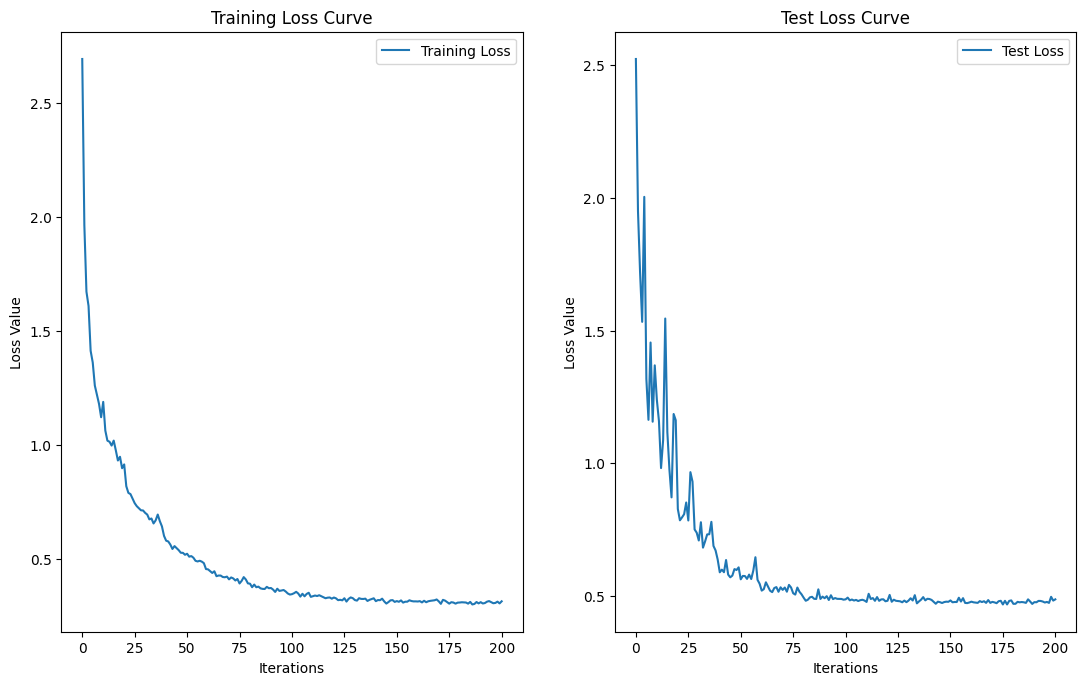

In [15]:
import matplotlib.pyplot as plt

epoch_range = np.arange(n_epochs + 1)
fig = plt.figure(figsize=(14,8))
plt.subplots_adjust(bottom=0.2,right=0.85,top=0.95)

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_xlabel("Iterations")
ax1.set_ylabel("Loss Value")
ax1.set_title("Training Loss Curve")
ax1.plot(epoch_range, train_hist, label="Training Loss")
ax1.legend(loc="upper right")

ax2.clear()
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Loss Value")
ax2.set_title("Test Loss Curve")
ax2.plot(epoch_range, test_hist, label="Test Loss")
ax2.legend(loc="upper right")

plt.show()